# 7506 - Trabajo práctico 1


##### Librerías

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
import scipy as sc
from sklearn.ensemble import IsolationForest
import sklearn as sk
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

In [9]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Descripción de las columnas
- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [10]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

place_l2              place_l3 property_currency property_type  \
25      Capital Federal                   NaN               USD          Casa   
42      Capital Federal                  Boca               USD  Departamento   
43      Capital Federal                  Boca               USD  Departamento   
49      Capital Federal                  Once               USD  Departamento   
51      Capital Federal                 Boedo               USD            PH   
...                 ...                   ...               ...           ...   
460072  Capital Federal      Villa del Parque               USD  Departamento   
460073  Capital Federal      Villa del Parque               USD  Departamento   
460074  Capital Federal      Villa del Parque               USD  Departamento   
460075  Capital Federal      Villa del Parque               USD  Departamento   
460090  Capital Federal  Centro / Microcentro               USD  Departamento   

       operation  
25         Venta  
42         Venta  
43         Venta  
49         Venta  
51         Venta  
...          ...  
460072     Venta  
460073     Venta  
460074     Venta  
460075     Venta  
460090     Venta  

[94249 rows x 5 columns]

A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [11]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

In [12]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

### Fechas


In [13]:
ds_train[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [14]:
ds_train["start_date"].value_counts()

2021-12-16    3753
2021-02-13    1684
2021-11-03     813
2021-08-03     670
2021-04-30     652
              ... 
2021-11-21      15
2021-12-26      15
2021-12-19      12
2021-01-02      11
2021-10-24       9
Name: start_date, Length: 364, dtype: int64

In [15]:
ds_train["end_date"].value_counts()

2021-06-05    10173
2022-01-27     7397
2022-02-09     6170
9999-12-31     4057
2021-03-01     1501
              ...  
2022-09-12        1
2022-06-14        1
2022-04-19        1
2022-06-01        1
2022-03-22        1
Name: end_date, Length: 605, dtype: int64

In [16]:
ds_train[ds_train.created_on != ds_train.start_date].shape

(0, 20)

Podemos ver que la columnas created_on y start_date siempre son iguales, descartaremos una de ellas más adelante.

In [17]:
ds_train["created_on"].value_counts()

2021-12-16    3753
2021-02-13    1684
2021-11-03     813
2021-08-03     670
2021-04-30     652
              ... 
2021-11-21      15
2021-12-26      15
2021-12-19      12
2021-01-02      11
2021-10-24       9
Name: created_on, Length: 364, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 285 apariciones de esta fecha

In [18]:
ds_train[ds_train.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    105
2021-06-24     96
2021-06-30     65
2021-02-23     61
2021-07-13     57
             ... 
2021-05-27      1
2021-12-30      1
2021-03-28      1
2021-04-28      1
2021-05-07      1
Name: start_date, Length: 285, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 285 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71342
mean     74 days 13:04:34.205937596
std      84 days 08:58:11.462509528
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

460026                       2021-06-24
265093                       2022-01-27
446086                       2022-06-30
326718                       2021-04-10
228085                       2021-04-22
                      ...              
266128                       2021-09-08
360438                       2021-07-26
233765                       2021-04-03
217398                       2021-09-10
39413     2021-10-12 13:04:34.205937596
Name: end_date, Length: 75399, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74574.000000       66653.000000            71545.000000   
mean              2.821949           2.014028              110.902761   
std               1.429857           1.111823             1062.716403   
min               1.000000           1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              104.000000   
max              40.000000          32.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72757.000000  72387.000000  72387.000000   
mean                       87.866267    -34.590967    -58.449567   
std                      1046.219284      0.175266      0.290800   
min                         1.000000    -41.164123    -71.471192   
quartile 1                 40.000000    -34.615975    -58.466524   
median                     57.000000    -34.595763    -58.439040   
quartile 3                 88.000000    -34.577367    -58.408878   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.263302e+05  
std           3.208544e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.439000e+05  
quartile 3    2.380000e+05  
max           2.140000e+07  
mode          1.100000e+05

## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

La tabla muestra varias cosas:
- Hay 75399 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 64617 departamentos, 7436 PHs y 3346 casas
- Hay 11547 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Análisis gráfico de las distribuciones de las variables

#### Distribución de fechas 

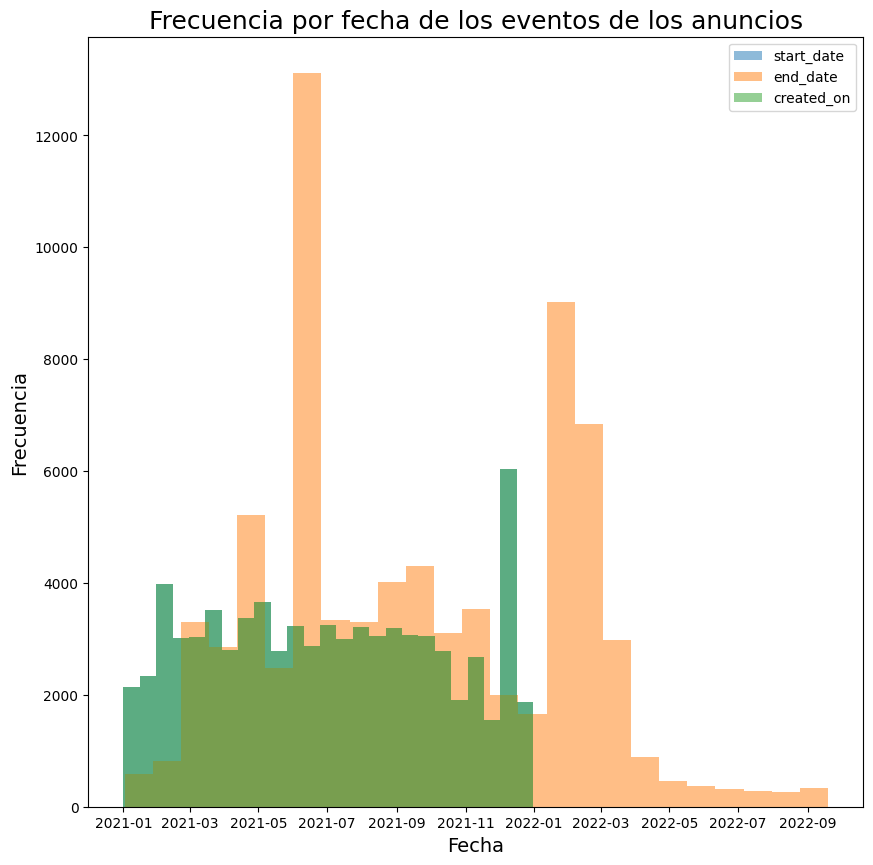

In [24]:

plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')


En este grafico se puede apreciar la distribución de las variables que hacen referencia a las fechas de creacion, alta y baja de los anuncios. Podemos ver que la distribución de las fechas de creación coincide con la distribución de las fechas de alta del anuncio, lo cual tiene sentido que así sea ya que la fecha de creación del anuncio es la primer versión del anuncio en ser dada de alta. 

###  Distribución de barrios
Primero vemos la cantidad de apariciones de los barrios por anuncio en la siguiente tabla:

In [25]:
ds_train['place_l3'].value_counts()

Palermo                 11467
Belgrano                 7151
Caballito                5731
Recoleta                 4993
Villa Urquiza            3764
Almagro                  3275
Nuñez                    2852
Villa Crespo             2548
Flores                   2484
Barrio Norte             2349
Balvanera                2015
Colegiales               1559
Villa Devoto             1526
Villa del Parque         1489
Saavedra                 1430
Puerto Madero            1189
San Telmo                1128
San Nicolás              1052
San Cristobal            1041
Barracas                 1004
Boedo                     991
Retiro                    982
Floresta                  952
Monserrat                 924
Parque Chacabuco          851
Coghlan                   819
Villa Pueyrredón          802
Mataderos                 586
Villa Luro                559
Chacarita                 558
Liniers                   531
Villa Ortuzar             528
Parque Patricios          513
Villa Luga

Como podemos observar, hay demasiados barrios con pocas apariciones, por lo que nos centraremos en visualizar los primeras 25 barrios que mas aparecen. Agrupando al resto en una nueva categoria llamada "Otras".

In [26]:
top25 = ds_train['place_l3'].value_counts().head(25)

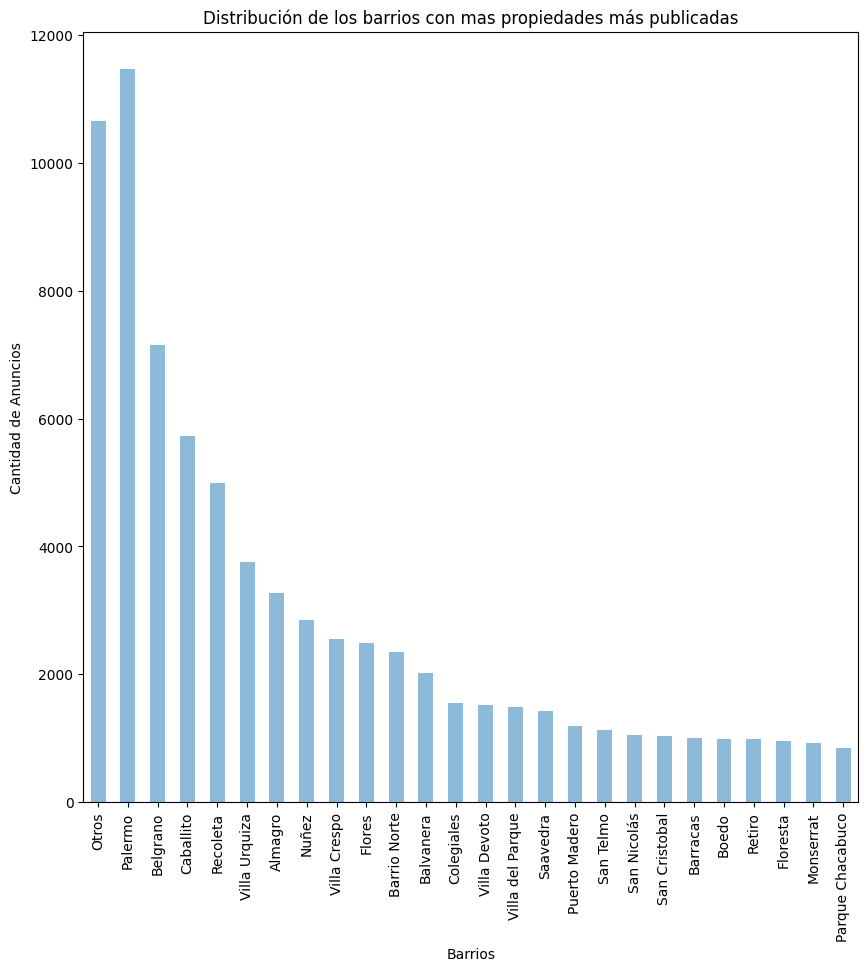

In [27]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

El barrio de Palermo es la que tiene mas propiedades publicadas

### Distribución de tipos de propiedad

Para analizar la distribucion de la variable property_type vamos a agrupar las apariciones en un grafico de barras por tipo de propiedad

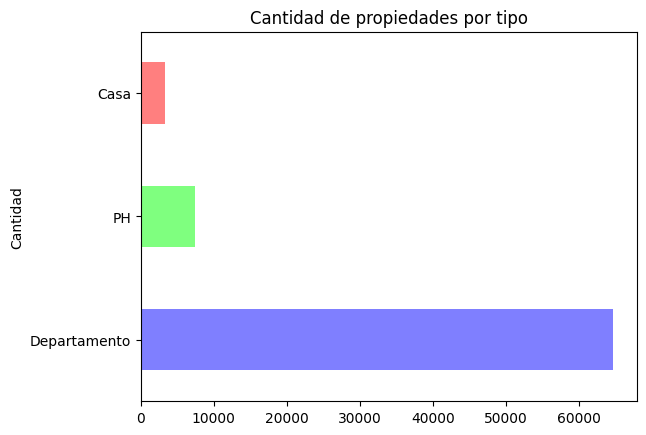

In [28]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

A simple vista se puede ver que la mayoria de publicaciones son de departamentos por una amplia diferencia

### Distribución de latitud y longitud
Para analizar la longitud y latitud vamos a utilizar un grafico de a pares ya que nos aporta más información sobre su distribución, pudiendo visualizar la localización de la propiedad. Adicionalmente se distinguirá por el tipo de propiedad.

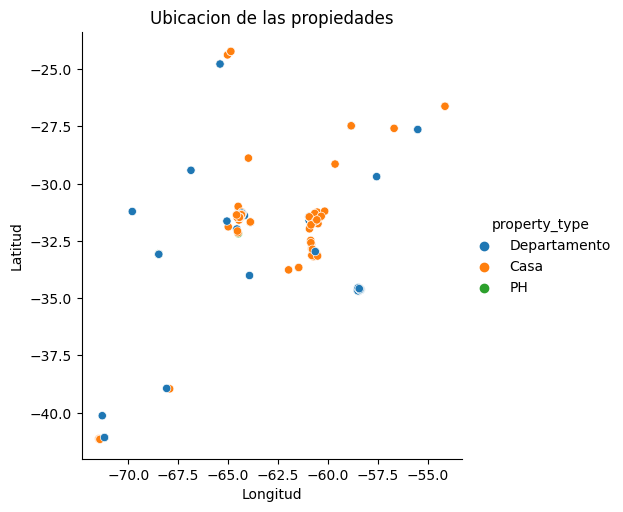

In [29]:
sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

Podemos ver que la mayoria de propiedades publicadas se encuentran concentradas en un área en particular, donde mayormente son de tipo Casa. Y al alejarse se ven departamentos distanciados entre sí.

### Distribución de habitaciones y baños

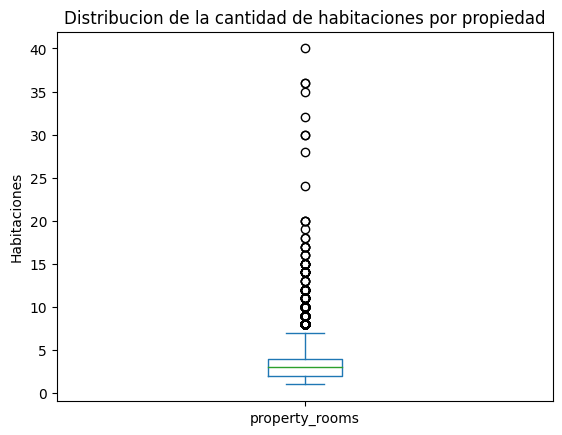

In [30]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

Podemos ver que hay una gran cantidad de outliers, siendo 40 el que mas se aleja, para visualizar mejor la distribucion del boxplot veremos un nuevo grafico sin considerar los outliers.

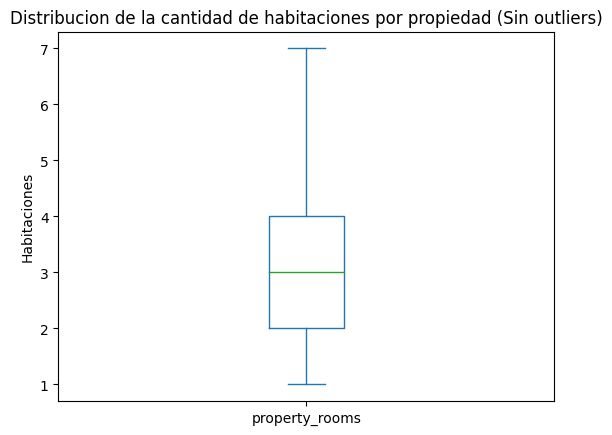

In [31]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

Ahora si podemos visualizar mejor los valores de la mediana, q3, q1 y los bigotes. Que toman la siguiente cantidad de habitaciones:

*   Bigotes: 1 y 7.
*   Cuartil 1: 2
*   Mediana: 3.
*   Cuartil 3: 4.





Hacemos el mismo procedimiento ver la distribución de la cantidad de baños por propiedad

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

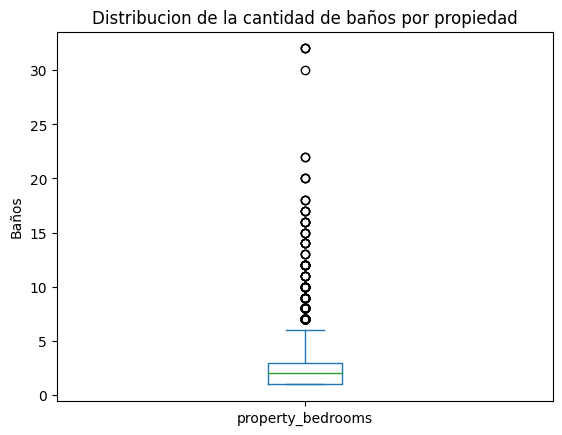

In [32]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")

Vemos que esta vez hay mas distancia entre el outlier mas alejado y el resto de outliers.

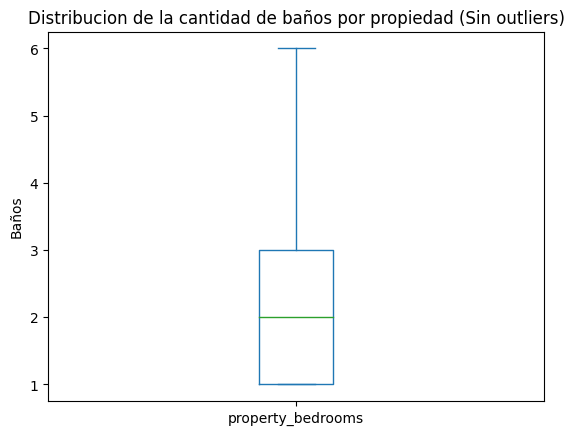

In [33]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

En este caso toman los siguientes valores:

*   Bigotes: -1 y 6.
*   Cuartil 1: 1.
*   Mediana: 2.
*   Cuartil 3: 3.


### Distribución de precio

Para analizar la distribución del precio, como es un tipo de variable continua y cada observación puede tomar un valor en un rango muy grande, optamos por hacer una agrupación por rangos de precios, obteniendo una categoria por cada rango.
Vamos a considerar la mediana para establecer los limites entre cada grupo, consideramos que es un buen valor para dividir al conjunto en partes ya que no se ve afectado drasticamente por outliers (como si sucede con la media).

In [34]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143900.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

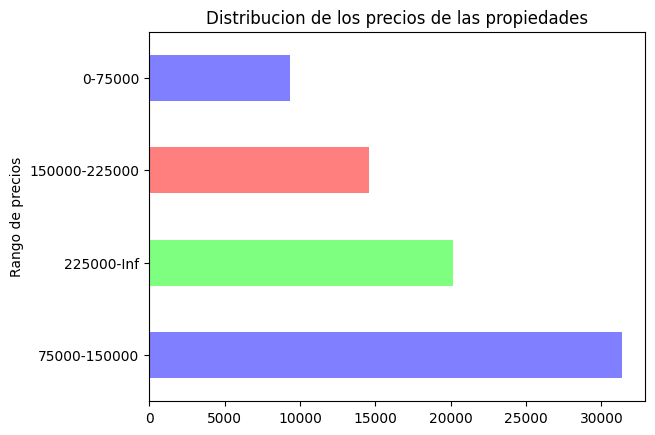

In [35]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

Podemos ver que la mayoria de propiedades estan dentro del rango de 75000 y 150000 USD.

### Distribución de superficie total y cubierta

Utilizaremos un violin plot para cada variable. 

<AxesSubplot: >

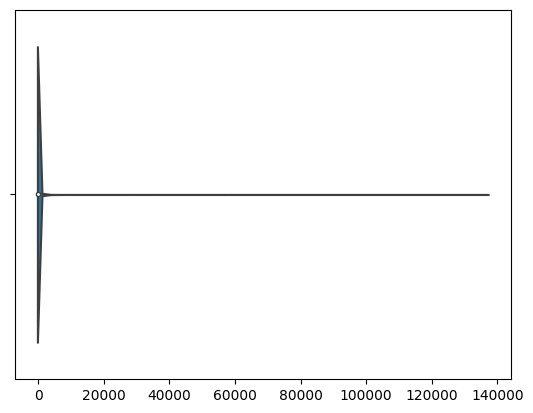

In [36]:
sns.violinplot(ds_train.property_surface_total.values)

A simple vista no esta muy claro el gráfico por la cantidad de outliers que hay, por lo que dejaremos de lado la mayoria de outliers para interpretarlo mas en detalle.

<AxesSubplot: >

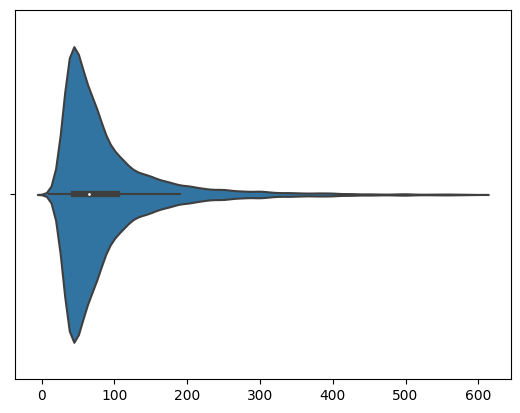

In [37]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

Podemos ver que entre 0 y 100 se encuentra la mayor densidad

Hacemos el mismo procedimiento para visualizar la distribución de la superficie cubierta de la propiedad

<AxesSubplot: >

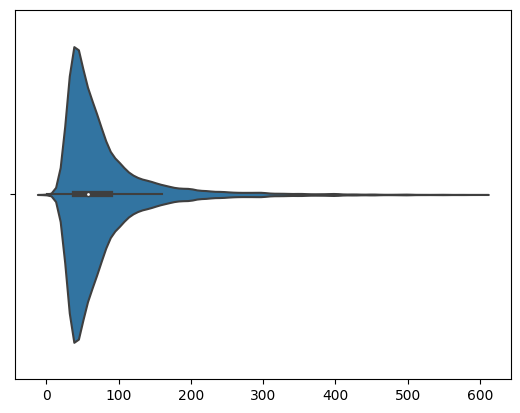

In [38]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

Se nota que el grafico de property_surface_total es similar al de property_surface_covered, teniendo el segundo una densidad levemente menor. 

## Correlación entre variables

A continuación analizaremos la correlación entre las variables cuantitativas, primero visualizando la distribución a pares entre estas.

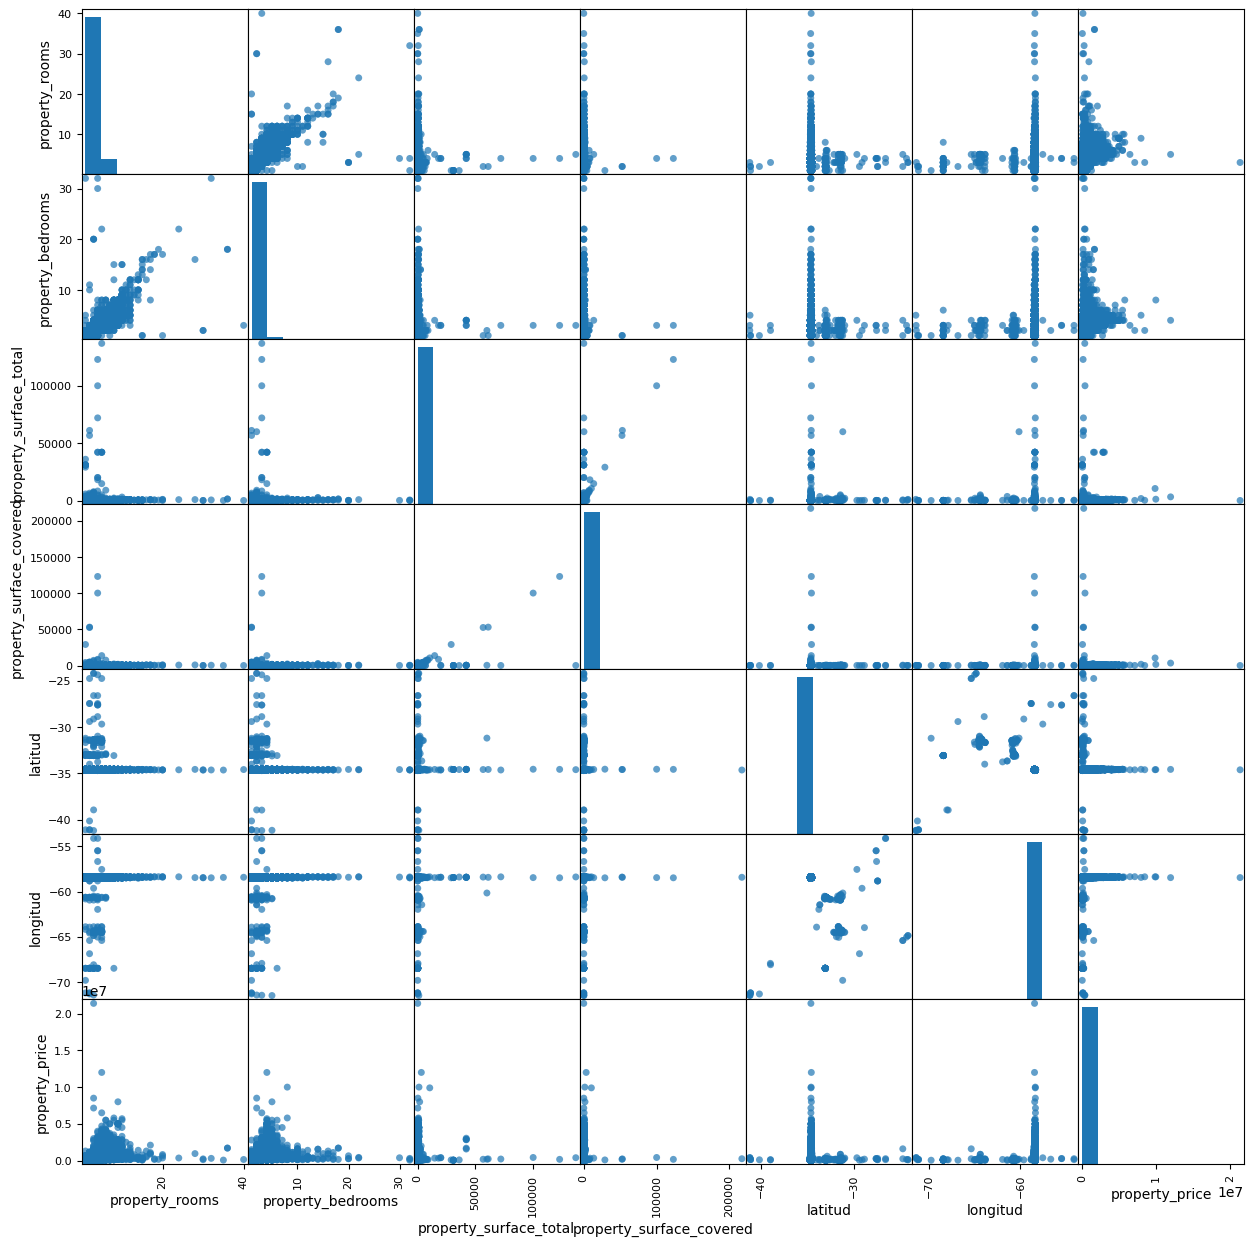

In [39]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

Si bien a simple vista no esta muy claro que variables están correlacionadas entre sí, podemos suponer que puede llegar a haber relación entre property_rooms y property_bedrooms, property_surface_total y property_surface_covered, property_price y property_rooms, property_price y property_bedrooms. Las cuales tiene sentido que pudiesen tener algún tipo de relación.

Además podemos considerar en menor medida que haya una relación entre longitud y latitud (cosa que no necesariamente tendría que ser así)




Analizaremos la correlación lineal entre variables por medio de la medición del coeficiente de Pearson

In [40]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.887221   
property_bedrooms               0.887221           1.000000   
property_surface_total          0.063148           0.064956   
property_surface_covered        0.077337           0.073410   
latitud                         0.009208           0.007588   
longitud                       -0.004947          -0.005971   
property_price                  0.482753           0.433724   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.063148                  0.077337   
property_bedrooms                       0.064956                  0.073410   
property_surface_total                  1.000000                  0.651722   
property_surface_covered                0.651722                  1.000000   
latitud                                 0.028546                  0.002412   
longitud                               -0.015264                 -0.001076   
property_price                          0.081116                  0.054509   

                           latitud  longitud  property_price  
property_rooms            0.009208 -0.004947        0.482753  
property_bedrooms         0.007588 -0.005971        0.433724  
property_surface_total    0.028546 -0.015264        0.081116  
property_surface_covered  0.002412 -0.001076        0.054509  
latitud                   1.000000 -0.304343        0.018527  
longitud                 -0.304343  1.000000        0.023375  
property_price            0.018527  0.023375        1.000000

Haremos un heatmap que nos permite visualizar mejor la correlación

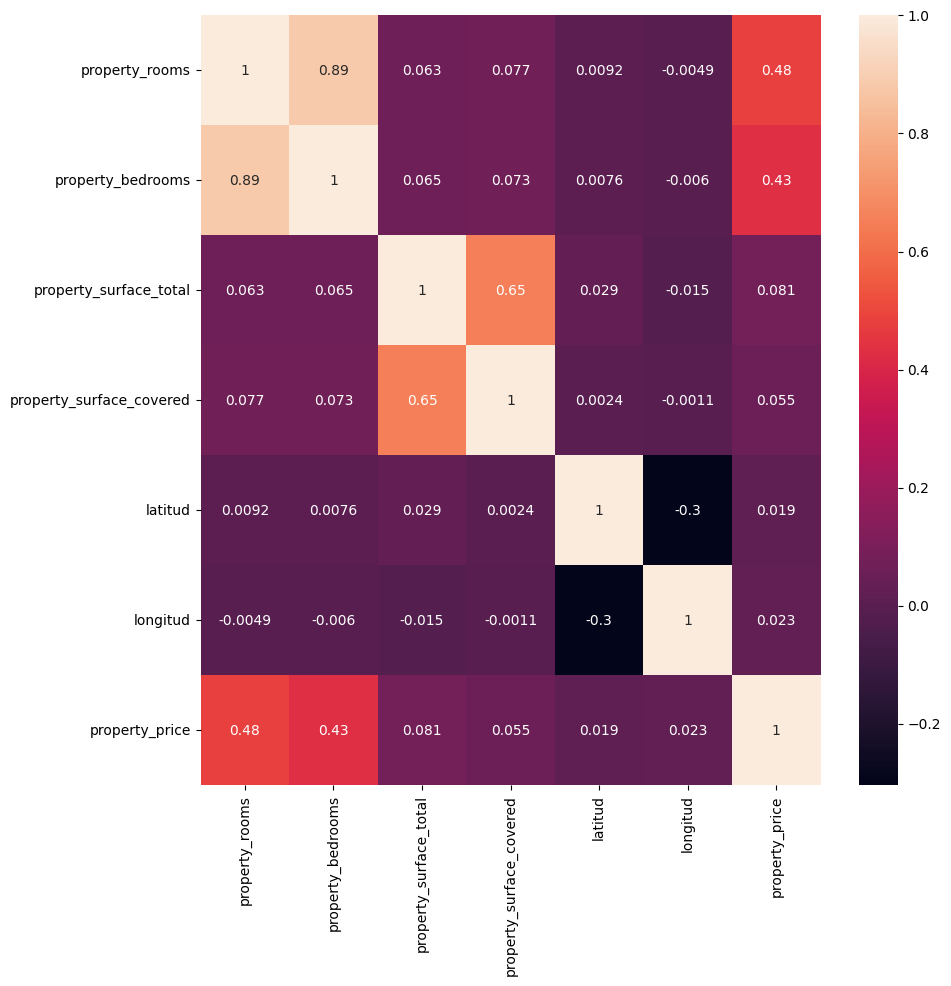

In [41]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

Luego de calcular el coeficiente de Pearson donde los que resultan cercanos a 1 indican una gran correlación entre sí, los que tienden a 0 tienen poca correlación y los cercanos a -1 presentan una notable correlación negativa.

Veremos si las variables que parecían relacionarse anteriormente realmente lo hacen:


In [42]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.89
Entre property_price y property_bedrooms:0.43
Entre property_price y property_rooms:0.48
Entre property_surface_total y property_surface_covered:0.65
Entre longitud y latitud:-0.3


Podemos sacar las siguientes conclusiones sobre las variables que parecian relacionarse:


*   Hay mucha relación entre la cantidad de habitaciones y ambientes.
*   Hay tambien bastante relación entre la superficie total y superficie cubierta de la propiedad.
*   Casi no hay relación entre el precio y la cantidad de habitaciones.
*   Casi no hay relación entre el precio y la cantidad de ambientes.
*   No hay relación entre la latitud y la longitud.





## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.994748
longitud                      3.994748
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.111354
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.094179
property_bedrooms            11.599623
property_surface_total        5.111474
property_surface_covered      3.504025
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


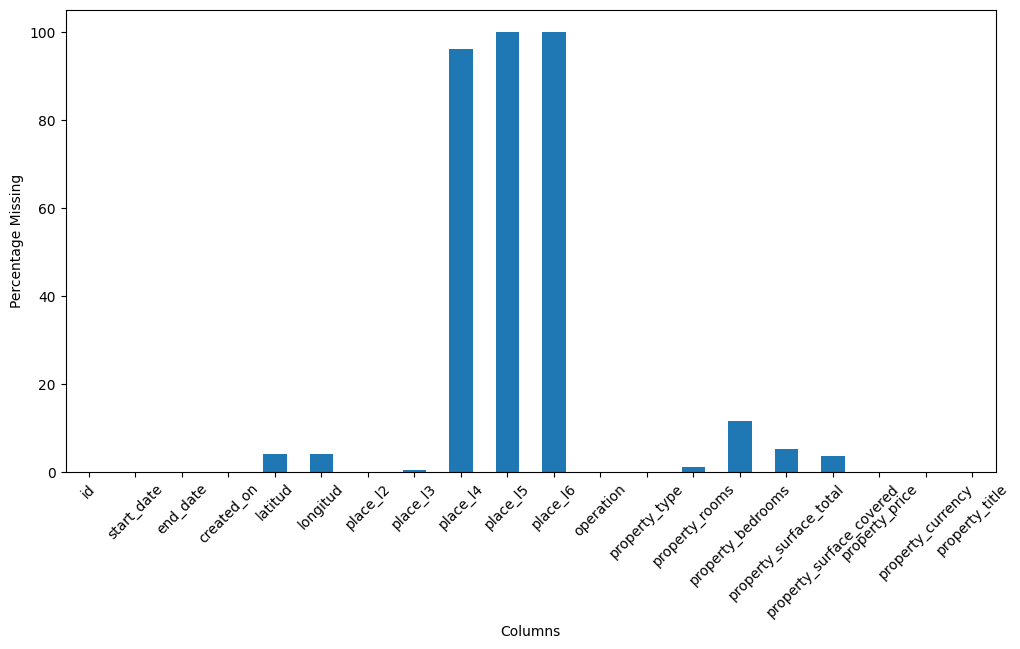

In [43]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

<AxesSubplot: >

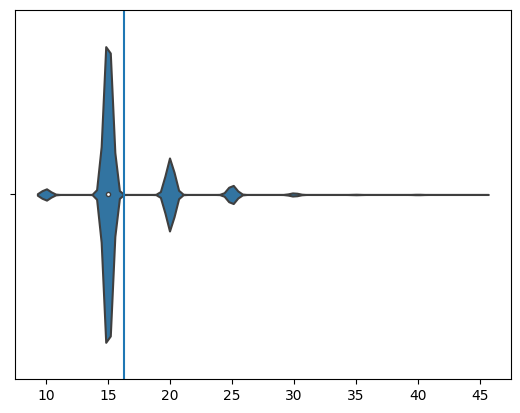

In [44]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. No podemos usar un dato uníco porque no representa ninguna característica relevante.

In [45]:
ds_train['id'].head()

460026    2jfcV70r5M8iASKFbpFEqA==
265093    HAVkMktdPRn+l4cTf6/h9A==
446086    vEZ4YGWK+rLumCjMw8zfYA==
326718    U3KiqS1NXWSS+2MHQ9uDAQ==
228085    Q4FFDOnB7r5e7zO7Qb4riQ==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [46]:
ds_train['place_l4'].value_counts()

Palermo Hollywood    1272
Palermo Chico         887
Palermo Soho          640
Palermo Viejo         133
Name: place_l4, dtype: int64

In [47]:
ds_train['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [48]:
ds_train['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [49]:
ds_train['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

Como place_l4 tiene pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.
Además, como mencionamos más arriba, la columna created_on siempre es igual a la columna start_date, por lo que también la descartaremos.
Por otro lado, como filtramos solo las propiedades de CABA eliminaremos la columna place_l2 ya que tiene un único valor. Por el mismo motivo eliminaremos la columna property_currency y la columna property_operation.

In [50]:
row_missing_data = ds_train.T.isna().sum() * 100 / column_count
row_missing_data.value_counts()

15.0    56995
20.0    12462
25.0     3260
10.0     1950
30.0      560
35.0       86
40.0       85
45.0        1
dtype: int64

In [51]:
dataset_perc = row_missing_data.value_counts() * 100 / ds_train.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
15.0    75.591188
20.0    16.528071
25.0     4.323665
10.0     2.586241
30.0     0.742715
35.0     0.114060
40.0     0.112734
45.0     0.001326
dtype: float64


Ahora que elegimos las columnas deseadas, veremos nuevamente los porcentajes por columna para preparar algunas imputaciones

In [52]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.994748
longitud                      3.994748
place_l2                      0.000000
place_l3                      0.435019
place_l4                     96.111354
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.094179
property_bedrooms            11.599623
property_surface_total        5.111474
property_surface_covered      3.504025
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


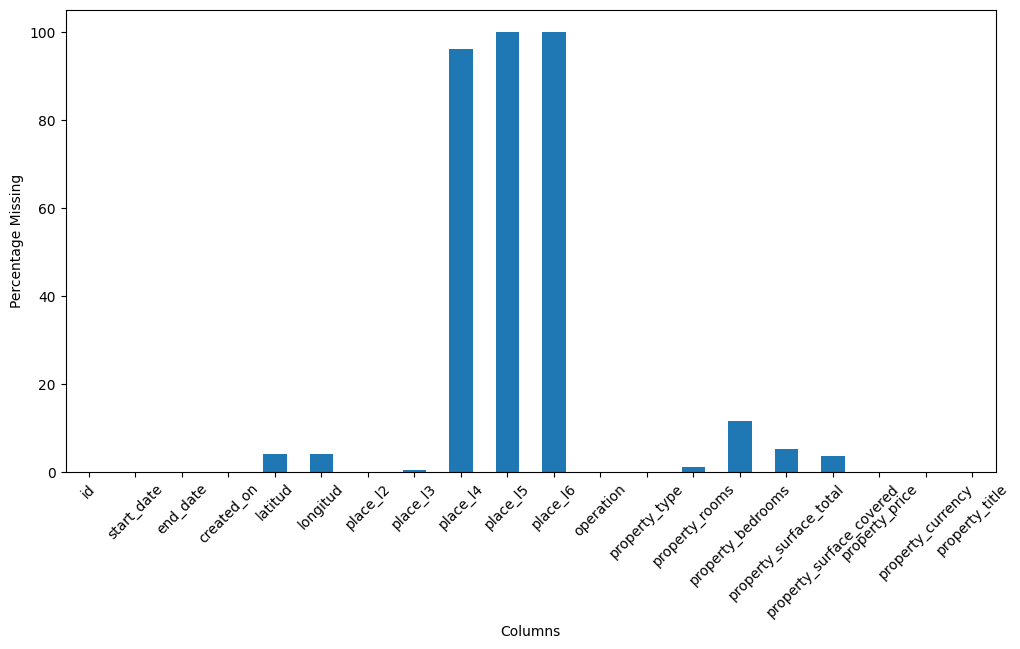

In [53]:
plot_missing_by_column(ds_train)

Eliminaremos las columnas mencionadas anteriormente. Luego, haremos algunas imputaciones sobre los datos faltantes para reparar algunos.


In [54]:
## Train

ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
              inplace=True, axis=1)

## Test
ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'],
             inplace=True, axis=1)

## Reparacion de datos faltantes

Ahora analizaremos columna a columna como podemos reparar esos datos.

### Pre Imputacion de latitud y longitud

latitud    3.994748
dtype: float64


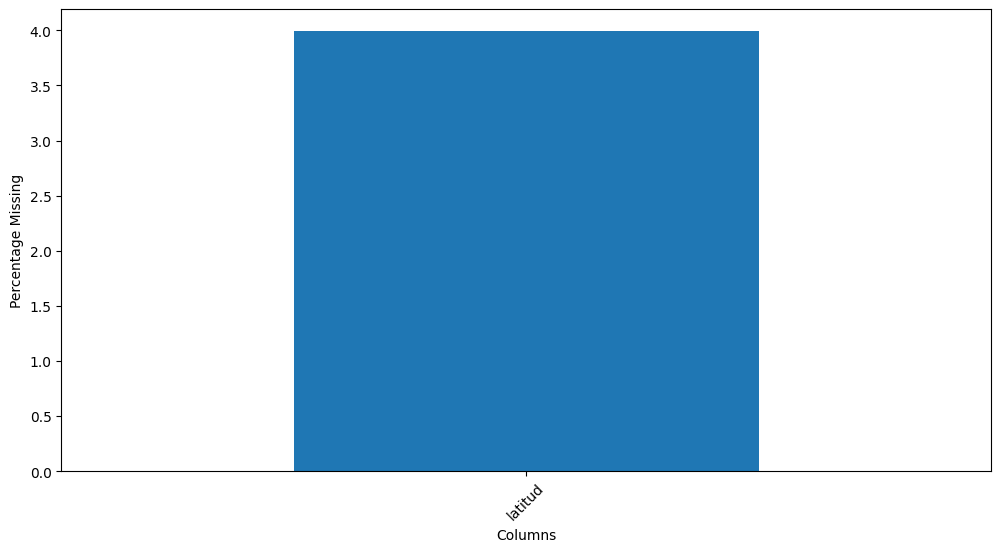

In [55]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.994748
dtype: float64


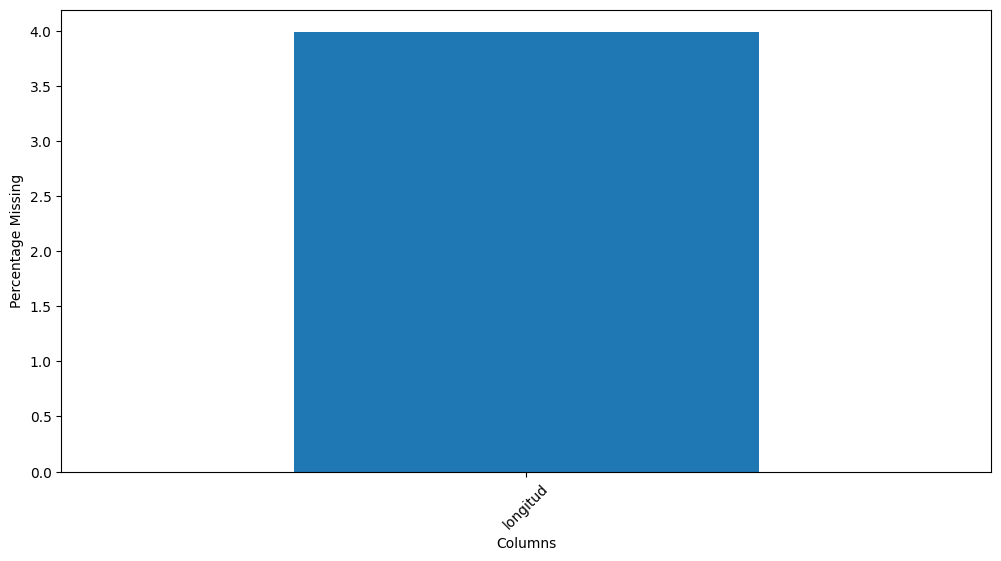

In [56]:
plot_missing_by_column(ds_train[['longitud']])

Vemos que de las coordenadas faltantes, siempre que falta una falta la otra también. No hay casos donde solo falte 1 de las 2 coordenadas.

In [57]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [58]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [59]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.449%
Los datos faltantes en la columna place_l3 para test representan el 5.014%


Para reconstruir los datos faltantes nos vamos a basar en el barrio marcado por 'place_l3' calculando la latitud y longitud media de cada uno y asignarle esos datos.

In [60]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

Vemos que los datos restantes ahora mismo son aquellos que tampoco tienen asignado un barrio. Dichos datos son irreparables, ya que no tenemos ninguna información respecto a la ubicación.

In [61]:
ds_train[ds_train.latitud.isna()]

id start_date   end_date  latitud  longitud  \
324195  yZbN/7naQCAKZfRIbH9lqw== 2021-03-03 2021-11-04      NaN       NaN   
336734  AhGnqYUCnKE+F8ggXKB29Q== 2021-04-13 2021-06-17      NaN       NaN   
364008  4KV3dh/60RbQ106Z4y0cAw== 2021-04-10 2021-04-14      NaN       NaN   
458616  aUqza6tHXiZJXBqZ4bpS9Q== 2021-01-05 2021-03-01      NaN       NaN   
7204    U65AD6YXmo1PjgUmHGMtag== 2021-02-09 2022-07-17      NaN       NaN   
...                          ...        ...        ...      ...       ...   
292979  B7n7Xn2Vqf49Ff+AG0T3Jw== 2021-02-23 2022-08-01      NaN       NaN   
335758  WHW43q4WY6/9r8onU+XHlA== 2021-07-21 2021-11-28      NaN       NaN   
158449  /j3wYMmm9WUqKnvnVvlZlQ== 2021-09-12 2021-09-18      NaN       NaN   
172797  dhCe4MZHmoypIcCivygrAg== 2021-05-11 2021-11-04      NaN       NaN   
84681   FDP0I8rP+WzTtwUj4Gc2iQ== 2021-03-26 2021-04-13      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
324195      NaN  Departamento             3.0                NaN   
336734      NaN  Departamento             4.0                NaN   
364008      NaN          Casa             NaN                4.0   
458616      NaN            PH             3.0                1.0   
7204        NaN  Departamento             1.0                NaN   
...         ...           ...             ...                ...   
292979      NaN  Departamento             2.0                1.0   
335758      NaN  Departamento             2.0                1.0   
158449      NaN          Casa            10.0                7.0   
172797      NaN            PH             2.0                NaN   
84681       NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
324195                     NaN                      75.0        155000.0   
336734                     NaN                     230.0        950000.0   
364008                   258.0                     258.0        285000.0   
458616                    60.0                      60.0         85000.0   
7204                      20.0                       NaN         50000.0   
...                        ...                       ...             ...   
292979                    45.0                      45.0         73500.0   
335758                    50.0                      50.0         62000.0   
158449                   650.0                     450.0       1200000.0   
172797                    56.0                      61.0        105000.0   
84681                     87.0                      87.0        120000.0   

                                           property_title  
324195  Departamento en Venta CABA / Buenos Aires (D03...  
336734  Departamento en Venta CABA / Buenos Aires (B11...  
364008  Venta de Casa en Club de Campo Los Puentes, Lu...  
458616              PH FRENTE T/CASA  2/3 AMB. C/ TERRAZA  
7204              Departamento - Centro (Capital Federal)  
...                                                   ...  
292979  2 AMBIENTES EN DUPLEX - COCHERA INCLUIDA | SAR...  
335758  Departamento de 2 ambientes en venta en Microc...  
158449          EN VENTA! Maritimo II 21, Costa Esmeralda  
172797         PH en Venta Caba / Buenos Aires (D038 597)  
84681   3 Ambientes amplios, 88 m2, con 2 baños, prox ...  

[134 rows x 13 columns]

In [62]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
309009  lueG6ZNaiqX2qrMCJHFeyg==        NaT      NaT      NaN       NaN   
125436  M5Sv89K3N2XSS7cK57DNxg==        NaT      NaT      NaN       NaN   
142639  Rz0b5avJ+Y05s1qSNFVmsw==        NaT      NaT      NaN       NaN   
125426  w1cINOUEBKAj/8RpOso+4A==        NaT      NaT      NaN       NaN   
57098   k8oVn7UMh5c31oMy3VQMJQ==        NaT      NaT      NaN       NaN   
265868  ZjdPr6PFzWhUf8R9DKpAsg==        NaT      NaT      NaN       NaN   
144352  sw+PrkXzwMmO2f/FL9fX9w==        NaT      NaT      NaN       NaN   
248747  Lrs8VtszCjsi0+FEhk7xOQ==        NaT      NaT      NaN       NaN   
100679  bazSV9fw9UcXJh6Xkx9IOg==        NaT      NaT      NaN       NaN   
389004  CPXCgjqRI/3js9VHc63/ew==        NaT      NaT      NaN       NaN   
308187  UHPrrt0xvMZ+CHRHoq3wFQ==        NaT      NaT      NaN       NaN   
114489  m840XwQvdPOmo1l4HKF73Q==        NaT      NaT      NaN       NaN   
177602  fGNGYFbRxuKwIidrnXD8EQ==        NaT      NaT      NaN       NaN   
69056   bYR88SCJgxobwY62vy40KQ==        NaT      NaT      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA==        NaT      NaT      NaN       NaN   
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
161821  feYEI/oWbl3KuB6cR9ouJQ==        NaT      NaT      NaN       NaN   
443524  oTcZ0R6pAmDTF2PiM3fqJg==        NaT      NaT      NaN       NaN   
163803  nc0ntMQxgHruhBOAOk3AIg==        NaT      NaT      NaN       NaN   
318282  OR5WhCzgKUhaDY9kcPPKug==        NaT      NaT      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg==        NaT      NaT      NaN       NaN   
341285  fH/+4asrLhpVCY1KxLwFKQ==        NaT      NaT      NaN       NaN   
299216  3YXrUTUsKAzutpSbOuezfg==        NaT      NaT      NaN       NaN   
459199  oYcjmcAXiY+MSWKw0iU28Q==        NaT      NaT      NaN       NaN   
448210  DvLI8uRl2AL9kVavsIxkJQ==        NaT      NaT      NaN       NaN   
380292  7KJvQW5IT18i55fQwRu7dg==        NaT      NaT      NaN       NaN   
37652   MhTztkJUDyhN71Dj5dzhXw==        NaT      NaT      NaN       NaN   
181520  GM7E6ngDRinluTkRR97Hqw==        NaT      NaT      NaN       NaN   
318281  bv4GZQnngc8/BdnPLZupdQ==        NaT      NaT      NaN       NaN   
93803   MbzcuMKtbLgu0MSLdMv8gw==        NaT      NaT      NaN       NaN   
447263  a8bAY8SHmXE6yDuJ267Sug==        NaT      NaT      NaN       NaN   
441455  MQMDesdhkobsc2Dz5D5AZQ==        NaT      NaT      NaN       NaN   
101456  pYxy/6HZGMBjHgbngmG70Q==        NaT      NaT      NaN       NaN   
318752  kSB4D67fcBa7uQqz5FRKZw==        NaT      NaT      NaN       NaN   
458690  uzOE5TSle78c4dgqiJ8hYg==        NaT      NaT      NaN       NaN   
130464  ZRuBHv9VeFO7JSugv+Bbrg==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
309009      NaN          Casa             NaN                6.0   
125436      NaN  Departamento             1.0                NaN   
142639      NaN          Casa             5.0                NaN   
125426      NaN  Departamento             1.0                NaN   
57098       NaN  Departamento             3.0                NaN   
265868      NaN  Departamento             3.0                2.0   
144352      NaN  Departamento             3.0                2.0   
248747      NaN          Casa             3.0                NaN   
100679      NaN  Departamento             1.0                1.0   
389004      NaN            PH             3.0                2.0   
308187      NaN            PH             4.0                NaN   
114489      NaN  Departamento             5.0                3.0   
177602      NaN  Departamento             4.0                3.0   
69056       NaN  Departamento             1.0                NaN   
161698      NaN  Departamento             3.0                2.0   
180567      NaN  Departamento             4.0                3.0   
161821      NaN  Departamento             4.0                3.0   
443524      NaN  Departamento 

In [63]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0019%


In [64]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

### Post Imputacion de latitud y longitud

latitud    0.0
dtype: float64


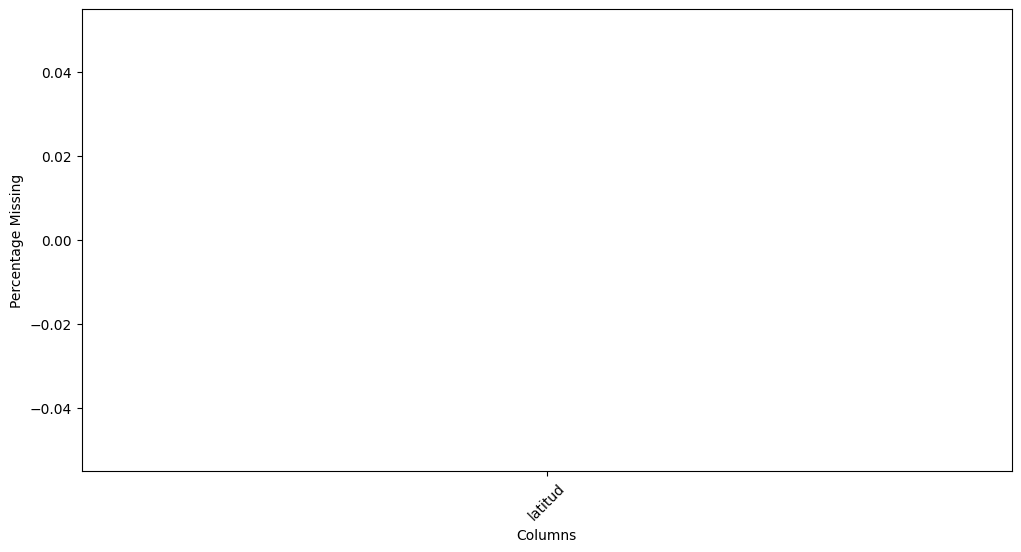

In [65]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


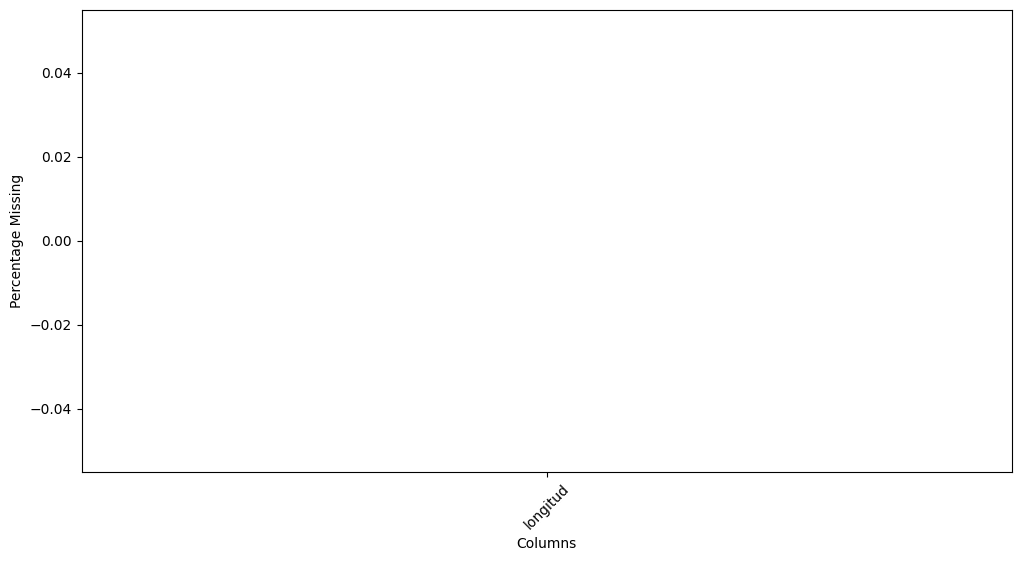

In [66]:
plot_missing_by_column(ds_train[['longitud']])

### Pre imputación de ambientes

property_rooms    1.062911
dtype: float64


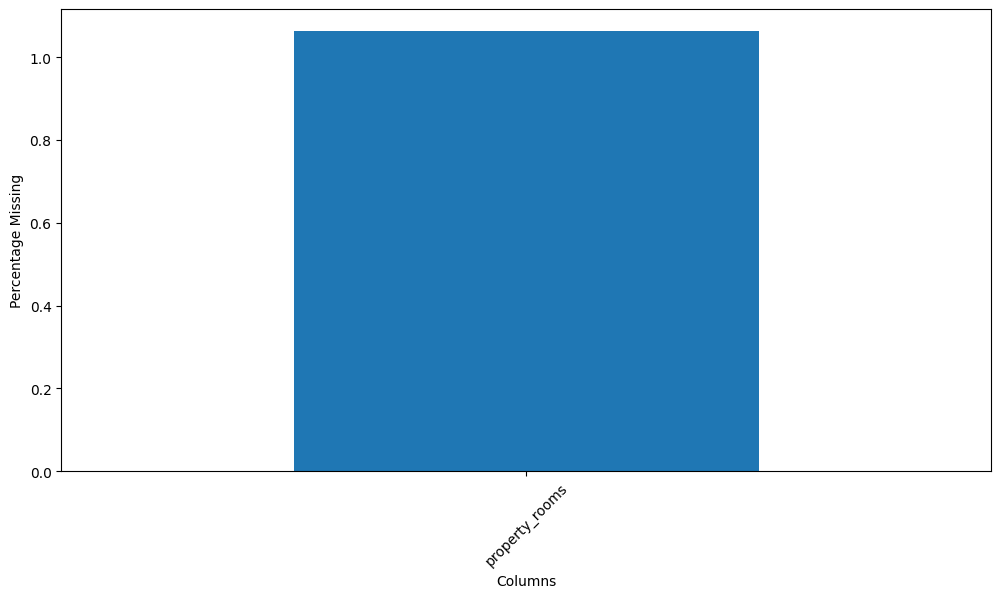

In [67]:
plot_missing_by_column(ds_train[['property_rooms']])

#### Reparacion de ambientes faltantes en base al titulo de la propiedad

In [68]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")


In [69]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 800
cantidad de ambientes faltantes post reparacion: 632
cantidad inicial de ambientes a reparar: 214
cantidad de ambientes faltantes post reparacion: 208


### Post Imputacion de ambientes

property_rooms    0.8397
dtype: float64


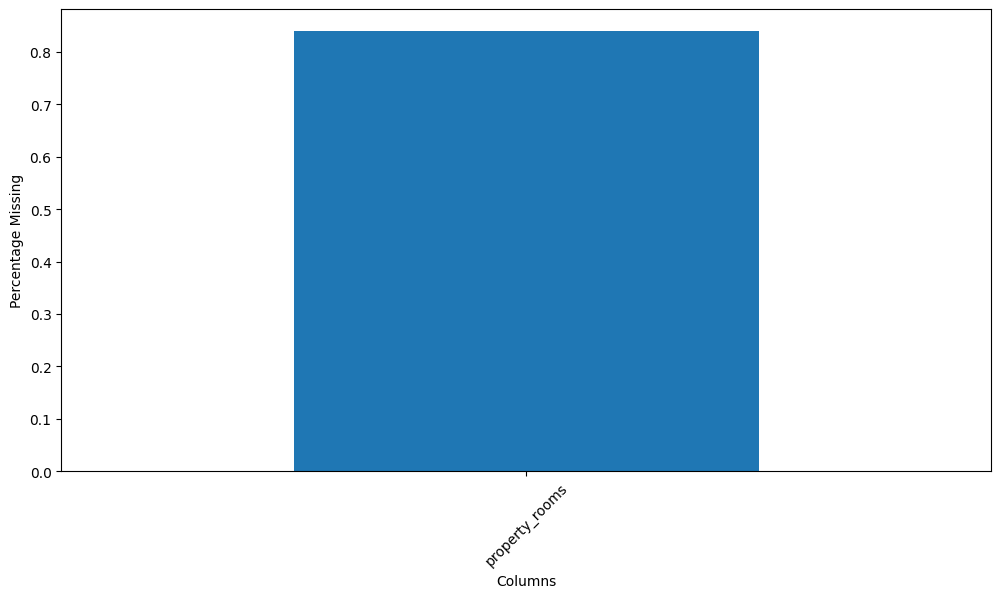

In [70]:
plot_missing_by_column(ds_train[['property_rooms']])

Como las que quedan sin datos son pocas observaciones, las eliminaremos

In [71]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


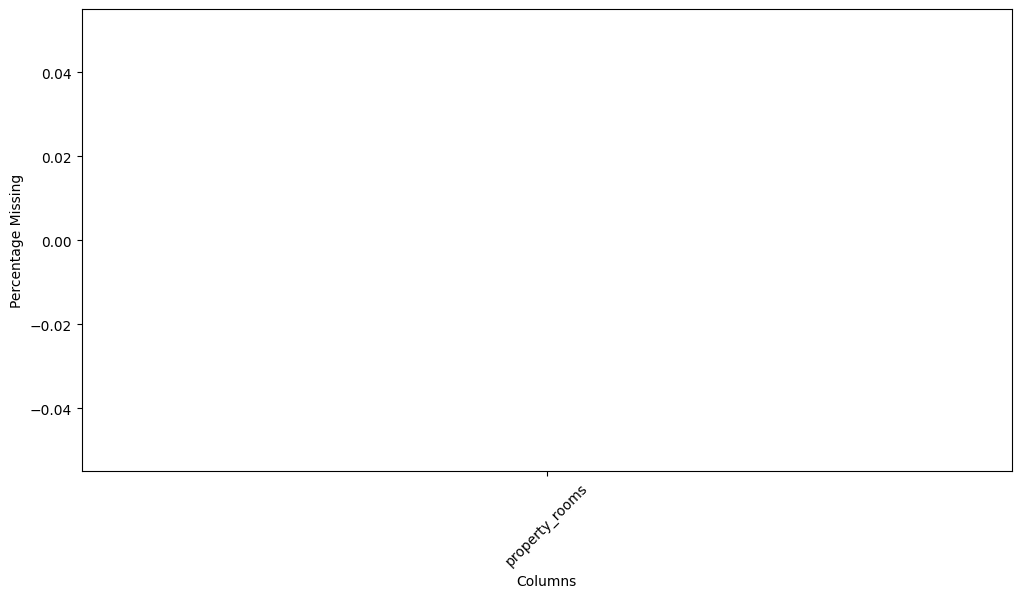

In [72]:
plot_missing_by_column(ds_train[['property_rooms']])

### Pre Imputacion de Habitaciones

property_bedrooms    11.255075
dtype: float64


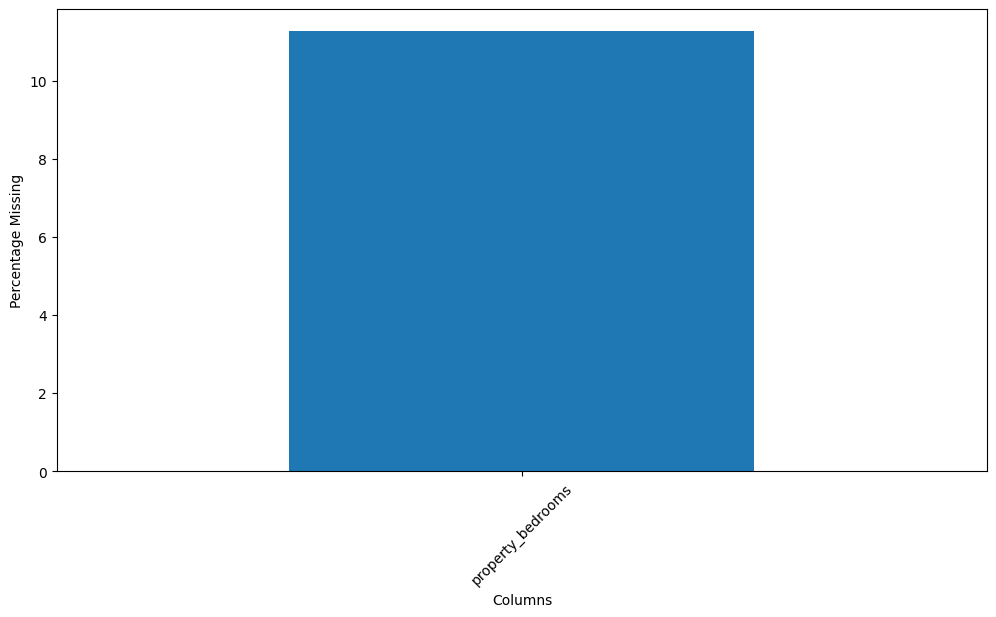

In [73]:
plot_missing_by_column(ds_train[['property_bedrooms']])

#### Reparacion de habitaciones faltantes en base a los ambientes

In [74]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas



El total de habitaciones en train es: 74633
El total de habitaciones invalidas es: 136. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18606
El total de habitaciones invalidas es: 27. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
442558  LcFV+buICyzuweftEQ0jUw==        NaT      NaT -34.594547 -58.384367   
115485  hrKv65SUn9Qf8dlGuPYhHw==        NaT      NaT -34.613261 -58.361513   
115484  C77X+Liz8eeC3QnMVIbx5A==        NaT      NaT -34.613261 -58.361513   
113953  xluQO3TsDjTRtN9foSO6Jw==        NaT      NaT -34.593316 -58.377201   
188564  qy6IBMdRGJeeJDIOgE8u2Q==        NaT      NaT -34.625245 -58.445077   
115569  7LnqOpV2gZB1ETv/ir7PwQ==        NaT      NaT -34.574290 -58.479777   
276086  26ynaivxGjWUJwbcP5zKfg==        NaT      NaT -34.639591 -58.442952   
389699  /D5DqZYM2nZ/7R9a/Ty+Gw==        NaT      NaT -34.606923 -58.404533   
115490  4SB68b9pUEe+GxRTEbEbDw==        NaT      NaT -34.613037 -58.360984   
115479  UpWmRfbiee9zaj0DBbsKRw==        NaT      NaT -34.613261 -58.361513   
399560  qlMqnmUjGt7quE+h6uWNng==        NaT      NaT -34.601997 -58.383625   
459594  Vb8DwDZfI4nCtVA93y+uZg==        NaT      NaT -34.573595 -58.442591   
9495    OBDOu/FgK3dF4mwRcygTnA==        NaT      NaT -34.580919 -58.430717   
259812  Sn6QBrocsb7ut8BM67cJkw==        NaT      NaT -34.598445 -58.431597   
399491  QNzj6fRvnJSZy8HVQQAfiw==        NaT      NaT -34.618449 -58.505422   
97734   +0qsKtd+p5A+2Et160DASw==        NaT      NaT -34.598309 -58.379852   
63013   q5mE4qv6OxYNWlMis+Mwig==        NaT      NaT -34.650211 -58.503437   
120845  4tv+arT+v45pAwx5zNpzWQ==        NaT      NaT -34.608618 -58.440001   
387679  DkUF65vVg64ocWpyJ+3FIg==        NaT      NaT -34.650156 -58.473353   
428097  5Q58aJJXojGC5f6ryqbJjw==        NaT      NaT -34.595668 -58.389490   
4928    69j280NshNyMCYcFqsmhlw==        NaT      NaT -34.645031 -58.373672   
337147  UVuiurLBb+DzTf73JSOI4g==        NaT      NaT -34.607438 -58.421896   
426286  li3VQt01Um6JdlK/+w3Kwg==        NaT      NaT -34.567114 -58.441770   
238661  f0A1+TKS8OCYI9kfzIZ3MQ==        NaT      NaT -34.621530 -58.361752   
2516    uKy3ZC5YQ9kPZ1ztj7CKjw==        NaT      NaT -34.557573 -58.459926   
225101  BvEsXFS0YlkCOSqwO00UjQ==        NaT      NaT -34.624302 -58.396088   
94998   4TbEkLoqy/0c3zakd66/FQ==        NaT      NaT -34.646632 -58.497902   

                 place_l3 property_type  property_rooms  property_bedrooms  \
442558           Recoleta  Departamento             5.0                6.0   
115485      Puerto Madero  Departamento             3.0                4.0   
115484      Puerto Madero  Departamento             3.0                4.0   
113953           Recoleta  Departamento             5.0                6.0   
188564          Caballito            PH             3.0                4.0   
115569      Villa Urquiza  Departamento             3.0                4.0   
276086   Parque Chacabuco            PH             3.0                5.0   
389699               Once  Departamento             1.0                2.0   
115490      Puerto Madero  Departamento             3.0                4.0   
115479      Puerto Madero  Departamento             3.0                4.0   
399560        San Nicolás  Departamento             4.0                6.0   
459594           Belgrano  Departamento             1.0                2.0   
9495              Palermo  Departamento             1.0                2.0   
259812       Villa Crespo  Departamento             1.0                2.0   
399491       Monte Castro  Departamento             1.0                2.0   
97734              Retiro  Departamento             1.0               11.0   
63013           Mataderos  Departamento             1.0                2.0   
120845          Caballito  Departamento             3.0                4.0   
387679  Parque Avellaneda          Casa             5.0                7.0   
428097           Recoleta  Departamento             4.0                5.0   
4928             Barracas  Departamento             1.0                2.0   
337147            Almagro  Departamento             3.0               20.0   
426286            Palermo          Casa            

Si tomamos en cuenta que 128 (train) y 35 (test) de los valores (0% aproximado) tienen mas habitaciones que ambientes, podriamos pensar en imputar los datos faltantes elimanando estas filas y haciendo que los valores que sean NAN, ahora sean habitaciones = ambientes - 1

In [75]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55837. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13855. Constituyen al 74% de los datos


Las habitaciones que son Ambientes - 1 son: 55797. Constituyen al 74% de los datos. Como notamos que es un valor muy representativo del dataset, optamos por imputar los datos faltantes como mencionamos antes, es decir, los ambientes que no esten vacios y que tengan habitaciones vacias, ahora tendran habitaciones = ambientes -1.

In [76]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8400
Valor inicial de habitaciones faltantes en el ds de test: 2121


In [77]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [78]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

### Post Imputacion de habitaciones

property_bedrooms    0.0
dtype: float64


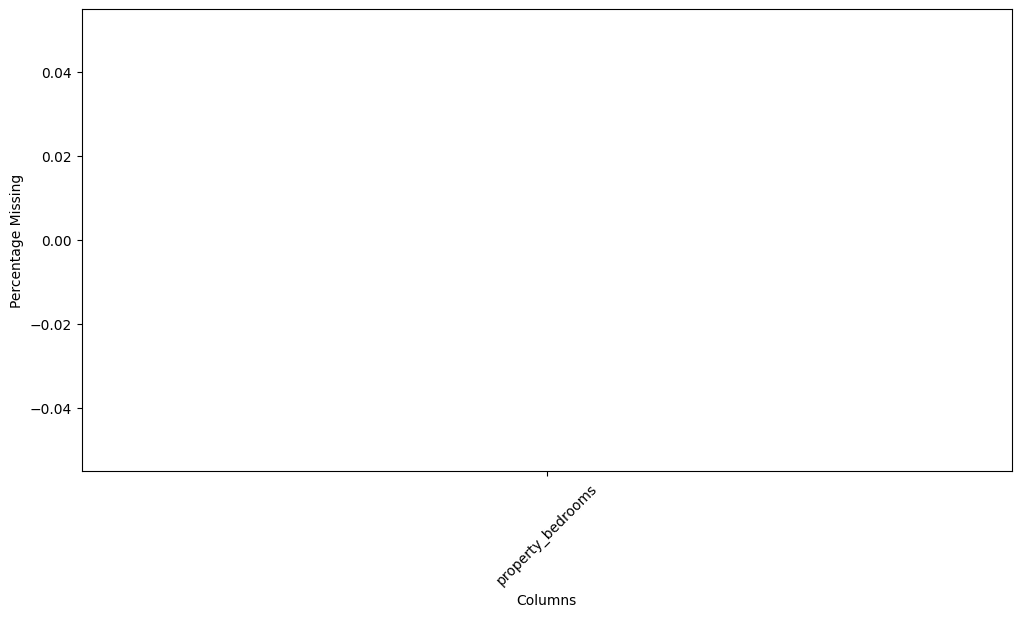

In [79]:
plot_missing_by_column(ds_train[['property_bedrooms']])

### Pre Imputación de Superficie total

property_surface_total    4.893278
dtype: float64


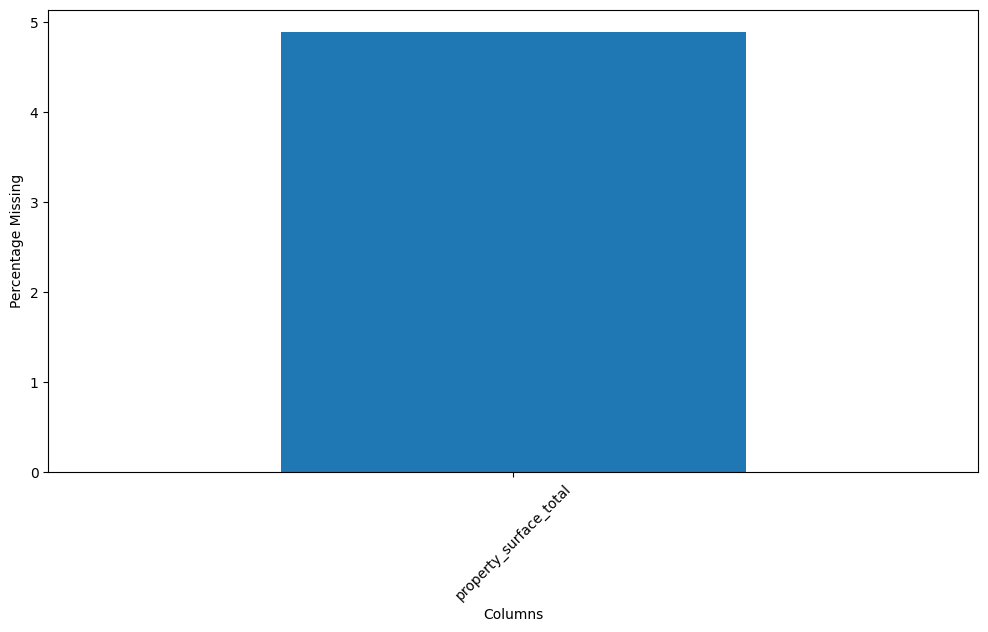

In [80]:
plot_missing_by_column(ds_train[['property_surface_total']])

Como a simple vista muchos registros tienen superficie cubierta, veremos en cuantos faltan ambos datos

In [81]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

#### Reparación de datos faltantes en superficie cubierta

Como todos los datos tienen la superficie cubierta, repararemos estos datos tomando ese valor como superficie total

In [82]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

### Post Imputación de Superficie total

property_surface_total    0.0
dtype: float64


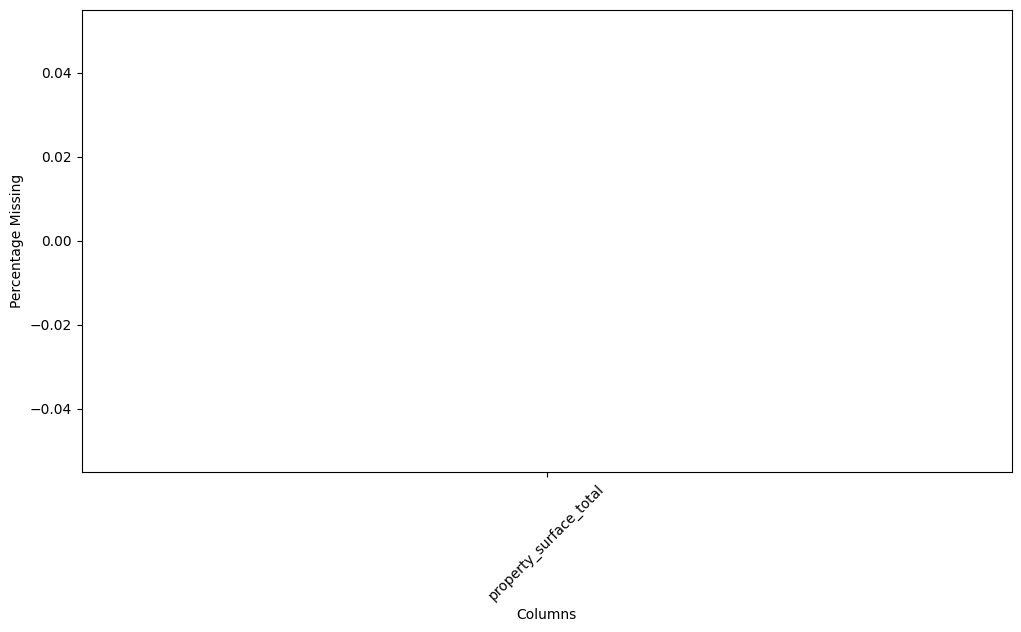

In [83]:
plot_missing_by_column(ds_train[['property_surface_total']])

### Pre Imputación de superficie cubierta

In [84]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date                      end_date  \
326718  U3KiqS1NXWSS+2MHQ9uDAQ== 2021-01-31 2021-04-10 00:00:00.000000000   
27608   mZe22rRAntDOpdLvjJ4K5w== 2021-12-03 2022-01-27 00:00:00.000000000   
279664  K44M0hnm3Xq+gspvyzbn2A== 2021-07-12 2021-09-24 13:04:34.205937596   
254720  G/xXmLQzaI+zlLG1E7vfVA== 2021-08-20 2021-09-06 00:00:00.000000000   
280163  k8rdi7oq0hGfbFldLwNKww== 2021-07-12 2021-08-23 00:00:00.000000000   
...                          ...        ...                           ...   
133272  SnmOQr7yNDrqrAFd34zBpg== 2021-02-18 2021-03-02 00:00:00.000000000   
420860  1ZAU9EtMC8CUbMyi9GPpnQ== 2021-12-01 2022-01-27 00:00:00.000000000   
123702  beEr803qR85N1nUwI0G8Iw== 2021-08-04 2022-03-16 00:00:00.000000000   
17624   5bUqDaF+UY9MAA6LAiuZ/g== 2021-08-28 2021-09-05 00:00:00.000000000   
256802  X7tMSZh5Pxc5GKi29kujow== 2021-11-03 2022-01-27 00:00:00.000000000   

          latitud   longitud      place_l3 property_type  property_rooms  \
326718 -34.572406 -58.430855       Palermo  Departamento             5.0   
27608  -34.588803 -58.420242       Palermo  Departamento             3.0   
279664 -34.602706 -58.370578        Retiro  Departamento             4.0   
254720 -34.591693 -58.400357  Barrio Norte  Departamento             2.0   
280163 -34.610812 -58.380448     Monserrat  Departamento             2.0   
...           ...        ...           ...           ...             ...   
133272 -34.573192 -58.422304       Palermo  Departamento             3.0   
420860 -34.605373 -58.389129   San Nicolás  Departamento             1.0   
123702 -34.594764 -58.401139  Barrio Norte  Departamento             2.0   
17624  -34.589554 -58.406960  Barrio Norte  Departamento             1.0   
256802 -34.576814 -58.465850      Belgrano  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
326718                3.0                   153.0                       NaN   
27608                 2.0                    50.0                       NaN   
279664                2.0                    82.0                       NaN   
254720                1.0                    39.0                       NaN   
280163                1.0                    50.0                       NaN   
...                   ...                     ...                       ...   
133272                2.0                   110.0                       NaN   
420860                1.0                    25.0                       NaN   
123702                1.0                    35.0                       NaN   
17624                 1.0                    34.0                       NaN   
256802                4.0                   300.0                       NaN   

        property_price                                     property_title  
326718        540000.0                         Departamento - Las Cañitas  
27608         120000.0                             Departamento - Palermo  
279664        160000.0                              Departamento - Retiro  
254720         97000.0  2 ambientes reciclado a nuevo en Juncal y Puey...  
280163        138000.0                           Departamento - Monserrat  
...                ...                                                ...  
133272        375000.0  ALQUILER Retasado Departamento Palermo torre  ...  
420860         42000.0                         Departamento - San Nicolas  
123702         79000.0                        Departamento - Barrio Norte  
17624          89000.0                        Departamento - Barrio Norte  
256802        850000.0  Piso de categoria hecho a nuevo en pleno Belgr...  

[2570 rows x 13 columns]

property_surface_covered    3.443517
dtype: float64


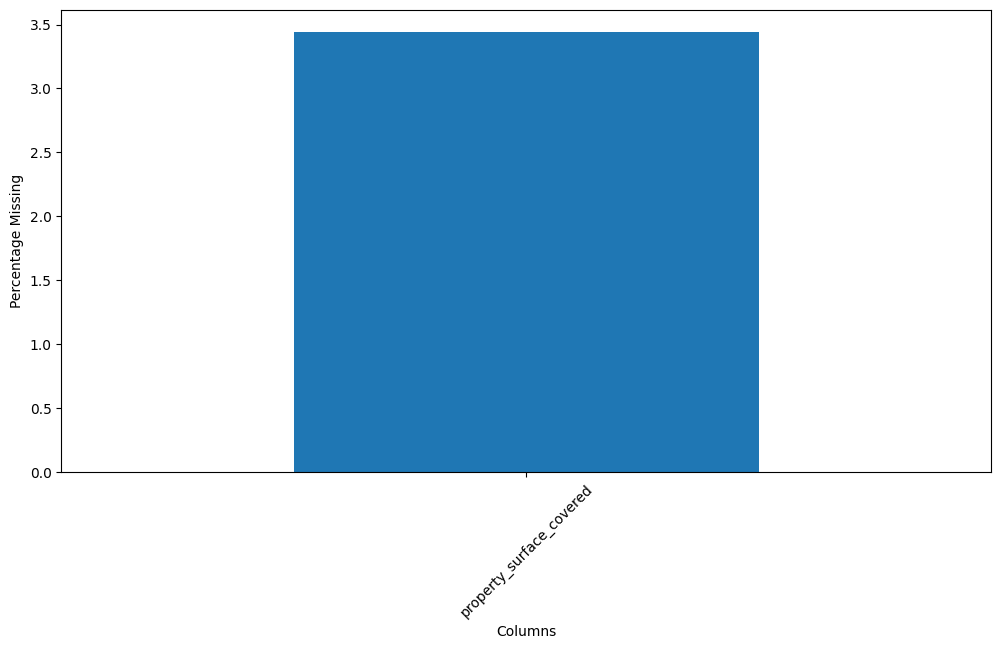

In [85]:
plot_missing_by_column(ds_train[['property_surface_covered']])

##### Reparación de datos faltantes en Superficie cubierta

Como tenemos 2672 registros nulos para la superficie cubierta, imputaremos de la misma forma los registros que son Departamentos porque su superficie total suele ser muy cercana a la cubierta

In [86]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2307
PH               183
Casa              80
Name: property_type, dtype: int64

In [87]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [88]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 263


In [89]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 693


Los 262 registros restantes de train los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

Los 651 registros restantes de test tambien los eliminaremos porque representan un porcentaje muy bajo y repararlos de esta forma puede ser impreciso.

In [90]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

Volvemos a evaluar el porcentaje de datos faltantes

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.203039
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


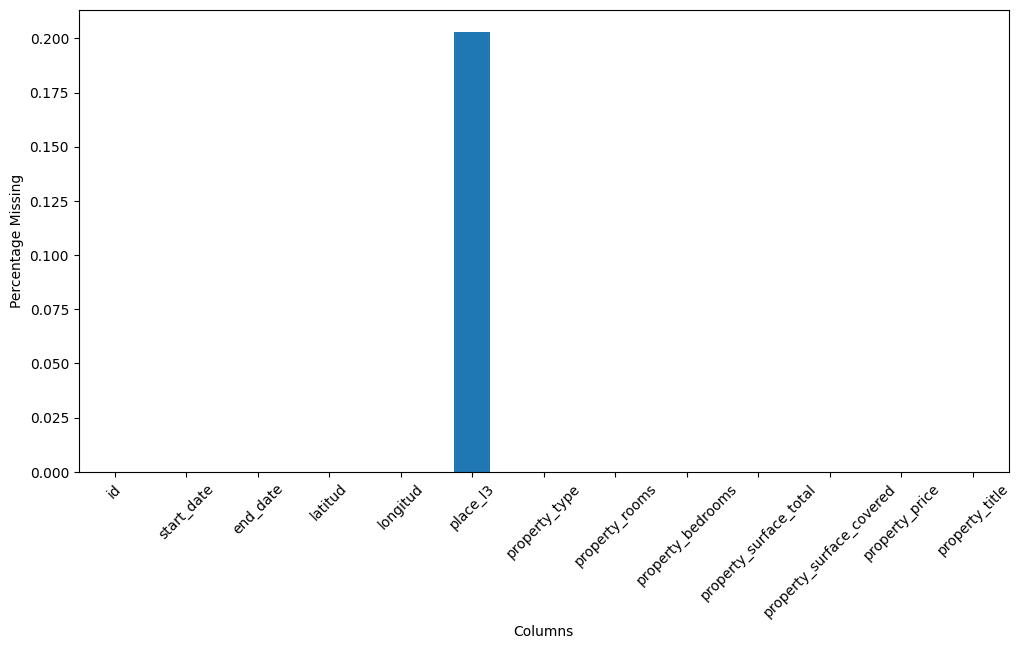

In [91]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

## Grafico de los barrios de CABA

In [92]:
# Proceso el archivo de los barrios de CABA
barrios = gpd.read_file('./barrios.geojson')
barrios.head()

NameError: name 'gpd' is not defined

In [ ]:
# Realizo el grafico de los barrios de CABA
fig, ax = plt.subplots(figsize=(8, 10))
barrios.plot(column='BARRIO', categorical=True, legend=True, ax=ax, cmap='tab20b')

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.4, 1.2))

ax.set(title='Barrios CABA')
plt.show()

## Analisis de Valores Atipicos

### Univariados

#### Metodo IQR

In [93]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()


In [94]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max

In [95]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

##### Ambientes

cantidad de datos del ds: 74370
outliers encontrados para los property_rooms: 1157
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


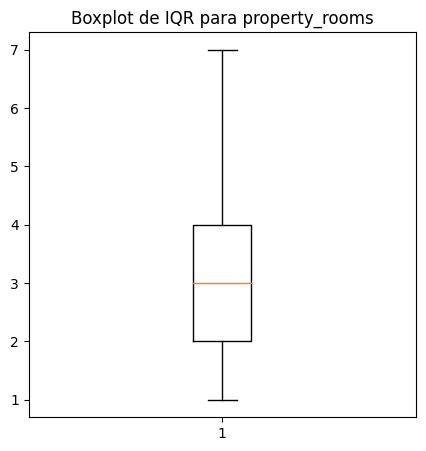

In [96]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

Tomaremos 7 como límite superior y 0 como límite inferior ya que no tiene sentido que haya cantidad de habitaciones negativas.

In [97]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")



Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 575. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 154. Constituyen al 0% de los datos


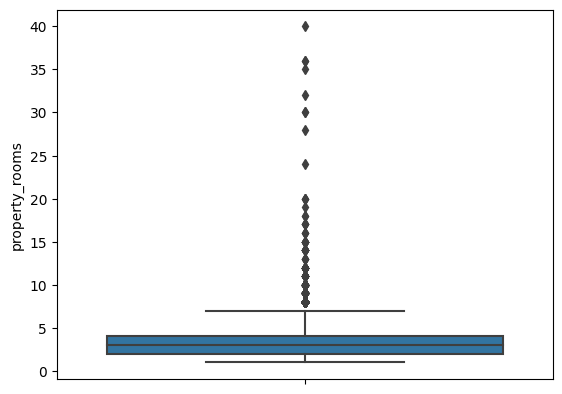

In [98]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Eliminamos los ambientes que son > 7 ya que rompen la media y representan solamente a un porcentaje minúsculo del dataset (1% sobre el 100% del ds).

In [99]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


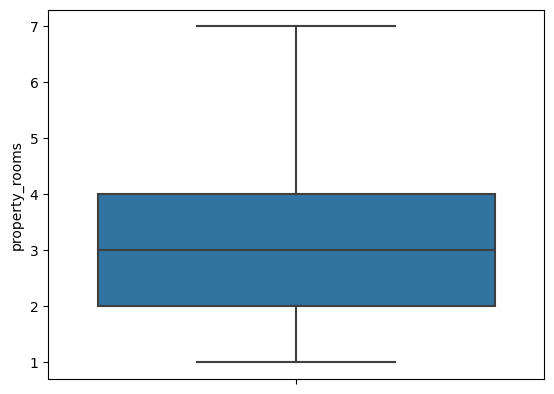

In [100]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

##### Habitaciones

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


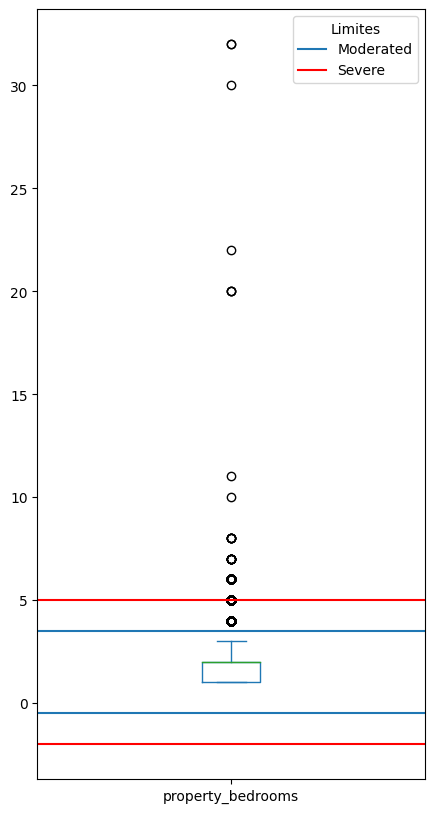

In [101]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73795
outliers encontrados para los property_bedrooms: 4346
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


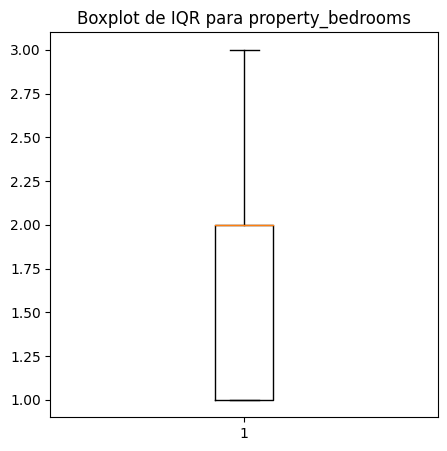

In [102]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [103]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")


Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 25. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 9. Constituyen al 0% de los datos


###### Eliminaremos una observacion en particular que fue detectada como outlier ya que dice tener -1 habitaciones. Este valor no tiene ningun sentido logico en nuestro domino de problema.


In [104]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en train
filas a eliminar:                               id start_date end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==        NaT      NaT -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en test


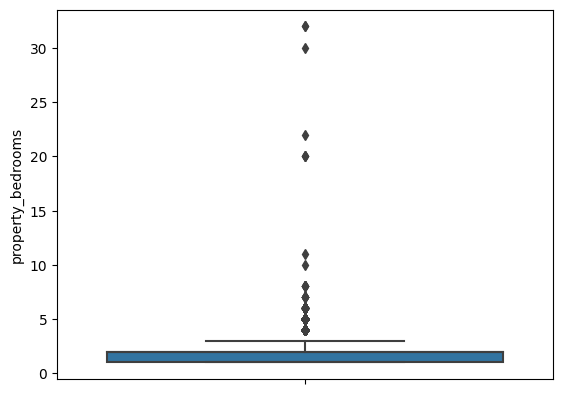

In [105]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

###### Cuando analizamos los valores atipicos detectados notamos que algunas observaciones eran mayores a los ambientes, esto no es posible en nuestro dominio de problema. Por ende, procederemos a eliminarlos. Podemos hacer esto ya que estos valores representan un valor minusculo del dataset.

In [106]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_bedrooms])}")

Ejemplos: 


14

In [107]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 25 registros en train
Se han eliminado: 9 registros en test


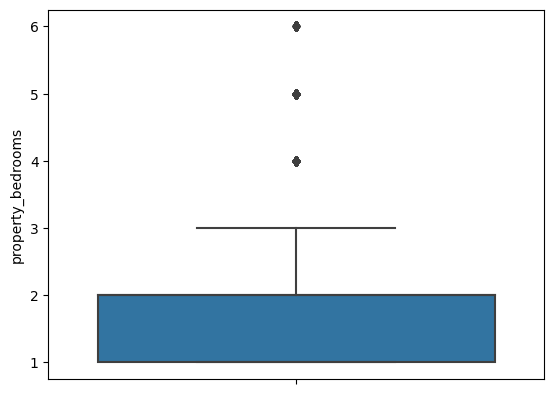

In [108]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

##### Superficie Total

cantidad de datos del ds: 73770
outliers encontrados para los property_surface_total: 5876
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


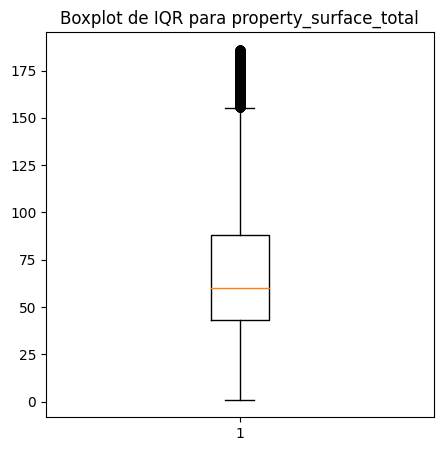

In [109]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

Elegimos tomar como outlier a viviendas que tengan una superifice menor a 18 ya que, en base a los documentos que leimos, este es el minimo necesario para que una persona viva en una vivienda. 18 m2 minimo. Observar los links adjuntos:

https://observatoriociudad.org/microdepartamentos-y-codigo-de-edificacion/

http://ssplan.buenosaires.gob.ar/webfiles/100_preguntas/ce_art_3_8_1_1_1_areas_y_lados_minimos_de_locales_de_vivienda_individual_y_colectiva.pdf

###### Eliminaremos las viviendas que tienen menos de 18 m2 de superficie

In [110]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 76 registros en train
Se han eliminado: 18 registros en test


In [111]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [112]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")


Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5550. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1381. Constituyen al 7% de los datos


Visualizamos nuevamente el box-plot para entender que valores tienen las nuevas observaciones atipicas y ver si debemos seguir eliminando

Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


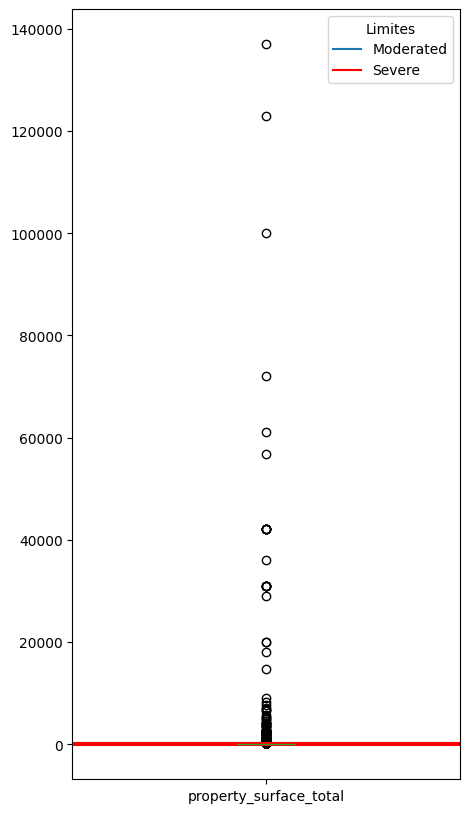

In [113]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

Como tenemos outliers muy altos, el boxplot no se aprecia. Tomaremos solo los outliers severos para un primer análisis

0-272       3214
272-500     2036
500-750      189
1000-inf      91
750-1000      20
Name: property_surface_total, dtype: int64


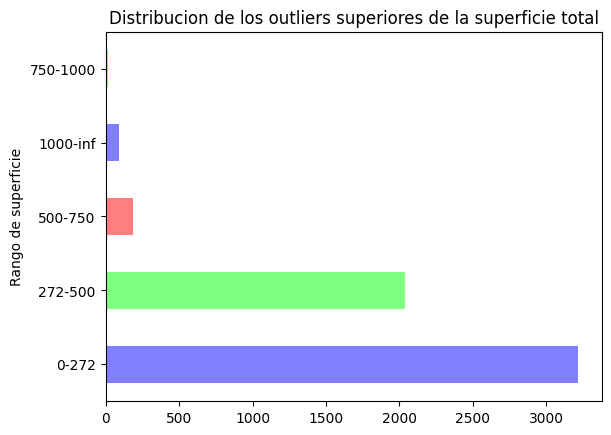

In [114]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [115]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [116]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers superiores de sup total en train son: 300. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 300. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


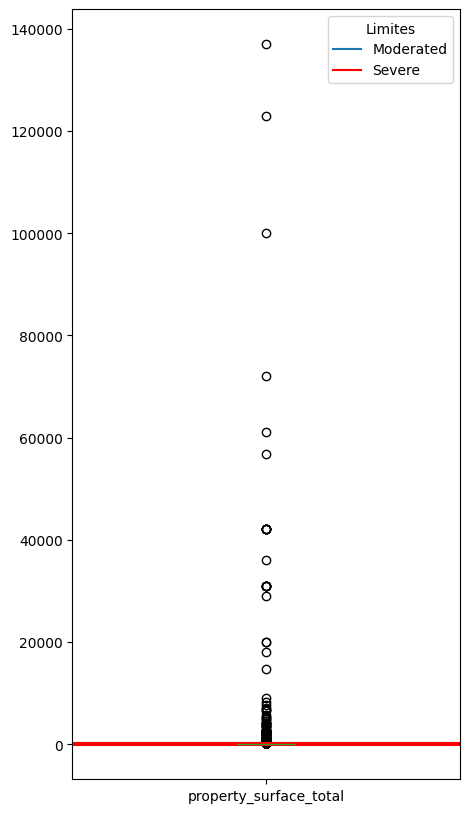

In [117]:
boxplot_with_outliers(ds_train, 'property_surface_total')

###### Procederemos a eliminar las superifices mayores a 500m^2

In [118]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 300 registros en train
Se han eliminado: 68 registros en test


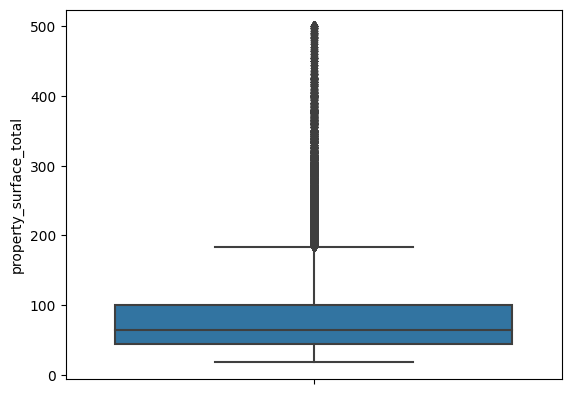

In [119]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

##### Superficie cubierta

cantidad de datos del ds: 73394
outliers encontrados para los property_surface_covered: 5806
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


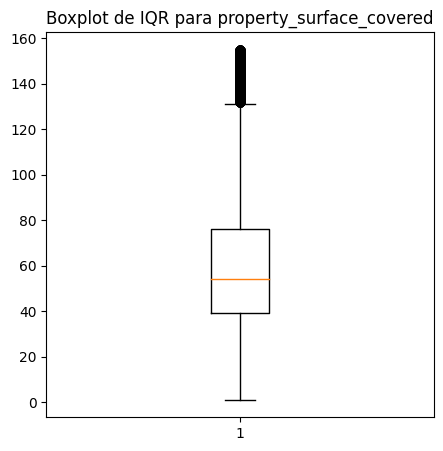

In [120]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [121]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5726. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1351. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


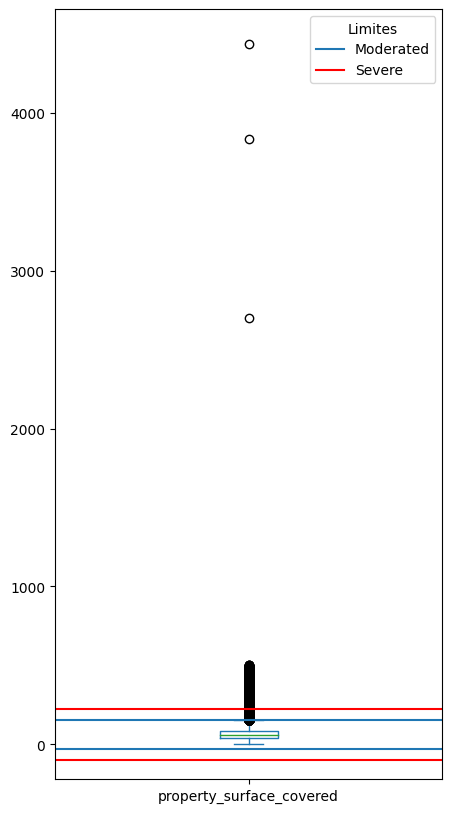

In [122]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Como hay algunas observacion demasiado anómalas, las excluímos para ver mejor

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


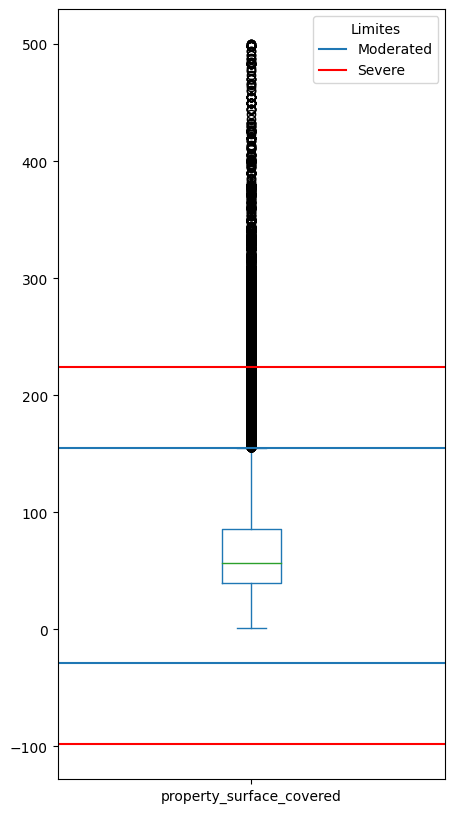

In [123]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3177
224-500     2279
500-750       68
1000-inf      19
750-1000       7
Name: property_surface_covered, dtype: int64


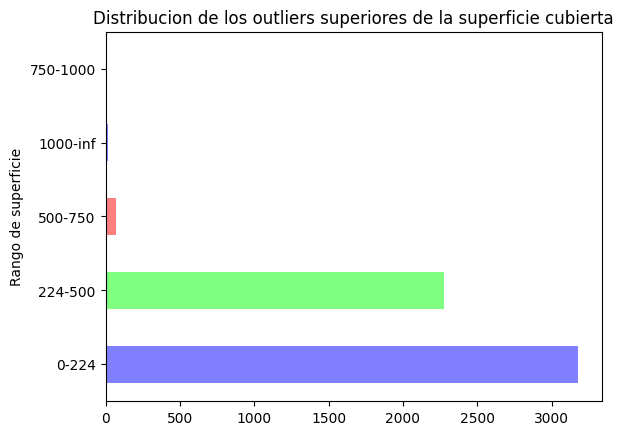

In [124]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

Inspeccionaremos los datos que se encuentran entre 224 y 500 $m^2$ de superficie cubierta

###### Como decidimos tomar como maximo valor de superificie total 500m^2, ese tambien va a ser nuestro maximo limite para la superificie cubierta para mantener la coherencia y el sentido en nuestro dominio. Procederemos a eliminar los valores que se encuentren por arriba. 

In [125]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 3 registros en train
Se han eliminado: 4 registros en test


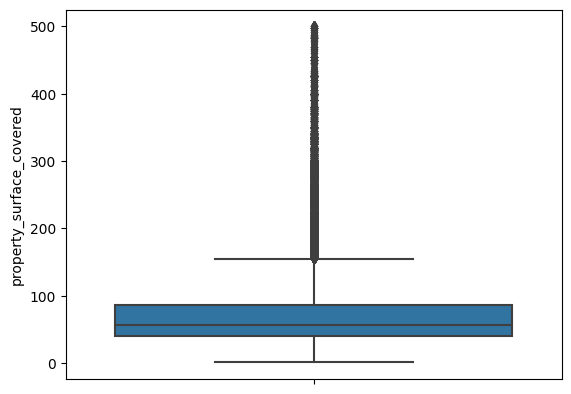

In [126]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

##### Latitud y longitud

cantidad de datos del ds: 73391
outliers encontrados para los latitud: 422
hay 0% de outliers de latitud sobre el ds
limit sup: -34.520067125, limite inf: -34.672677725


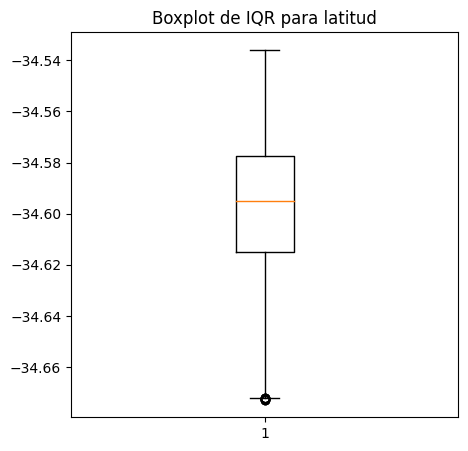

In [127]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73391
outliers encontrados para los longitud: 86
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32476789999999, limite inf: -58.54983590000001


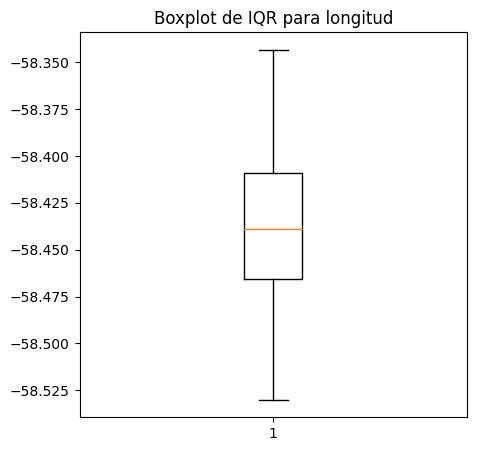

In [128]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

Los datos de latitud y longitud son dificiles de analizar por medio del rango intercuartil dado que los datos representan variaciones muy pequeñas y no son faciles de imaginar sin una ubicación en el mapa. Haremos este análisis más adelante.

In [129]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73313. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 78. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17641. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 18. Constituyen al 0% de los datos


#### Metodo Z score

In [130]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

Analisis de outliers con el metodo zscore para los ambientes

##### Ambientes

In [131]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para el caso de la variable Rooms

In [132]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 527. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 527. Constituyen al 2% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos


Aunque Zscore haya encontrado outliers, no consideramos que haya algun motivo valido para borrar estos datos. Por otro lado, corrimos Zscore modificado y despues de haber borrado los outliers por el metodo de IQR, no detecto ningun outlier. Proseguiremos sin borrar mas nada para rooms

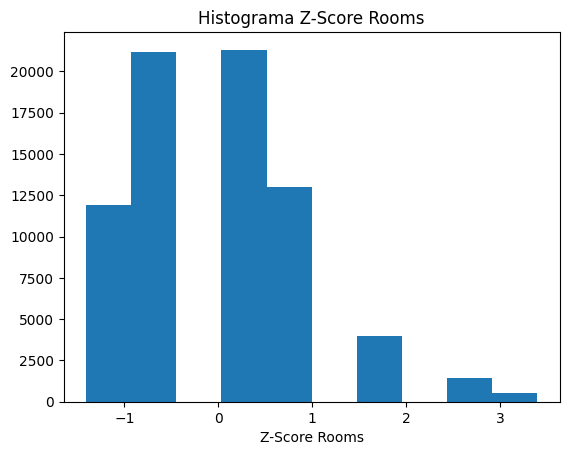

In [133]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

##### Habitaciones

In [134]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [135]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 652.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 652.Constituyen al 3% de los datos


id start_date                      end_date  \
172919  rF6Psun7Mtq695dxUi4g0A== 2021-05-11 2021-05-12 00:00:00.000000000   
427198  /FmFRgXCxWwz9ajHgxt8wQ== 2021-12-16 2022-03-25 00:00:00.000000000   
442693  We6nUwRXohGZBnas7ISjVg== 2021-05-07 2021-06-05 00:00:00.000000000   
322682  +nDjyS/WOwTI/P9/mHyAyQ== 2021-06-15 2021-08-28 13:04:34.205937596   
430876  zrHJezU3OGKYgq0CMtQrtA== 2021-12-16 2022-02-09 00:00:00.000000000   
...                          ...        ...                           ...   
377360  uZBD7T/3dtwygoXkJrNjmA== 2021-03-16 2021-03-25 00:00:00.000000000   
185852  V1EHVX0t3ojfgw1bTJs+lA== 2021-08-07 2022-03-29 00:00:00.000000000   
109244  jnE7OrJ1utJh+0wCDv8hnQ== 2021-10-19 2021-12-29 00:00:00.000000000   
96649   z/NzXvstc9mrLaNeenG+0A== 2021-07-02 2021-09-14 13:04:34.205937596   
82068   czd9ijDCpVhoe/RvpnxVcw== 2021-03-12 2021-06-05 00:00:00.000000000   

          latitud   longitud      place_l3 property_type  property_rooms  \
172919 -34.629259 -58.414407         Boedo          Casa             6.0   
427198 -34.562314 -58.450959      Belgrano  Departamento             6.0   
442693 -34.580956 -58.454212     Chacarita          Casa             6.0   
322682 -34.622785 -58.459926        Flores  Departamento             6.0   
430876 -34.608916 -58.511727  Villa Devoto          Casa             6.0   
...           ...        ...           ...           ...             ...   
377360 -34.612125 -58.425586       Almagro            PH             7.0   
185852 -34.604891 -58.449569  Villa Crespo          Casa             5.0   
109244 -34.659898 -58.511279     Mataderos            PH             6.0   
96649  -34.612834 -58.376045     San Telmo  Departamento             6.0   
82068  -34.562466 -58.454011      Belgrano  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
172919                5.0                   285.0                     285.0   
427198                5.0                   363.0                     363.0   
442693                5.0                   300.0                     200.0   
322682                5.0                   280.0                     280.0   
430876                5.0                   226.0                     170.0   
...                   ...                     ...                       ...   
377360                6.0                   226.0                     160.0   
185852                5.0                   192.0                      80.0   
109244                5.0                   170.0                     160.0   
96649                 5.0                   207.0                     207.0   
82068                 5.0                   290.0                     280.0   

        property_price                                     property_title  \
172919        599000.0            VENTA CASA 6 AMBIENTES BOEDO 4 COCHERAS   
427198       1290000.0   Un Lujo PISO en Barrancas de Belgrano TORRE AZUL   
442693        348000.0  VENTA - CHACARITA - CASA SOBRE LOTE PROPIO - 3...   
322682        330000.0                              Departamento - Flores   
430876        345000.0  Casa 6 Amb Coch Patio Terraza. Lote 8.66 x 18....   
...                ...                                                ...   
377360        349000.0                                           Ph venta   
185852        170000.0       Casa de 6 ambientes en Venta en Villa crespo   
109244        160000.0       PH al frente 6 Amb. en Mataderos, buena zona   
96649         290000.0                           Departamento - San Telmo   
82068        1200000.0  RETASADO Torre ARRIBEÑOS full Amenities Venta ...   

        z_property_bedrooms  
172919             3.298513  
427198             3.298513  
442693             3.298513  
322682             3.298513  
430876             3.298513  
...                     ...  
377360             4.349108  
185852             3.298513  
109244             3.298513  
96649             

In [136]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

Mismo caso que para los rooms, al haber borrado los outliers de bedrooms por el metodo IQR notamos que al correr Zscore modificado ya no hay outliers aunque Zscore si detecta algunos. No los eliminaremos porque tras analizar el dataset resultante no vemos ningun valor extraño en nuestro dominio.

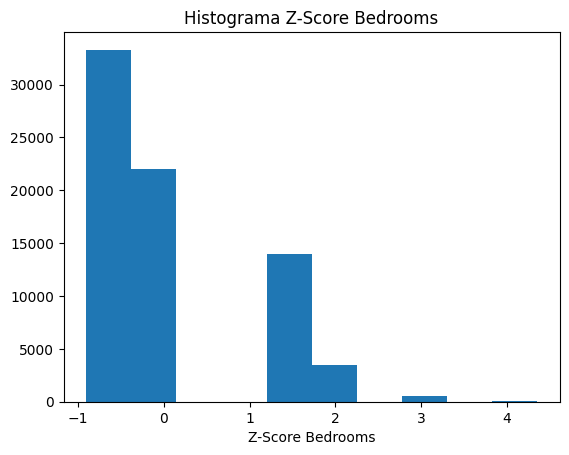

In [137]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

##### Superficie Total

In [138]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [139]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1814. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1814. Constituyen al 10% de los datos


id start_date                      end_date  \
172919  rF6Psun7Mtq695dxUi4g0A== 2021-05-11 2021-05-12 00:00:00.000000000   
1861    iE84ba3ZjzhYcJ/1R7uNDA== 2021-12-17 2022-02-09 00:00:00.000000000   
388424  3S/fQLgJ09J7i3Yrfg4oLw== 2021-10-12 2021-11-13 00:00:00.000000000   
38965   7GMdW6s8tpXuZQ/sNSd/gQ== 2021-07-30 2021-10-12 13:04:34.205937596   
181045  pKQmjTh50XbWBKPiJkYDYg== 2021-08-06 2022-02-09 00:00:00.000000000   

          latitud   longitud    place_l3 property_type  property_rooms  \
172919 -34.629259 -58.414407       Boedo          Casa             6.0   
1861   -34.641978 -58.492660  Villa Luro          Casa             5.0   
388424 -34.592282 -58.378571      Retiro  Departamento             7.0   
38965  -34.664029 -58.483824   Mataderos          Casa             6.0   
181045 -34.653258 -58.525356     Liniers          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
172919                5.0                   285.0                     285.0   
1861                  4.0                   293.0                     293.0   
388424                4.0                   390.0                     390.0   
38965                 4.0                   320.0                     320.0   
181045                3.0                   300.0                     300.0   

        property_price                                     property_title  \
172919        599000.0            VENTA CASA 6 AMBIENTES BOEDO 4 COCHERAS   
1861          340000.0  VENTA CASA 5 AMB C/ JARDIN Y COCHERA - VILLA LURO   
388424       1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
38965         319000.0                        Casa Venta cochera y jardín   
181045        370000.0  Casa Venta a 4 Amb,patio, parrilla Capital Fed...   

        z_property_surface_total  
172919                  3.033568  
1861                    3.155337  
388424                  4.631788  
38965                   3.566308  
181045                  3.261885

In [140]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore como outliers son aquellas viviendas que tienen mas de 200 m^2 pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

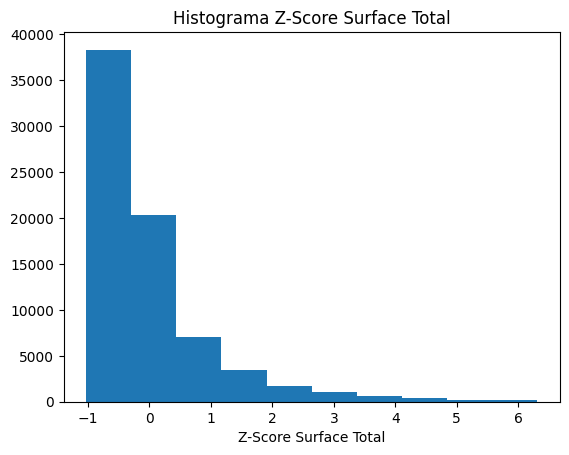

In [141]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Superficie Cubierta

In [142]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [143]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1728. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1728. Constituyen al 9% de los datos


id start_date                      end_date  \
172919  rF6Psun7Mtq695dxUi4g0A== 2021-05-11 2021-05-12 00:00:00.000000000   
1861    iE84ba3ZjzhYcJ/1R7uNDA== 2021-12-17 2022-02-09 00:00:00.000000000   
167962  qVJnL0sGke7v7iYIrK3NUw== 2021-04-30 2021-05-31 00:00:00.000000000   
388424  3S/fQLgJ09J7i3Yrfg4oLw== 2021-10-12 2021-11-13 00:00:00.000000000   
38965   7GMdW6s8tpXuZQ/sNSd/gQ== 2021-07-30 2021-10-12 13:04:34.205937596   
...                          ...        ...                           ...   
117696  YMbBjYIcfeBjZHPcL+ml7Q== 2021-08-18 2021-09-14 00:00:00.000000000   
308357  HTljW1468eu2jEk6V/UQzw== 2021-04-28 2021-05-01 00:00:00.000000000   
82068   czd9ijDCpVhoe/RvpnxVcw== 2021-03-12 2021-06-05 00:00:00.000000000   
116440  wT+cQgFw5BJDt5FArpXvzw== 2021-11-12 2022-04-02 00:00:00.000000000   
256802  X7tMSZh5Pxc5GKi29kujow== 2021-11-03 2022-01-27 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
172919 -34.629259 -58.414407          Boedo          Casa             6.0   
1861   -34.641978 -58.492660     Villa Luro          Casa             5.0   
167962 -34.592661 -58.392841       Recoleta  Departamento             6.0   
388424 -34.592282 -58.378571         Retiro  Departamento             7.0   
38965  -34.664029 -58.483824      Mataderos          Casa             6.0   
...           ...        ...            ...           ...             ...   
117696 -34.559873 -58.449254       Belgrano  Departamento             5.0   
308357 -34.619817 -58.529491     Villa Real          Casa             5.0   
82068  -34.562466 -58.454011       Belgrano  Departamento             6.0   
116440 -34.610839 -58.361767  Puerto Madero  Departamento             4.0   
256802 -34.576814 -58.465850       Belgrano  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
172919                5.0                   285.0                     285.0   
1861                  4.0                   293.0                     293.0   
167962                3.0                   257.0                     244.0   
388424                4.0                   390.0                     390.0   
38965                 4.0                   320.0                     320.0   
...                   ...                     ...                       ...   
117696                4.0                   315.0                     290.0   
308357                4.0                   336.0                     306.0   
82068                 5.0                   290.0                     280.0   
116440                3.0                   316.0                     316.0   
256802                4.0                   300.0                     300.0   

        property_price                                     property_title  \
172919        599000.0            VENTA CASA 6 AMBIENTES BOEDO 4 COCHERAS   
1861          340000.0  VENTA CASA 5 AMB C/ JARDIN Y COCHERA - VILLA LURO   
167962        590000.0  RETASADO VENTA DUPLEX ALTO sobre Callao   gran...   
388424       1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
38965         319000.0                        Casa Venta cochera y jardín   
...                ...                                                ...   
117696        760000.0                  Departamento - Belgrano Barrancas   
308357        249000.0            VENTA TRIPLEX 4 HABITACIONES VILLA REAL   
82068        1200000.0  RETASADO Torre ARRIBEÑOS full Amenities Venta ...   
116440       2100000.0  VENTA TRIPLEX en excelente ubicación en Le Par...   
256802        850000.0  Piso de categoria hecho a nuevo en pleno Belgr...   

        z_property_surface_covered  
172919                    3.765576  
1861                      3.908742  
167962                    3.031853  
388424                    5.644623  
38965                     4.391925  
...                            ...  
117696                    3.855055  
308357    

In [144]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

Los outliers encontrados por Zscore son los valores que decidimos mantener. Se encuentran en el rango de > 200m^2 y < 500m^2. No eliminaremos nada. 

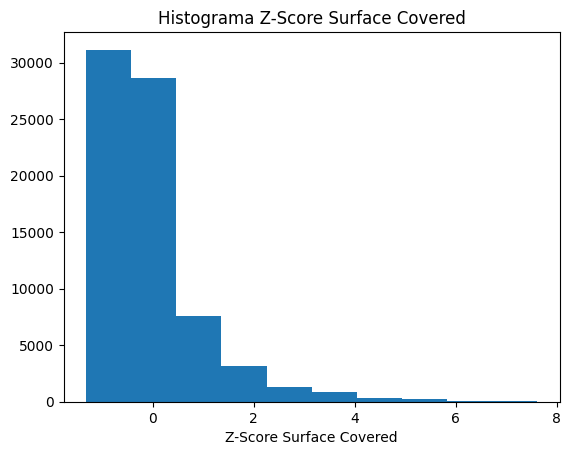

In [145]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Latitud y Longitud

In [146]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [147]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 79. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 79. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
254011  +7kG2Tj1UePihv3SvgipLQ== 2021-08-20 2021-09-02 -33.081030 -68.468140   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
9153    PGEusvkhHkst1cMhvxu/WA== 2021-05-18 2021-06-23 -33.081030 -68.468140   
246156  qE44zAGBD4MMM0pfwpt6sQ== 2021-10-08 2022-02-09 -33.081030 -68.468140   
32736   XwuIhur6BmvlH65bNlQoJA== 2021-02-08 2021-03-26 -33.081035 -68.468102   
...                          ...        ...        ...        ...        ...   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
411058  pUcVtnFyfRaD8YhgT/GMEQ== 2021-03-02 2021-06-05 -32.964094 -60.629053   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   

       place_l3 property_type  property_rooms  property_bedrooms  \
254011      NaN  Departamento             2.0                1.0   
234899      NaN  Departamento             1.0                1.0   
9153        NaN  Departamento             3.0                2.0   
246156      NaN  Departamento             2.0                1.0   
32736       NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
248772      NaN          Casa             4.0                3.0   
226093      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
411058      NaN  Departamento             1.0                1.0   
32705       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
254011                    52.0                      48.0        100000.0   
234899                    42.0                      37.0         54000.0   
9153                      66.0                      60.0         80000.0   
246156                    34.0                      32.0         56000.0   
32736                     49.0                      49.0         87000.0   
...                        ...                       ...             ...   
248772                   220.0                     220.0        295000.0   
226093                    51.0                      51.0         85000.0   
61175                    500.0                     200.0        208000.0   
411058                    34.0                      34.0         52000.0   
32705                    124.0                      64.0        240000.0   

                                           property_title  z_latitud  
254011  VENTA+2 ambientes+amplio+centro + Villa Balles...  10.995590  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...  10.990795  
9153      Venta 3 ambientes San Martín Centro Gran Balcon  10.995590  
246156  Departamento 2 Ambientes San Martin Acepta per...  10.995590  
32736   Venta 2 Amb.a estrenar c/Piscina. Ctro. San Ma...  10.995554  
...                                                   ...        ...  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  51.802365  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  10.995590  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  22.752636  
411058  Departamento MONOAMBIENTE A ESTRENAR contrafre...  11.845900  
32705             Venta Departamento Terrazas Golf Pilará  71.424062  

[79 rows x 14 columns]

In [148]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 7. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 7. Constituyen al 0% de los datos


id start_date                      end_date  \
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 13:04:34.205937596   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 13:04:34.205937596   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   

          latitud   longitud place_l3 property_type  property_rooms  \
131188 -41.083002 -71.182747      NaN  Departamento             2.0   
10486  -41.163826 -71.438923      NaN          Casa             4.0   
208085 -41.085373 -71.185766      NaN  Departamento             2.0   
106288 -40.131723 -71.299436      NaN  Departamento             2.0   
155333 -41.164123 -71.415420      NaN          Casa             3.0   
324200 -38.940227 -68.073865      NaN  Departamento             3.0   
105792 -41.084900 -71.187159      NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
131188                1.0                    66.0                      56.0   
10486                 3.0                   100.0                     100.0   
208085                1.0                    60.0                      50.0   
106288                1.0                    44.0                      44.0   
155333                2.0                    70.0                      70.0   
324200                2.0                    55.0                      55.0   
105792                1.0                    53.0                      53.0   

        property_price                                     property_title  \
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
10486         410000.0  BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...   
208085        142000.0  Excelente departamento en venta en Dina Huapi ...   
106288        105000.0  Hermoso departamento en venta, totalmente equi...   
155333        380000.0  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...   
324200        120000.0  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...   
105792        145000.0  Villa Huapi - Dina Huapi - Río Negro - APTO CR...   

        z_latitud  
131188 -47.191387  
10486  -47.779103  
208085 -47.208632  
106288 -40.274087  
155333 -47.781268  
324200 -31.610028  
105792 -47.205186

Comprarandolo con los valores de lat/long del gráfico de CABA, podemos ver que los datos corresponden a valores que no están dentro del rango. Procederemos a eliminarlos en base al zscore.

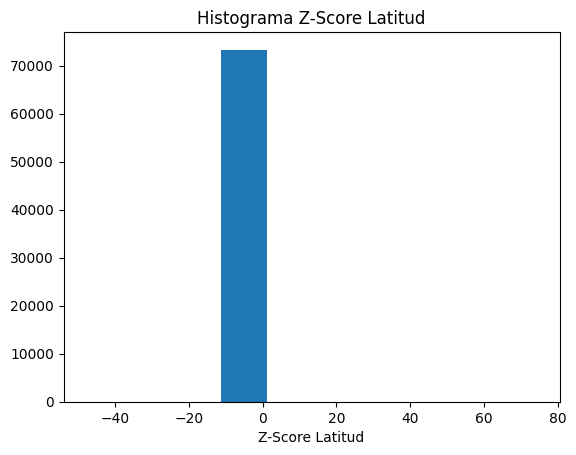

In [149]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [150]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
460026  2jfcV70r5M8iASKFbpFEqA== 2021-01-05 2021-06-24 -34.571806 -58.479139   
265093  HAVkMktdPRn+l4cTf6/h9A== 2021-11-19 2022-01-27 -34.587972 -58.422916   
446086  vEZ4YGWK+rLumCjMw8zfYA== 2021-01-14 2022-06-30 -34.583041 -58.434446   
326718  U3KiqS1NXWSS+2MHQ9uDAQ== 2021-01-31 2021-04-10 -34.572406 -58.430855   
228085  Q4FFDOnB7r5e7zO7Qb4riQ== 2021-02-12 2021-04-22 -34.592019 -58.396169   

             place_l3 property_type  property_rooms  property_bedrooms  \
460026  Villa Urquiza  Departamento             1.0                1.0   
265093        Palermo  Departamento             2.0                1.0   
446086        Palermo  Departamento             2.0                1.0   
326718        Palermo  Departamento             5.0                3.0   
228085       Recoleta  Departamento             7.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
460026                    38.0                      32.0         85000.0   
265093                    34.0                      34.0        122000.0   
446086                   110.0                      70.0        295000.0   
326718                   153.0                     153.0        540000.0   
228085                   174.0                     159.0        555000.0   

                                           property_title  z_latitud  
460026  Departamento monoambiente a estrenar con ampli...   0.155295  
265093                             Departamento - Palermo   0.037740  
446086                      Departamento LOFT CON TERRAZA   0.073597  
326718                         Departamento - Las Cañitas   0.150929  
228085    Muy Lindo y elegante departamento 3 dormitorios   0.008310

In [151]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
220851      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
220851                   105.0                     105.0        190000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   

                                           property_title  z_longitud  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.764311  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.201788  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.033228  
173667  Venta departamento 4 amb Vicente Lopez con cochea   11.764311  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.545213  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.201788

In [152]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 77. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 77. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
254011  +7kG2Tj1UePihv3SvgipLQ== 2021-08-20 2021-09-02 -33.081030 -68.468140   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
9153    PGEusvkhHkst1cMhvxu/WA== 2021-05-18 2021-06-23 -33.081030 -68.468140   
246156  qE44zAGBD4MMM0pfwpt6sQ== 2021-10-08 2022-02-09 -33.081030 -68.468140   
32736   XwuIhur6BmvlH65bNlQoJA== 2021-02-08 2021-03-26 -33.081035 -68.468102   
...                          ...        ...        ...        ...        ...   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 -41.084900 -71.187159   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
411058  pUcVtnFyfRaD8YhgT/GMEQ== 2021-03-02 2021-06-05 -32.964094 -60.629053   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   

       place_l3 property_type  property_rooms  property_bedrooms  \
254011      NaN  Departamento             2.0                1.0   
234899      NaN  Departamento             1.0                1.0   
9153        NaN  Departamento             3.0                2.0   
246156      NaN  Departamento             2.0                1.0   
32736       NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
105792      NaN  Departamento             1.0                1.0   
226093      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
411058      NaN  Departamento             1.0                1.0   
32705       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
254011                    52.0                      48.0        100000.0   
234899                    42.0                      37.0         54000.0   
9153                      66.0                      60.0         80000.0   
246156                    34.0                      32.0         56000.0   
32736                     49.0                      49.0         87000.0   
...                        ...                       ...             ...   
105792                    53.0                      53.0        145000.0   
226093                    51.0                      51.0         85000.0   
61175                    500.0                     200.0        208000.0   
411058                    34.0                      34.0         52000.0   
32705                    124.0                      64.0        240000.0   

                                           property_title  z_longitud  
254011  VENTA+2 ambientes+amplio+centro + Villa Balles...  -39.983585  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...  -39.986330  
9153      Venta 3 ambientes San Martín Centro Gran Balcon  -39.983585  
246156  Departamento 2 Ambientes San Martin Acepta per...  -39.983585  
32736   Venta 2 Amb.a estrenar c/Piscina. Ctro. San Ma...  -39.983433  
...                                                   ...         ...  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -50.830474  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -39.983585  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  -23.858764  
411058  Departamento MONOAMBIENTE A ESTRENAR contrafre...   -8.711379  
32705             Venta Departamento Terrazas Golf Pilará  -27.747197  

[77 rows x 14 columns]

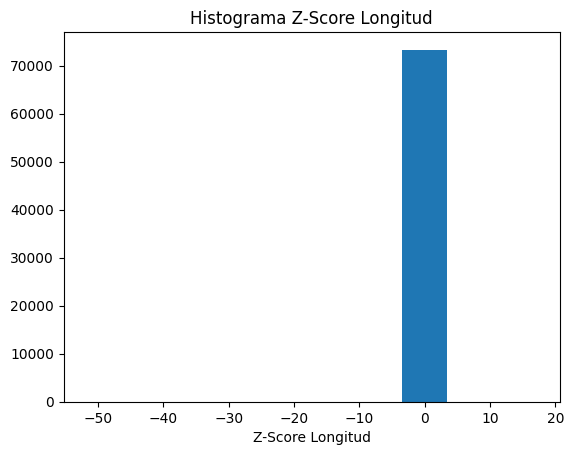

In [153]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

#### Metodo Z Score modificado

In [154]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

##### Ambientes

In [155]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

Verificamos si se cumple la regla de oro para la variable Rooms en el zscore modificado

In [156]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [157]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

Notamos que despues de haber borrado los outliers por el metodo de IQR para rooms, no se detectan outliers por este metodo. Lo mas seguro es que hayan sido outliers compartidos, al borrarlos por un metodo la interseccion nos da vacio.

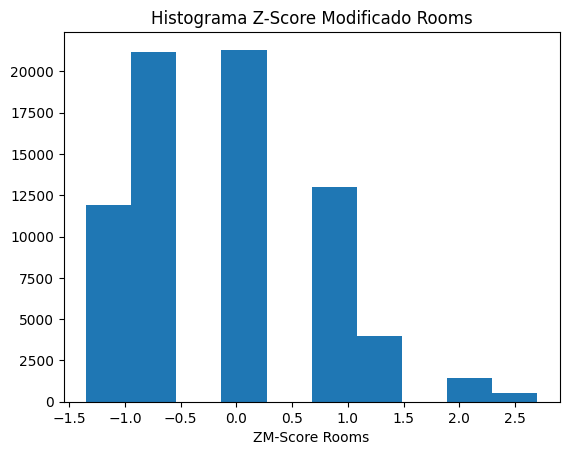

In [158]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

##### Habitaciones

In [159]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [160]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [161]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

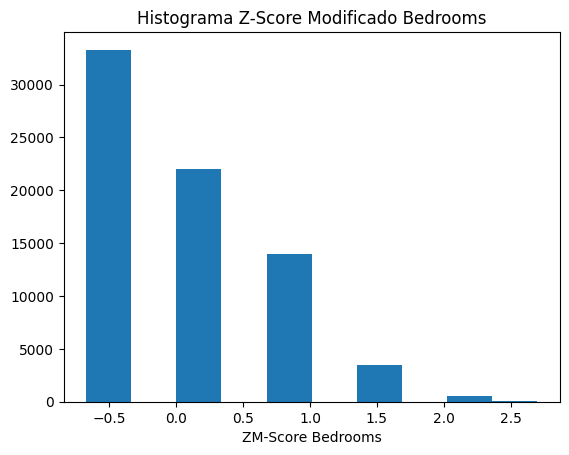

In [162]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

##### Superficie Total

In [163]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
460026  2jfcV70r5M8iASKFbpFEqA== 2021-01-05 2021-06-24 -34.571806 -58.479139   
265093  HAVkMktdPRn+l4cTf6/h9A== 2021-11-19 2022-01-27 -34.587972 -58.422916   
446086  vEZ4YGWK+rLumCjMw8zfYA== 2021-01-14 2022-06-30 -34.583041 -58.434446   
326718  U3KiqS1NXWSS+2MHQ9uDAQ== 2021-01-31 2021-04-10 -34.572406 -58.430855   
228085  Q4FFDOnB7r5e7zO7Qb4riQ== 2021-02-12 2021-04-22 -34.592019 -58.396169   

             place_l3 property_type  property_rooms  property_bedrooms  \
460026  Villa Urquiza  Departamento             1.0                1.0   
265093        Palermo  Departamento             2.0                1.0   
446086        Palermo  Departamento             2.0                1.0   
326718        Palermo  Departamento             5.0                3.0   
228085       Recoleta  Departamento             7.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
460026                    38.0                      32.0         85000.0   
265093                    34.0                      34.0        122000.0   
446086                   110.0                      70.0        295000.0   
326718                   153.0                     153.0        540000.0   
228085                   174.0                     159.0        555000.0   

                                           property_title  \
460026  Departamento monoambiente a estrenar con ampli...   
265093                             Departamento - Palermo   
446086                      Departamento LOFT CON TERRAZA   
326718                         Departamento - Las Cañitas   
228085    Muy Lindo y elegante departamento 3 dormitorios   

        zm_property_surface_total  
460026                  -0.730708  
265093                  -0.843125  
446086                   1.292792  
326718                   2.501271  
228085                   3.091458

Verificamos si se cumple la regla de oro para la variable sup total en el zscore modificado

In [164]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5453. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5453. Constituyen al 30% de los datos


id start_date                      end_date  \
334861  kt/OcSxrFZi+3RNDwozM1g== 2021-12-28 2022-01-27 00:00:00.000000000   
172919  rF6Psun7Mtq695dxUi4g0A== 2021-05-11 2021-05-12 00:00:00.000000000   
1861    iE84ba3ZjzhYcJ/1R7uNDA== 2021-12-17 2022-02-09 00:00:00.000000000   
167962  qVJnL0sGke7v7iYIrK3NUw== 2021-04-30 2021-05-31 00:00:00.000000000   
388424  3S/fQLgJ09J7i3Yrfg4oLw== 2021-10-12 2021-11-13 00:00:00.000000000   
...                          ...        ...                           ...   
272731  FXvyHDToYl9Uh6whDCHYRQ== 2021-02-21 2021-05-20 00:00:00.000000000   
96649   z/NzXvstc9mrLaNeenG+0A== 2021-07-02 2021-09-14 13:04:34.205937596   
82068   czd9ijDCpVhoe/RvpnxVcw== 2021-03-12 2021-06-05 00:00:00.000000000   
116440  wT+cQgFw5BJDt5FArpXvzw== 2021-11-12 2022-04-02 00:00:00.000000000   
256802  X7tMSZh5Pxc5GKi29kujow== 2021-11-03 2022-01-27 00:00:00.000000000   

          latitud   longitud          place_l3 property_type  property_rooms  \
334861 -34.621683 -58.487698  Villa Santa Rita          Casa             4.0   
172919 -34.629259 -58.414407             Boedo          Casa             6.0   
1861   -34.641978 -58.492660        Villa Luro          Casa             5.0   
167962 -34.592661 -58.392841          Recoleta  Departamento             6.0   
388424 -34.592282 -58.378571            Retiro  Departamento             7.0   
...           ...        ...               ...           ...             ...   
272731 -34.622528 -58.460193            Flores  Departamento             3.0   
96649  -34.612834 -58.376045         San Telmo  Departamento             6.0   
82068  -34.562466 -58.454011          Belgrano  Departamento             6.0   
116440 -34.610839 -58.361767     Puerto Madero  Departamento             4.0   
256802 -34.576814 -58.465850          Belgrano  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
334861                2.0                   255.0                     125.0   
172919                5.0                   285.0                     285.0   
1861                  4.0                   293.0                     293.0   
167962                3.0                   257.0                     244.0   
388424                4.0                   390.0                     390.0   
...                   ...                     ...                       ...   
272731                2.0                   192.0                      90.0   
96649                 5.0                   207.0                     207.0   
82068                 5.0                   290.0                     280.0   
116440                3.0                   316.0                     316.0   
256802                4.0                   300.0                     300.0   

        property_price                                     property_title  \
334861        225000.0  Venta Casa Lote ppio 255m² - C/garage y terraz...   
172919        599000.0            VENTA CASA 6 AMBIENTES BOEDO 4 COCHERAS   
1861          340000.0  VENTA CASA 5 AMB C/ JARDIN Y COCHERA - VILLA LURO   
167962        590000.0  RETASADO VENTA DUPLEX ALTO sobre Callao   gran...   
388424       1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
...                ...                                                ...   
272731        230000.0     VENTA DEPARTAMENTO 3AMB. DEP. Y COCHERA FLORES   
96649         290000.0                           Departamento - San Telmo   
82068        1200000.0  RETASADO Torre ARRIBEÑOS full Amenities Venta ...   
116440       2100000.0  VENTA TRIPLEX en excelente ubicación en Le Par...   
256802        850000.0  Piso de categoria hecho a nuevo en pleno Belgr...   

        zm_property_surface_total  
334861                   5.367896  
172919                   6.211021  
1861                     6.435854  
167962                   5.424104  
388424                   9.161958  
...                           ...  
272731            

In [165]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

Los valores que nos devolvio el metodo Zscore Modificado, asi como tambien el Zscore, son aquellas viviendas que tienen mas de 200 m^2 y menos de 500m^2pero que nosotros en el analisis de IQR decidimos mantener. No lo vamos a borrar por lo explicado anteriormente

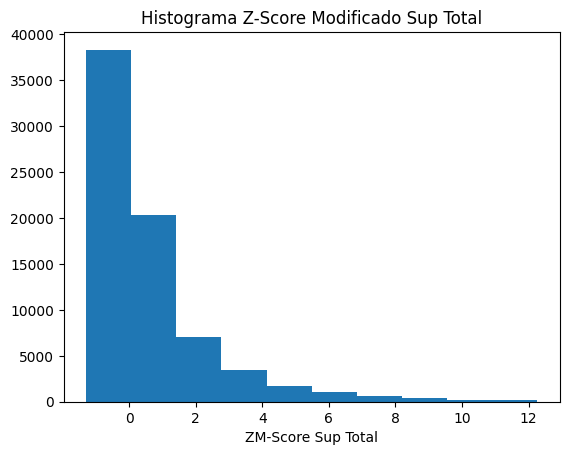

In [166]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

##### Superficie Cubierta

In [167]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

Verificamos si se cumple la regla de oro para la variable sup cubierta en el zscore modificado

In [168]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date                      end_date  \
172919  rF6Psun7Mtq695dxUi4g0A== 2021-05-11 2021-05-12 00:00:00.000000000   
1861    iE84ba3ZjzhYcJ/1R7uNDA== 2021-12-17 2022-02-09 00:00:00.000000000   
167962  qVJnL0sGke7v7iYIrK3NUw== 2021-04-30 2021-05-31 00:00:00.000000000   
299470  PNbMiOBg6RIqyrvjqVjjog== 2021-01-18 2021-09-02 00:00:00.000000000   
388424  3S/fQLgJ09J7i3Yrfg4oLw== 2021-10-12 2021-11-13 00:00:00.000000000   
...                          ...        ...                           ...   
308357  HTljW1468eu2jEk6V/UQzw== 2021-04-28 2021-05-01 00:00:00.000000000   
96649   z/NzXvstc9mrLaNeenG+0A== 2021-07-02 2021-09-14 13:04:34.205937596   
82068   czd9ijDCpVhoe/RvpnxVcw== 2021-03-12 2021-06-05 00:00:00.000000000   
116440  wT+cQgFw5BJDt5FArpXvzw== 2021-11-12 2022-04-02 00:00:00.000000000   
256802  X7tMSZh5Pxc5GKi29kujow== 2021-11-03 2022-01-27 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
172919 -34.629259 -58.414407          Boedo          Casa             6.0   
1861   -34.641978 -58.492660     Villa Luro          Casa             5.0   
167962 -34.592661 -58.392841       Recoleta  Departamento             6.0   
299470 -34.572540 -58.476798  Villa Urquiza          Casa             4.0   
388424 -34.592282 -58.378571         Retiro  Departamento             7.0   
...           ...        ...            ...           ...             ...   
308357 -34.619817 -58.529491     Villa Real          Casa             5.0   
96649  -34.612834 -58.376045      San Telmo  Departamento             6.0   
82068  -34.562466 -58.454011       Belgrano  Departamento             6.0   
116440 -34.610839 -58.361767  Puerto Madero  Departamento             4.0   
256802 -34.576814 -58.465850       Belgrano  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
172919                5.0                   285.0                     285.0   
1861                  4.0                   293.0                     293.0   
167962                3.0                   257.0                     244.0   
299470                3.0                   183.0                     183.0   
388424                4.0                   390.0                     390.0   
...                   ...                     ...                       ...   
308357                4.0                   336.0                     306.0   
96649                 5.0                   207.0                     207.0   
82068                 5.0                   290.0                     280.0   
116440                3.0                   316.0                     316.0   
256802                4.0                   300.0                     300.0   

        property_price                                     property_title  \
172919        599000.0            VENTA CASA 6 AMBIENTES BOEDO 4 COCHERAS   
1861          340000.0  VENTA CASA 5 AMB C/ JARDIN Y COCHERA - VILLA LURO   
167962        590000.0  RETASADO VENTA DUPLEX ALTO sobre Callao   gran...   
299470        435000.0                     Casa en venta en Villa Urquiza   
388424       1300000.0  RETASADO VENTA en PALACIO ESTRUGAMOU !! impeca...   
...                ...                                                ...   
308357        249000.0            VENTA TRIPLEX 4 HABITACIONES VILLA REAL   
96649         290000.0                           Departamento - San Telmo   
82068        1200000.0  RETASADO Torre ARRIBEÑOS full Amenities Venta ...   
116440       2100000.0  VENTA TRIPLEX en excelente ubicación en Le Par...   
256802        850000.0  Piso de categoria hecho a nuevo en pleno Belgr...   

        zm_property_surface_covered  
172919                     7.689300  
1861                       7.959100  
167962                     6.306575  
299470                     4.249350  
388424                    11.230425  
...                             ...  
308357                     8.397525  
96

In [169]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

Mismo caso que el explicado para Zscore, Zscore modificado esta tomando como outliers a las superificies cubiertas que estan entre 200 y 500 m^2, nosotros optamos por mantener este valor ya nos parece valido, no eliminaremos nada.

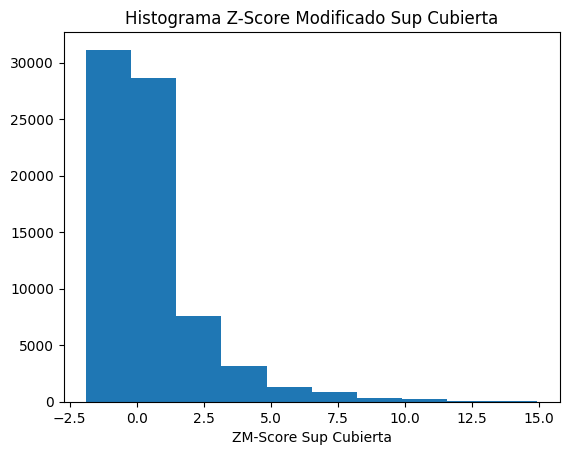

In [170]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

##### Latitud y longitud

In [171]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

Verificamos si se cumple la regla de oro para la variable latitud en el zscore modificado

In [172]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
254011  +7kG2Tj1UePihv3SvgipLQ== 2021-08-20 2021-09-02 -33.081030 -68.468140   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
9153    PGEusvkhHkst1cMhvxu/WA== 2021-05-18 2021-06-23 -33.081030 -68.468140   
246156  qE44zAGBD4MMM0pfwpt6sQ== 2021-10-08 2022-02-09 -33.081030 -68.468140   
32736   XwuIhur6BmvlH65bNlQoJA== 2021-02-08 2021-03-26 -33.081035 -68.468102   
...                          ...        ...        ...        ...        ...   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
411058  pUcVtnFyfRaD8YhgT/GMEQ== 2021-03-02 2021-06-05 -32.964094 -60.629053   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   

       place_l3 property_type  property_rooms  property_bedrooms  \
254011      NaN  Departamento             2.0                1.0   
234899      NaN  Departamento             1.0                1.0   
9153        NaN  Departamento             3.0                2.0   
246156      NaN  Departamento             2.0                1.0   
32736       NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
248772      NaN          Casa             4.0                3.0   
226093      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
411058      NaN  Departamento             1.0                1.0   
32705       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
254011                    52.0                      48.0        100000.0   
234899                    42.0                      37.0         54000.0   
9153                      66.0                      60.0         80000.0   
246156                    34.0                      32.0         56000.0   
32736                     49.0                      49.0         87000.0   
...                        ...                       ...             ...   
248772                   220.0                     220.0        295000.0   
226093                    51.0                      51.0         85000.0   
61175                    500.0                     200.0        208000.0   
411058                    34.0                      34.0         52000.0   
32705                    124.0                      64.0        240000.0   

                                           property_title  zm_latitud  
254011  VENTA+2 ambientes+amplio+centro + Villa Balles...   53.526384  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   53.503072  
9153      Venta 3 ambientes San Martín Centro Gran Balcon   53.526384  
246156  Departamento 2 Ambientes San Martin Acepta per...   53.526384  
32736   Venta 2 Amb.a estrenar c/Piscina. Ctro. San Ma...   53.526207  
...                                                   ...         ...  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  251.893947  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...   53.526384  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  110.679064  
411058  Departamento MONOAMBIENTE A ESTRENAR contrafre...   57.659863  
32705             Venta Departamento Terrazas Golf Pilará  347.277822  

[79 rows x 14 columns]

In [173]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 14. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 14. Constituyen al 0% de los datos


id start_date                      end_date  \
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 00:00:00.000000000   
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 00:00:00.000000000   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 00:00:00.000000000   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 00:00:00.000000000   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 00:00:00.000000000   
10486   urWyn9L7ma60VBO8Ru6Xew== 2021-01-13 2021-03-28 13:04:34.205937596   
208085  2Xn6RKpg2Fps+wLCsSJavw== 2021-02-01 2021-04-16 13:04:34.205937596   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 00:00:00.000000000   
106288  Hrs1e9U6zkvjRh6gD/BBoQ== 2021-03-11 2021-06-05 00:00:00.000000000   
155333  j+0Iyd6D8YGQxE3u+nJiQQ== 2021-04-05 2021-04-15 00:00:00.000000000   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 00:00:00.000000000   
324200  SSbx+/6MNgxE6rIDYPA0+A== 2021-03-03 2021-06-05 00:00:00.000000000   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 00:00:00.000000000   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 00:00:00.000000000   

          latitud   longitud         place_l3 property_type  property_rooms  \
171545 -34.694322 -58.469549     Villa Lugano            PH             3.0   
208451 -34.694366 -58.468208     Villa Lugano  Departamento             2.0   
82540  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
270589 -34.694451 -58.467532     Villa Lugano          Casa             3.0   
131188 -41.083002 -71.182747              NaN  Departamento             2.0   
10486  -41.163826 -71.438923              NaN          Casa             4.0   
208085 -41.085373 -71.185766              NaN  Departamento             2.0   
65844  -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
106288 -40.131723 -71.299436              NaN  Departamento             2.0   
155333 -41.164123 -71.415420              NaN          Casa             3.0   
411779 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
324200 -38.940227 -68.073865              NaN  Departamento             3.0   
250707 -34.698989 -58.469994  Villa Riachuelo  Departamento             4.0   
105792 -41.084900 -71.187159              NaN  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
171545                2.0                    70.0                      70.0   
208451                1.0                    74.0                      42.0   
82540                 3.0                    91.0                      79.0   
270589                2.0                    70.0                      50.0   
131188                1.0                    66.0                      56.0   
10486                 3.0                   100.0                     100.0   
208085                1.0                    60.0                      50.0   
65844                 3.0                    91.0                      79.0   
106288                1.0                    44.0                      44.0   
155333                2.0                    70.0                      70.0   
411779                3.0                    91.0                      79.0   
324200                2.0                    55.0                      55.0   
250707                3.0                    91.0                      79.0   
105792                1.0                    53.0                      53.0   

        property_price                                     property_title  \
171545        229000.0                                  PH - Villa Lugano   
208451        118000.0  Se vende departamento 2 ambientes con patio y ...   
82540          65000.0         Venta 3/4 ambientes Vista Abierta Luminoso   
270589         69000.0                                Casa - Villa Lugano   
131188        135000.0  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO    
10486         410000.0  BAJO EL PRECIO!!

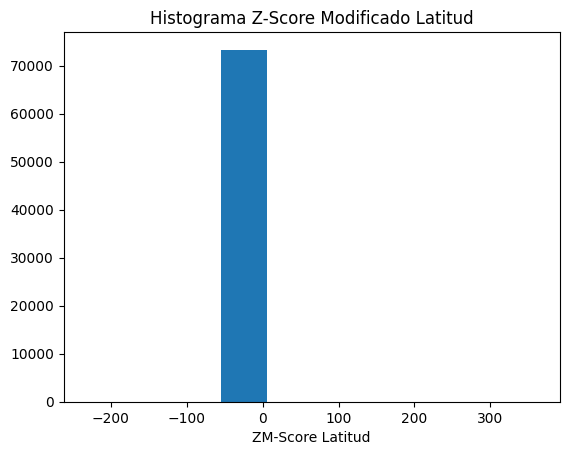

In [174]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [175]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

Verificamos si se cumple la regla de oro para la variable longitud en el zscore modificado

In [176]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   
405382  C7g/npsqWoeBtBCNr0injg== 2021-01-07 2021-01-09 -26.61667 -54.133330   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w== 2021-04-01 2021-04-19 -26.61667 -54.133330   

       place_l3 property_type  property_rooms  property_bedrooms  \
234893      NaN  Departamento             4.0                3.0   
405382      NaN          Casa             3.0                2.0   
220851      NaN          Casa             4.0                2.0   
173667      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
234893                    98.0                      88.0        269000.0   
405382                   205.0                     102.0        125000.0   
220851                   105.0                     105.0        190000.0   
173667                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   

                                           property_title  zm_longitud  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.914844  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.764677  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.332609  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.914844  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.260208  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.764677

In [177]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 80. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 80. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
254011  +7kG2Tj1UePihv3SvgipLQ== 2021-08-20 2021-09-02 -33.081030 -68.468140   
234899  wW3sjHf50MGk2LR+CzvLTQ== 2021-06-02 2021-06-13 -33.081689 -68.468828   
9153    PGEusvkhHkst1cMhvxu/WA== 2021-05-18 2021-06-23 -33.081030 -68.468140   
246156  qE44zAGBD4MMM0pfwpt6sQ== 2021-10-08 2022-02-09 -33.081030 -68.468140   
32736   XwuIhur6BmvlH65bNlQoJA== 2021-02-08 2021-03-26 -33.081035 -68.468102   
...                          ...        ...        ...        ...        ...   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
411058  pUcVtnFyfRaD8YhgT/GMEQ== 2021-03-02 2021-06-05 -32.964094 -60.629053   
32705   5GwRAQ+RyU4uOxF0LOxKuw== 2021-02-08 2022-03-25 -24.770804 -65.400812   

       place_l3 property_type  property_rooms  property_bedrooms  \
254011      NaN  Departamento             2.0                1.0   
234899      NaN  Departamento             1.0                1.0   
9153        NaN  Departamento             3.0                2.0   
246156      NaN  Departamento             2.0                1.0   
32736       NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
248772      NaN          Casa             4.0                3.0   
226093      NaN  Departamento             2.0                1.0   
61175       NaN          Casa             5.0                3.0   
411058      NaN  Departamento             1.0                1.0   
32705       NaN  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
254011                    52.0                      48.0        100000.0   
234899                    42.0                      37.0         54000.0   
9153                      66.0                      60.0         80000.0   
246156                    34.0                      32.0         56000.0   
32736                     49.0                      49.0         87000.0   
...                        ...                       ...             ...   
248772                   220.0                     220.0        295000.0   
226093                    51.0                      51.0         85000.0   
61175                    500.0                     200.0        208000.0   
411058                    34.0                      34.0         52000.0   
32705                    124.0                      64.0        240000.0   

                                           property_title  zm_longitud  
254011  VENTA+2 ambientes+amplio+centro + Villa Balles...  -241.713525  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...  -241.730111  
9153      Venta 3 ambientes San Martín Centro Gran Balcon  -241.713525  
246156  Departamento 2 Ambientes San Martin Acepta per...  -241.713525  
32736   Venta 2 Amb.a estrenar c/Piscina. Ctro. San Ma...  -241.712609  
...                                                   ...          ...  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS    -9.443412  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -241.713525  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  -144.297459  
411058  Departamento MONOAMBIENTE A ESTRENAR contrafre...   -52.786443  
32705             Venta Departamento Terrazas Golf Pilará  -167.788934  

[80 rows x 14 columns]

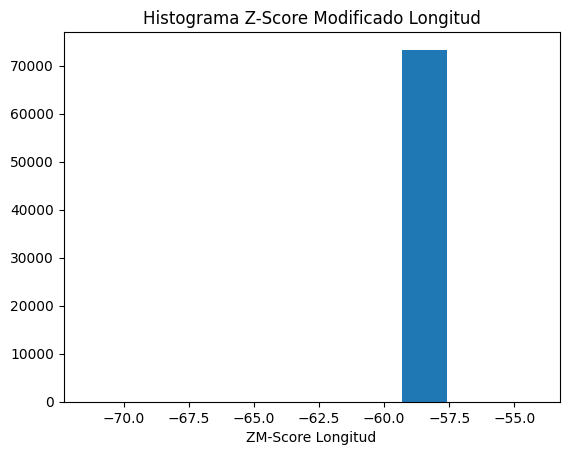

In [178]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

### Multivariados

#### Clustering - Mahalanobis

In [179]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X


In [180]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [181]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

##### Analisis entre ambientes y habitaciones de valores atipicos

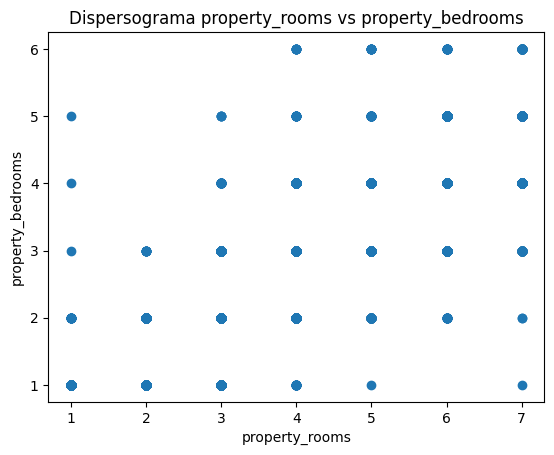

In [182]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

Parecerían exisitir algunas observaciones anómalas. Vamos a calcular la distancia de mahalanobis para cada observación.

In [183]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
460026             1.0                1.0     2.921525
265093             2.0                1.0     1.175707
446086             2.0                1.0     1.175707
326718             5.0                3.0     4.396377
228085             7.0                3.0    34.501925

Tenemos que seleccionar un valor umbral para definir qué observaciones podrían ser anómalas según la distancia de mahalanobis.

<AxesSubplot: ylabel='mahalanobis'>

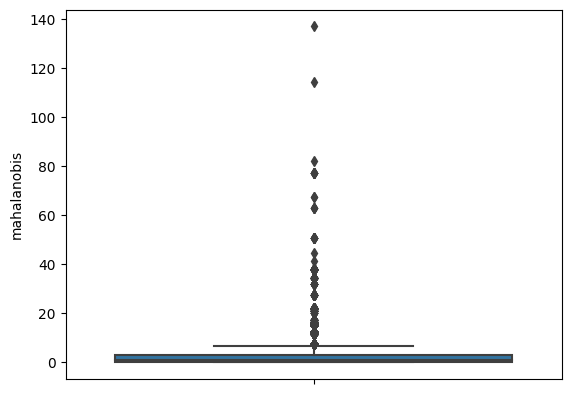

In [184]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

Seleccionamos 35 como valor umbral

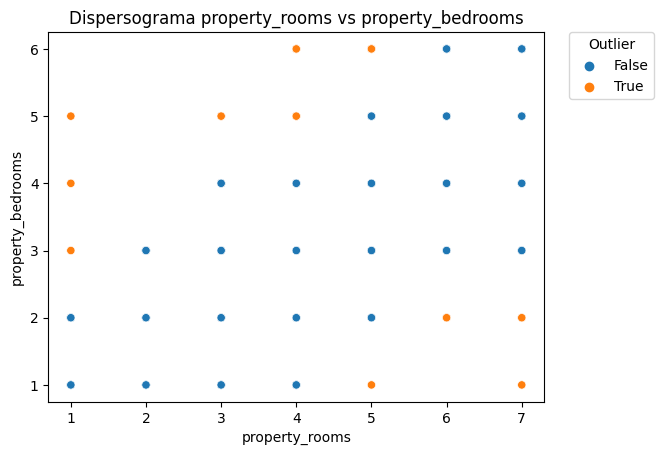

Los outliers para mahalanobis con un umbral de 35 son: 66. Constituyen el 0% de los datos


In [185]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

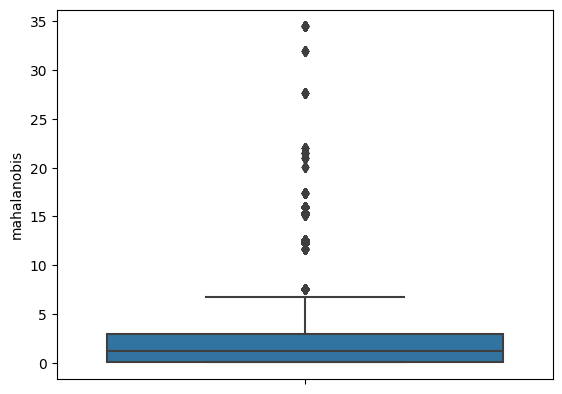

In [186]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [187]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
310160             6.0                2.0    38.247046
377917             6.0                2.0    38.247046
158419             3.0                5.0    62.698551
267033             6.0                2.0    38.247046
432156             4.0                5.0    37.778858
...                ...                ...          ...
324936             6.0                2.0    38.247046
34437              4.0                5.0    37.778858
200589             6.0                2.0    38.247046
150144             3.0                5.0    62.698551
115494             4.0                6.0    77.204768

[66 rows x 3 columns]

Como podemos observar en el scatter plot, quedan bien marcados los outliers que en nuestro dominio de problema no tienen ningun sentido.
Por ejemplo, tener 7 ambientes y 1 habitacion...
Procederemos a eliminar estos outliers.

###### Eliminamos dichas observaciones

In [188]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 66 registros en train
Se han eliminado: 37 registros en test


Dispersograma sin los outliers mencionados


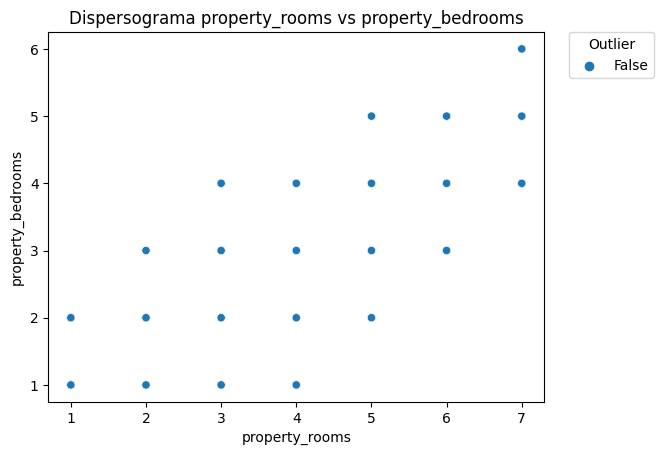

In [189]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

##### Analisis entre superficie total y superificie cubierta de valores atipicos

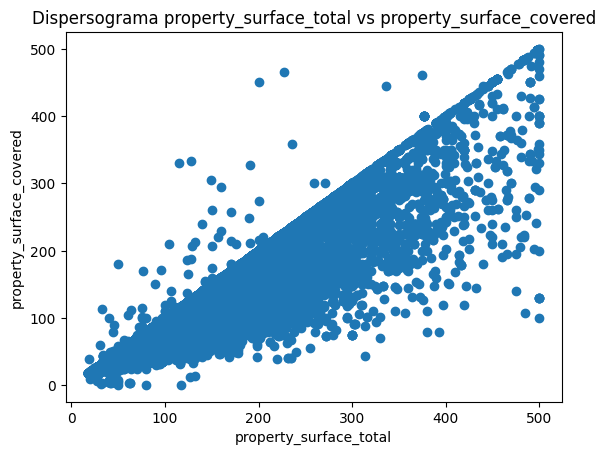

In [190]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [191]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
460026                    38.0                      32.0     0.567217
265093                    34.0                      34.0     0.609495
446086                   110.0                      70.0     1.902603
326718                   153.0                     153.0     2.970375
228085                   174.0                     159.0     2.432803

<AxesSubplot: ylabel='mahalanobis'>

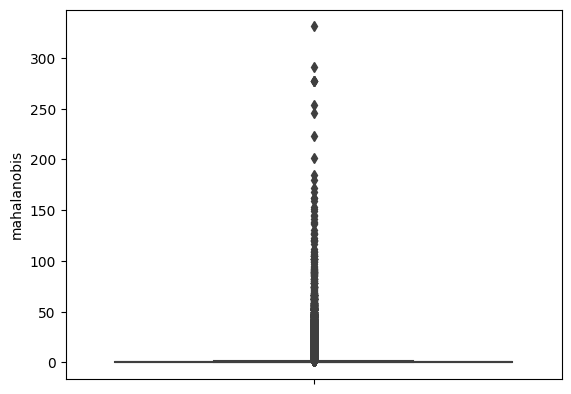

In [192]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [193]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [194]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
445383                   500.0                     130.0   276.963957
104359                   200.0                     450.0   253.754497
52066                    380.0                      80.0   184.643483
97055                    500.0                     130.0   276.963957
394706                   227.0                     466.0   245.518949
387598                   475.0                     140.0   223.562903
45540                    420.0                     120.0   179.309714
121279                   500.0                     130.0   276.963957
32735                    485.0                     108.0   291.572846
138208                   500.0                     100.0   331.247528
97083                    500.0                     130.0   276.963957
412681                   393.0                      80.0   201.686642

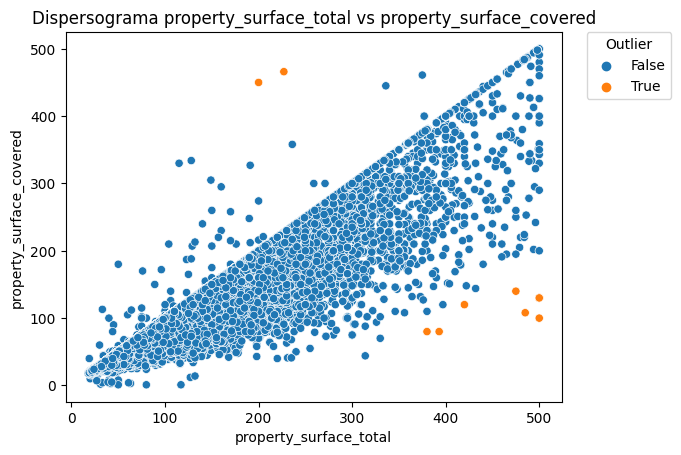

In [195]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

###### Como podemos observar, con mahalanobis pudimos detectar dos escenarios de outliers. Son outliers aquellas viviendas que tengan una superificie cubierta > superificie total Y son outliers tambien aquellas viviendas que tengan una brecha importante entre la superificie total y la cubierta. Por ejemplo: $380 m^2$ de total VS $80 m^2$ de cubierta. Procederemos a eliminarlos.

In [196]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 12 registros en train
Se han eliminado: 4 registros en test


Dispersograma sin los outliers mencionados


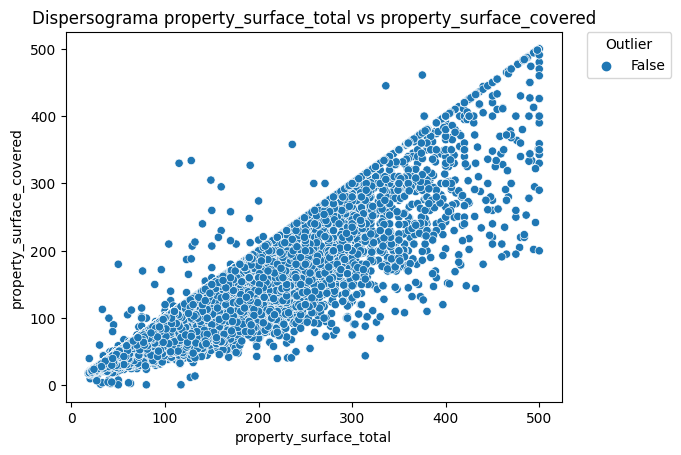

In [197]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

##### Analisis entre latitud y logitud de valores atipicos

In [198]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')


In [199]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 1.0004878425300912


latitud   longitud  mahalanobis
251410 -34.633311 -58.526974     1.171243
254011 -33.081030 -68.468140  5229.741630
114135 -34.640715 -58.513534     1.160685
23321  -34.639535 -58.511217     1.095154
38965  -34.664029 -58.483824     1.435209
...           ...        ...          ...
197738 -34.656761 -58.509456     1.580036
109244 -34.659898 -58.511279     1.716368
386660 -34.658554 -58.501381     1.511257
441995 -34.641279 -58.520442     1.282474
285897 -34.678108 -58.491273     2.058125

[1959 rows x 3 columns]

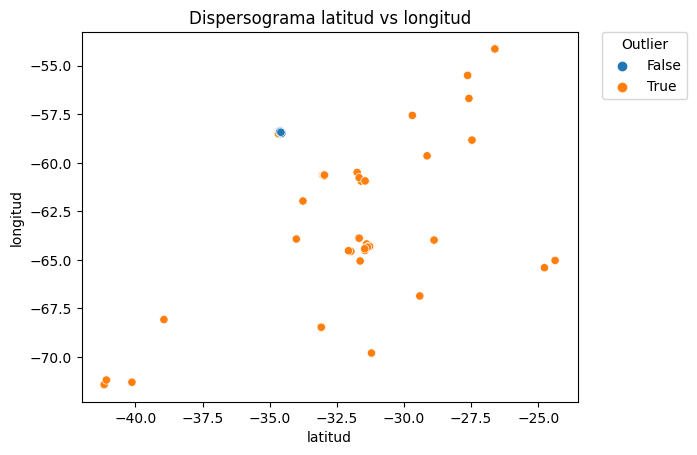

El grafico muestra 1959 outliers
El mínimo según el umbral es de: 1.0004878425300912


In [200]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


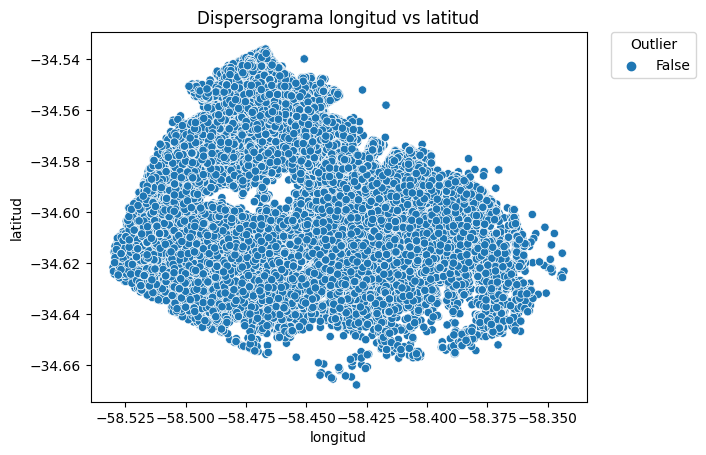

In [201]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

A simple vista se nota como el dispersograma cambió mucho y ahora se parece un poco a CABA. Notar además que tomamos como umbral 1 y sin embargo el valor mínimo de la distancia de estos outliers era de 106.

Como estos 1684 outliers tienen valores demasiado alejados del dataset, procederemos a borrarlos

In [202]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 1959 registros en train
Se han eliminado: 2675 registros en test


Ahora que eliminamos los outliers de latitud y longitud, eliminaremos los datos nulos de place_l3.

In [203]:
ds_train.place_l3.isna().sum()

38

In [204]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

#### Analisis entre superficie total y precio

In [205]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    71316.000000
mean         2.177540
std         52.836038
min          0.000056
25%          0.189952
50%          0.406609
75%          0.703050
max      13701.048146
Name: mahalanobis, dtype: float64

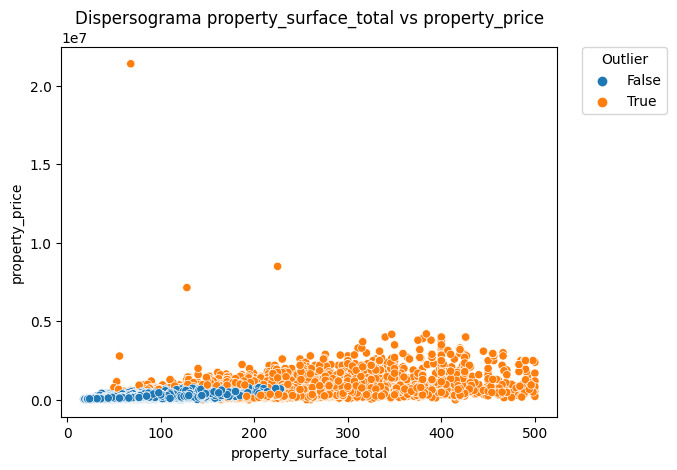

El grafico muestra 4778 outliers
El mínimo según el umbral es de: 5.000513301641648
Los outliers representan un 6.699758819900163%


In [206]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

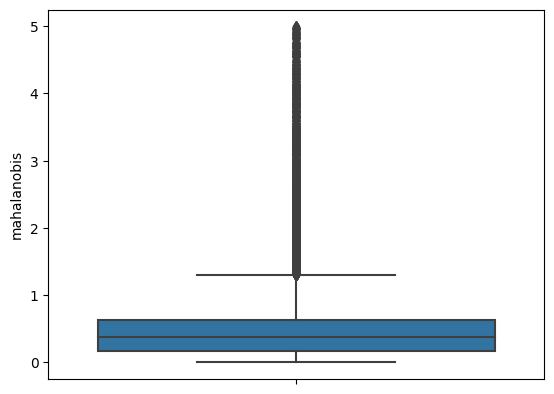

In [207]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

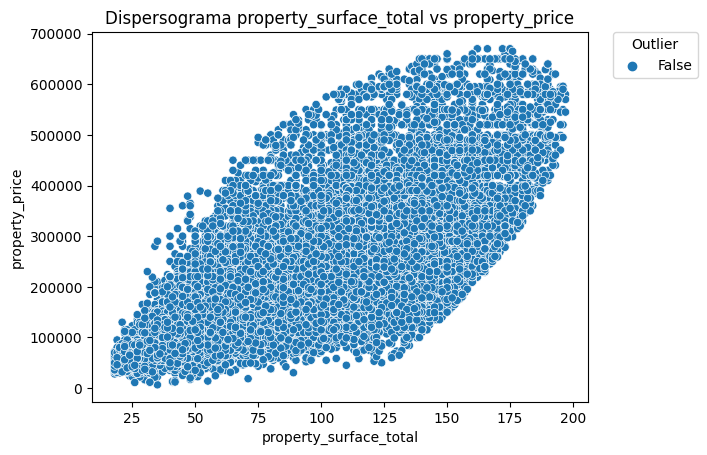

In [208]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

No llegamos a una buena conclusión para decidir el umbral por lo que tomaremos otro camino. Investigaremos acerca del precio por $m^2$ y realizaremos un análisis con el método de IQR sobre eso.

In [209]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 71316
outliers encontrados para los price_m2: 3410
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4289.640591966173, limite inf: 365.75052854122646


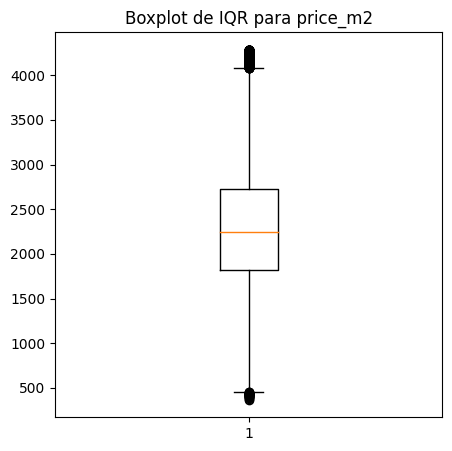

cantidad de datos del ds: 14943
outliers encontrados para los price_m2: 668
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4283.997138706043, limite inf: 431.57764039613335


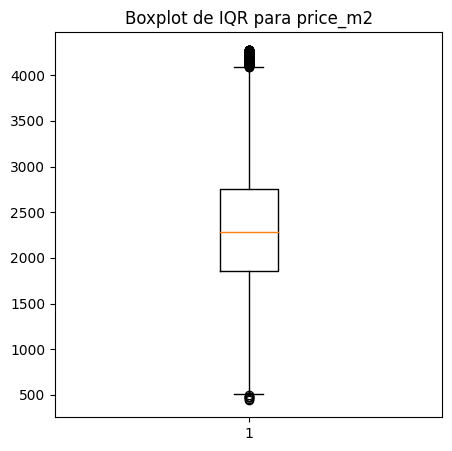

In [210]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3372 registros en train por encima del límite superior en train (4.728251724718156)
Hay 38 registros en train por debajo del límite inferior en train  (0.05328397554545965)
Hay 656 registros en train por encima del límite superior en train (0.9198496831005665)%
Hay 5 registros en train por debajo del límite inferior en train  (0.007011049413876269%)


Text(0.5, 1.0, 'Distribución sin outliers')

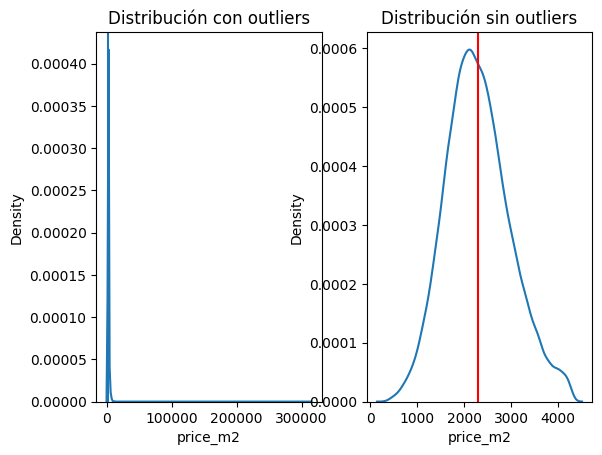

In [211]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

Como podemos ver, quitar estos outliers nos acerca el grafico a algo parecido a una distribución normal. Procederemos a borrar tanto los outliers superiores como inferiores.

In [212]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3372 registros en train
Se han eliminado: 656 registros en test


In [213]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 38 registros en train
Se han eliminado: 5 registros en test


#### LOF

In [214]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [215]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [216]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

##### Analisis de outliers para ambientes y habitaciones

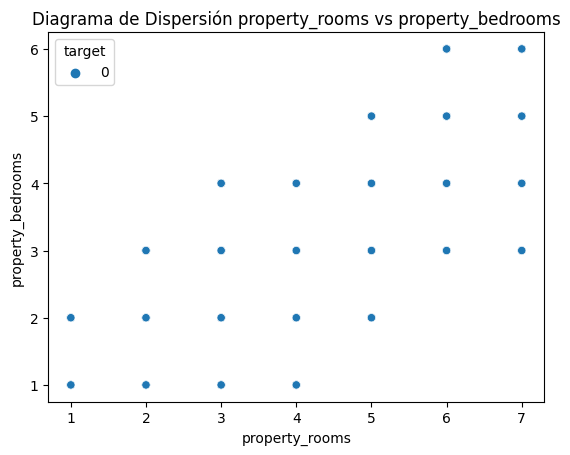

In [217]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [218]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date                      end_date  \
460026  2jfcV70r5M8iASKFbpFEqA== 2021-01-05 2021-06-24 00:00:00.000000000   
265093  HAVkMktdPRn+l4cTf6/h9A== 2021-11-19 2022-01-27 00:00:00.000000000   
446086  vEZ4YGWK+rLumCjMw8zfYA== 2021-01-14 2022-06-30 00:00:00.000000000   
326718  U3KiqS1NXWSS+2MHQ9uDAQ== 2021-01-31 2021-04-10 00:00:00.000000000   
228085  Q4FFDOnB7r5e7zO7Qb4riQ== 2021-02-12 2021-04-22 00:00:00.000000000   
...                          ...        ...                           ...   
329539  Y+YB6sK6DiNK6Gy6J+2pZQ== 2021-08-12 2021-09-03 00:00:00.000000000   
266128  Pli4FfIIoh6Qdj7p9XAnmQ== 2021-09-02 2021-09-08 00:00:00.000000000   
233765  bmc7dQkrPaXmVnMDaq9faw== 2021-03-20 2021-04-03 00:00:00.000000000   
217398  no6ultjhSAYSJshoy2j7Tg== 2021-09-04 2021-09-10 00:00:00.000000000   
39413   OIpP99thdf7HtTduVC1zyQ== 2021-07-30 2021-10-12 13:04:34.205937596   

          latitud   longitud       place_l3 property_type  property_rooms  \
460026 -34.571806 -58.479139  Villa Urquiza  Departamento             1.0   
265093 -34.587972 -58.422916        Palermo  Departamento             2.0   
446086 -34.583041 -58.434446        Palermo  Departamento             2.0   
326718 -34.572406 -58.430855        Palermo  Departamento             5.0   
228085 -34.592019 -58.396169       Recoleta  Departamento             7.0   
...           ...        ...            ...           ...             ...   
329539 -34.550262 -58.464381          Nuñez  Departamento             4.0   
266128 -34.616623 -58.416743        Almagro  Departamento             2.0   
233765 -34.626286 -58.398488  San Cristobal  Departamento             1.0   
217398 -34.550093 -58.483034       Saavedra  Departamento             2.0   
39413  -34.583152 -58.426634        Palermo  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
460026                1.0                    38.0                      32.0   
265093                1.0                    34.0                      34.0   
446086                1.0                   110.0                      70.0   
326718                3.0                   153.0                     153.0   
228085                3.0                   174.0                     159.0   
...                   ...                     ...                       ...   
329539                3.0                    85.0                      78.0   
266128                1.0                    36.0                      36.0   
233765                1.0                    32.0                      28.0   
217398                1.0                    44.0                      40.0   
39413                 1.0                    24.0                      24.0   

        property_price                                     property_title  \
460026         85000.0  Departamento monoambiente a estrenar con ampli...   
265093        122000.0                             Departamento - Palermo   
446086        295000.0                      Departamento LOFT CON TERRAZA   
326718        540000.0                         Departamento - Las Cañitas   
228085        555000.0    Muy Lindo y elegante departamento 3 dormitorios   
...                ...                                                ...   
329539        240000.0  VENTA CON RENTA hasta junio 2020 USD 240.000 3...   
266128         67500.0                         Departamento - Almagro Sur   
233765         74500.0     VENTA IMPECABLE DPTO. A ESTRENAR - APTO PROF.    
217398        114000.0     Venta Departamento 2 amb a Estrenar, Saavedra.   
39413          65000.0  Departamento 1 ambiente venta darragueira 2100...   

        target  scores  
460026       0    -1.0  
265093       0    -1.0  
446086       0    -1.0  
326718       0    -1.0  
228085       0    -1.0  
...        ...     ...  
329539       0    -1.0  
266128       0    -1.0  
233765       0    -1.0  
217398       0    -1.0  
39413        0    -1.0  

[6790

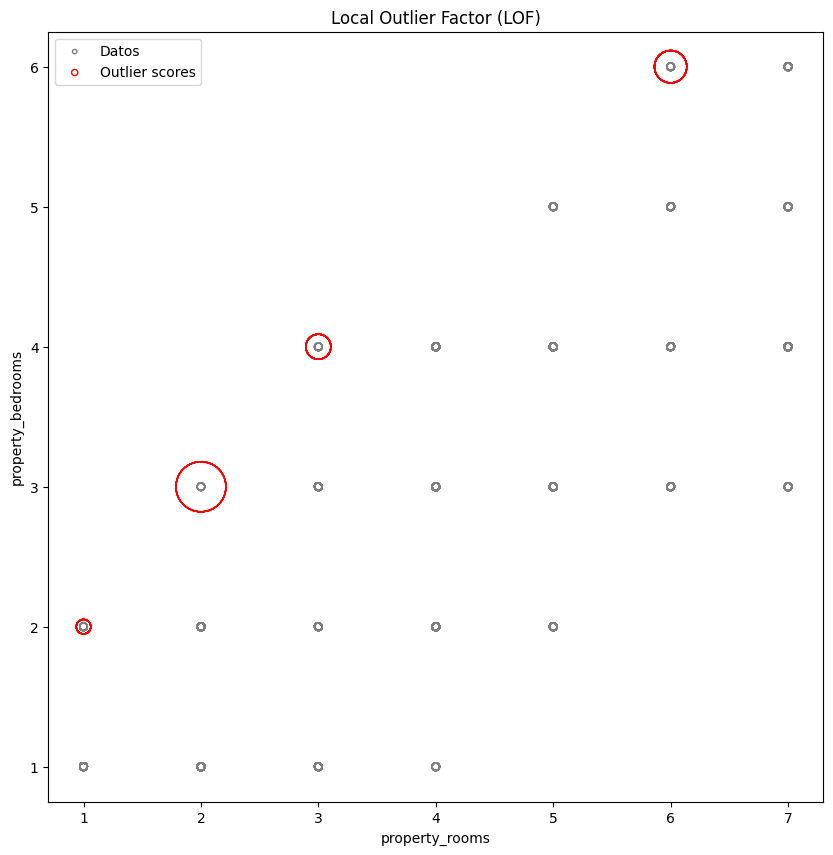

In [219]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

Como podemos observar, LOF parece estar marcandonos 3 outliers. Pareceria estar cumpliendo que un ambiente no puede ser mayor o igual al numero de habitaciones. No vimos un patro grande en el dataset que se rija bajo este criterio asi que en prinicpio no vamos a tomar accion al respecto. Lo grueso fue eliminado con mahalanobis.

##### Analisis de outliers para superficie total y superficie cubierta

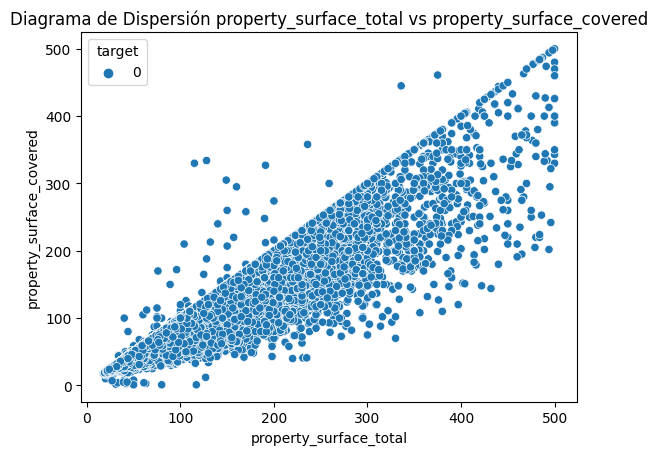

In [220]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [221]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date                      end_date  \
460026  2jfcV70r5M8iASKFbpFEqA== 2021-01-05 2021-06-24 00:00:00.000000000   
265093  HAVkMktdPRn+l4cTf6/h9A== 2021-11-19 2022-01-27 00:00:00.000000000   
446086  vEZ4YGWK+rLumCjMw8zfYA== 2021-01-14 2022-06-30 00:00:00.000000000   
326718  U3KiqS1NXWSS+2MHQ9uDAQ== 2021-01-31 2021-04-10 00:00:00.000000000   
228085  Q4FFDOnB7r5e7zO7Qb4riQ== 2021-02-12 2021-04-22 00:00:00.000000000   
...                          ...        ...                           ...   
329539  Y+YB6sK6DiNK6Gy6J+2pZQ== 2021-08-12 2021-09-03 00:00:00.000000000   
266128  Pli4FfIIoh6Qdj7p9XAnmQ== 2021-09-02 2021-09-08 00:00:00.000000000   
233765  bmc7dQkrPaXmVnMDaq9faw== 2021-03-20 2021-04-03 00:00:00.000000000   
217398  no6ultjhSAYSJshoy2j7Tg== 2021-09-04 2021-09-10 00:00:00.000000000   
39413   OIpP99thdf7HtTduVC1zyQ== 2021-07-30 2021-10-12 13:04:34.205937596   

          latitud   longitud       place_l3 property_type  property_rooms  \
460026 -34.571806 -58.479139  Villa Urquiza  Departamento             1.0   
265093 -34.587972 -58.422916        Palermo  Departamento             2.0   
446086 -34.583041 -58.434446        Palermo  Departamento             2.0   
326718 -34.572406 -58.430855        Palermo  Departamento             5.0   
228085 -34.592019 -58.396169       Recoleta  Departamento             7.0   
...           ...        ...            ...           ...             ...   
329539 -34.550262 -58.464381          Nuñez  Departamento             4.0   
266128 -34.616623 -58.416743        Almagro  Departamento             2.0   
233765 -34.626286 -58.398488  San Cristobal  Departamento             1.0   
217398 -34.550093 -58.483034       Saavedra  Departamento             2.0   
39413  -34.583152 -58.426634        Palermo  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
460026                1.0                    38.0                      32.0   
265093                1.0                    34.0                      34.0   
446086                1.0                   110.0                      70.0   
326718                3.0                   153.0                     153.0   
228085                3.0                   174.0                     159.0   
...                   ...                     ...                       ...   
329539                3.0                    85.0                      78.0   
266128                1.0                    36.0                      36.0   
233765                1.0                    32.0                      28.0   
217398                1.0                    44.0                      40.0   
39413                 1.0                    24.0                      24.0   

        property_price                                     property_title  \
460026         85000.0  Departamento monoambiente a estrenar con ampli...   
265093        122000.0                             Departamento - Palermo   
446086        295000.0                      Departamento LOFT CON TERRAZA   
326718        540000.0                         Departamento - Las Cañitas   
228085        555000.0    Muy Lindo y elegante departamento 3 dormitorios   
...                ...                                                ...   
329539        240000.0  VENTA CON RENTA hasta junio 2020 USD 240.000 3...   
266128         67500.0                         Departamento - Almagro Sur   
233765         74500.0     VENTA IMPECABLE DPTO. A ESTRENAR - APTO PROF.    
217398        114000.0     Venta Departamento 2 amb a Estrenar, Saavedra.   
39413          65000.0  Departamento 1 ambiente venta darragueira 2100...   

        target        scores  
460026       0 -1.000000e+00  
265093       0 -1.000000e+00  
446086       0 -9.950081e-01  
326718       0 -6.967514e+08  
228085       0 -9.770657e-01  
...        ...           ...  
329539       0 -1.000000e+00  
266128       0 -1.000000e+00  
233765       0 -1.000000e+0

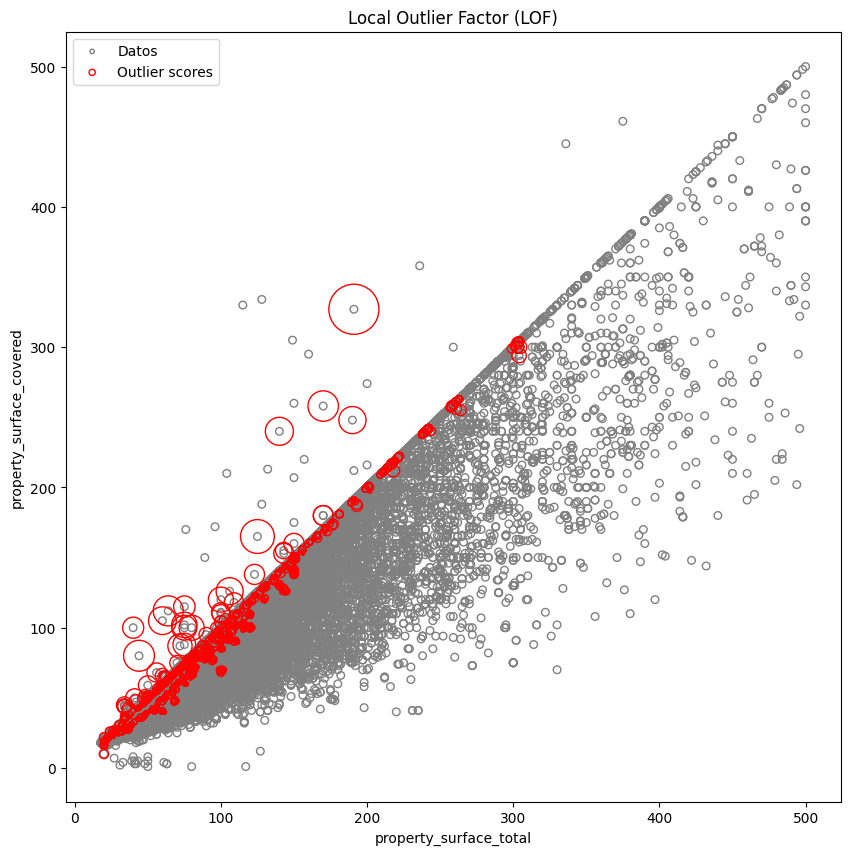

In [222]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

Como vemos en el grafico de LOF pareceria que la superifice total no puede ser exactamente igual a la superificie cubierta, por eso la deteccion de outiers a lo largo de la recta con pendiente creciente. Como no tenemos especificaciones tecnicas de cuantos metros menos deberia tener una superificie cubierta con respecto a la total, no vamos a tocar los datos.

#### Isolation Forest

##### Analisis de outliers para ambientes y habitaciones

Estos plots los hicimos meramente para probar el algoritmos de Isolation Forest pero no fue tomado en cuenta para tomar ninguna decision.

De hecho noatr que no se trabajaron el resto de las variables.

In [223]:
rooms_bedrooms_iforest = ds_train[['property_rooms', 'property_bedrooms']]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_rooms'].isna())]
rooms_bedrooms_iforest = rooms_bedrooms_iforest[~(rooms_bedrooms_iforest['property_bedrooms'].isna())]

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=2,
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(rooms_bedrooms_iforest)
#Almaceno scores y etiquetas
rooms_bedrooms_iforest['scores'] = iforest.decision_function(rooms_bedrooms_iforest)
rooms_bedrooms_iforest['outlier_label'] = pred

#Observaciones anómalas
rooms_bedrooms_iforest[rooms_bedrooms_iforest.outlier_label == -1]

property_rooms  property_bedrooms    scores  outlier_label
228085             7.0                3.0 -0.135445             -1
334861             4.0                2.0 -0.038990             -1
172919             6.0                5.0 -0.146597             -1
268795             4.0                2.0 -0.038990             -1
279664             4.0                2.0 -0.038990             -1
...                ...                ...       ...            ...
236006             6.0                4.0 -0.080596             -1
96649              6.0                5.0 -0.146597             -1
82068              6.0                5.0 -0.146597             -1
256802             6.0                4.0 -0.080596             -1
209916             4.0                2.0 -0.038990             -1

[3195 rows x 4 columns]

In [224]:
rooms_bedrooms_iforest.outlier_label.value_counts()

 1    64711
-1     3195
Name: outlier_label, dtype: int64

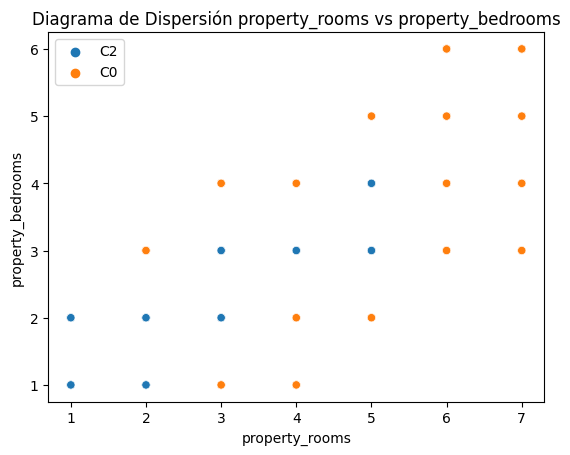

In [225]:
#Grafico dispersograma
color = [f"C{n + 1}" for n in (rooms_bedrooms_iforest['outlier_label'].values)]

sns.scatterplot(x=rooms_bedrooms_iforest['property_rooms'], y=rooms_bedrooms_iforest['property_bedrooms'], hue=color)
plt.title('Diagrama de Dispersión property_rooms vs property_bedrooms')
plt.show()

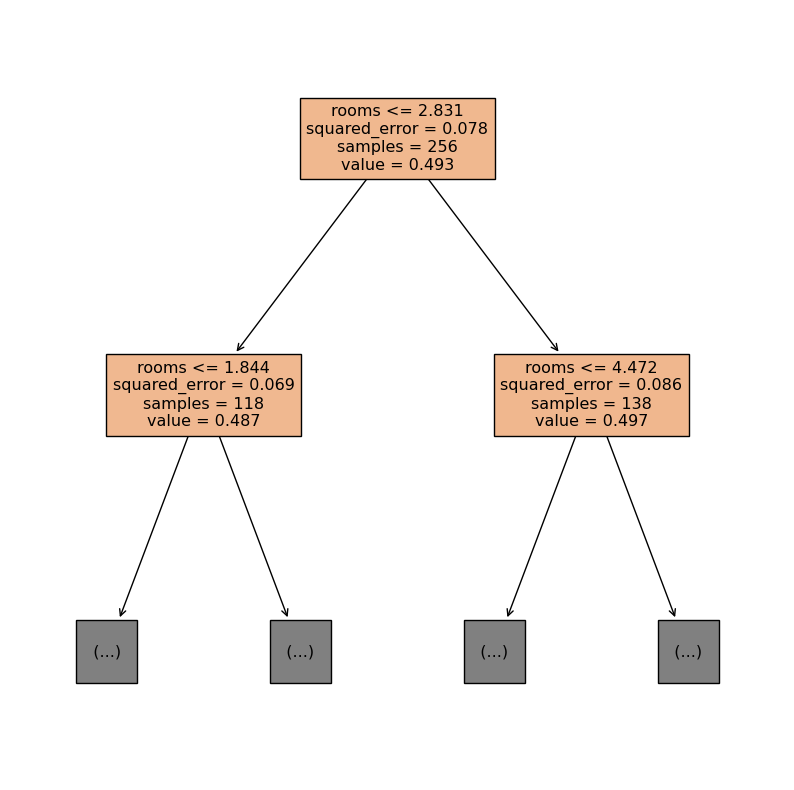

In [226]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['rooms', 'bedrooms'], filled=True, max_depth=1)
plt.show()

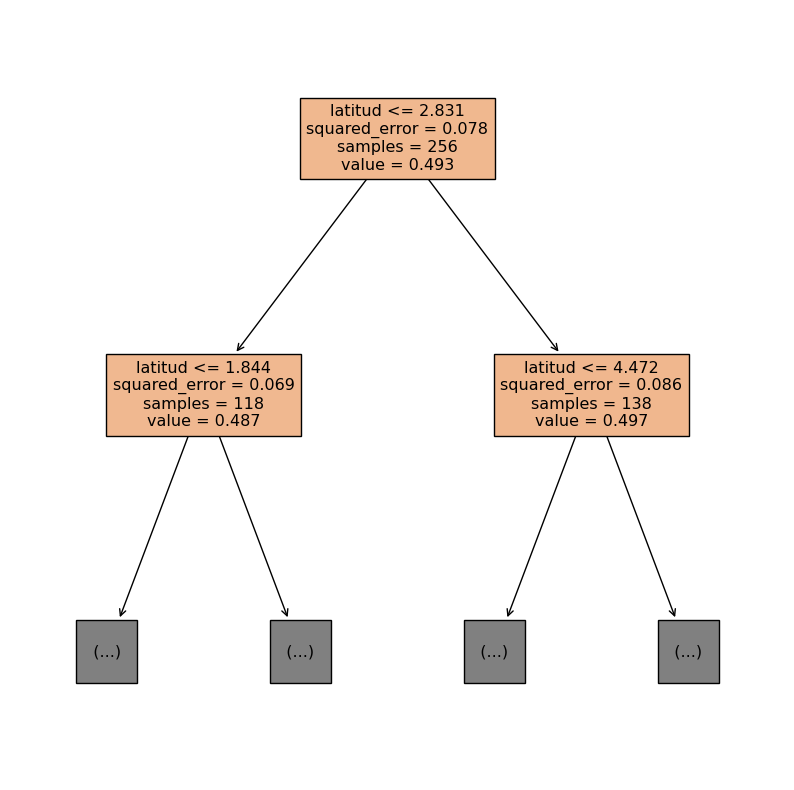

In [227]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(10, 10))
sk.tree.plot_tree(estimator, feature_names=['latitud', 'longitud'], filled=True, max_depth=1)
plt.show()

Habiendo hecho el análisis de valores atípicos y las imputaciones necesarias, finalmente eliminamos la columna id que usamos para hacer algunos merges.

In [228]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

## Reduccion de la Dimensionalidad

### Analisis PCA

Para poder realizar el análisis PCA del dataset es necesario que todos los campos sean numéricos.
Vamos a deshacernos de las siguientes columnas:
- ID: no aporta información
- Fechas y título: no pueden adaptarse a un formato numérico
- place_l3: es información redundante cuando tenemos latitud y longitud.
- property_price: es la variable que queremos predecir


In [229]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
460026 -34.571806 -58.479139             1.0                1.0   
265093 -34.587972 -58.422916             2.0                1.0   
446086 -34.583041 -58.434446             2.0                1.0   
326718 -34.572406 -58.430855             5.0                3.0   
228085 -34.592019 -58.396169             7.0                3.0   
...           ...        ...             ...                ...   
329539 -34.550262 -58.464381             4.0                3.0   
266128 -34.616623 -58.416743             2.0                1.0   
233765 -34.626286 -58.398488             1.0                1.0   
217398 -34.550093 -58.483034             2.0                1.0   
39413  -34.583152 -58.426634             1.0                1.0   

        property_surface_total  property_surface_covered  
460026                    38.0                      32.0  
265093                    34.0                      34.0  
446086                   110.0                      70.0  
326718                   153.0                     153.0  
228085                   174.0                     159.0  
...                        ...                       ...  
329539                    85.0                      78.0  
266128                    36.0                      36.0  
233765                    32.0                      28.0  
217398                    44.0                      40.0  
39413                     24.0                      24.0  

[67906 rows x 6 columns]

In [230]:
ds_reducido.shape

(67906, 6)

Procedemos ahora a normalizar las columnas del dataframe

In [231]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0      0.926555 -1.124775       -1.389530          -0.885714   
1      0.271136  0.425437       -0.580178          -0.885714   
2      0.471053  0.107535       -0.580178          -0.885714   
3      0.902210  0.206532        1.847875           1.245926   
4      0.107053  1.162923        3.466577           1.245926   
...         ...       ...             ...                ...   
67901  1.799990 -0.717854        1.038524           1.245926   
67902 -0.890419  0.595652       -0.580178          -0.885714   
67903 -1.282172  1.098988       -1.389530          -0.885714   
67904  1.806837 -1.232176       -0.580178          -0.885714   
67905  0.466553  0.322919       -1.389530          -0.885714   

       property_surface_total  property_surface_covered  
0                   -0.721542                 -0.773873  
1                   -0.787256                 -0.734150  
2                    0.461301                 -0.019124  
3                    1.167721                  1.629406  
4                    1.512717                  1.748577  
...                       ...                       ...  
67901                0.050592                  0.139770  
67902               -0.754399                 -0.694426  
67903               -0.820112                 -0.853321  
67904               -0.622972                 -0.614979  
67905               -0.951539                 -0.932768  

[67906 rows x 6 columns]

#### Replicamos para test las mismas transformaciones

In [232]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
323083 -34.620798 -58.374797             2.0                1.0   
451237 -34.570861 -58.441459             1.0                1.0   
232084 -34.601351 -58.373537             4.0                3.0   
196651 -34.574114 -58.500583             2.0                1.0   
117920 -34.578137 -58.446272             2.0                1.0   
...           ...        ...             ...                ...   
93285  -34.584996 -58.464395             1.0                1.0   
26185  -34.603831 -58.395504             2.0                1.0   
398175 -34.555143 -58.451017             2.0                1.0   
186264 -34.604309 -58.456555             1.0                1.0   
365087 -34.605837 -58.424687             2.0                1.0   

        property_surface_total  property_surface_covered  
323083                    55.0                      55.0  
451237                    35.0                      32.0  
232084                   250.0                     125.0  
196651                    65.0                      45.0  
117920                   117.0                      90.0  
...                        ...                       ...  
93285                     44.0                      40.0  
26185                     62.0                      62.0  
398175                    40.0                      35.0  
186264                    30.0                      27.0  
365087                    37.0                      37.0  

[14282 rows x 6 columns]

In [233]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test), columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.211908  1.824259       -0.557364          -0.871634   
1      0.879614 -0.246420       -1.378348          -0.871634   
2     -0.397404  1.863390        1.084606           1.284728   
3      0.743386 -2.082979       -0.557364          -0.871634   
4      0.574894 -0.395921       -0.557364          -0.871634   
...         ...       ...             ...                ...   
14277  0.287585 -0.958877       -1.378348          -0.871634   
14278 -0.501260  1.181050       -0.557364          -0.871634   
14279  1.537936 -0.543324       -0.557364          -0.871634   
14280 -0.521280 -0.715342       -1.378348          -0.871634   
14281 -0.585294  0.274555       -0.557364          -0.871634   

       property_surface_total  property_surface_covered  
0                   -0.425896                 -0.297887  
1                   -0.768930                 -0.777509  
2                    2.918680                  1.161833  
3                   -0.254380                 -0.506418  
4                    0.637507                  0.431973  
...                       ...                       ...  
14277               -0.614565                 -0.610684  
14278               -0.305835                 -0.151915  
14279               -0.683171                 -0.714949  
14280               -0.854688                 -0.881774  
14281               -0.734626                 -0.673243  

[14282 rows x 6 columns]

Armamos ahora la matriz de correlación del dataset normalizado

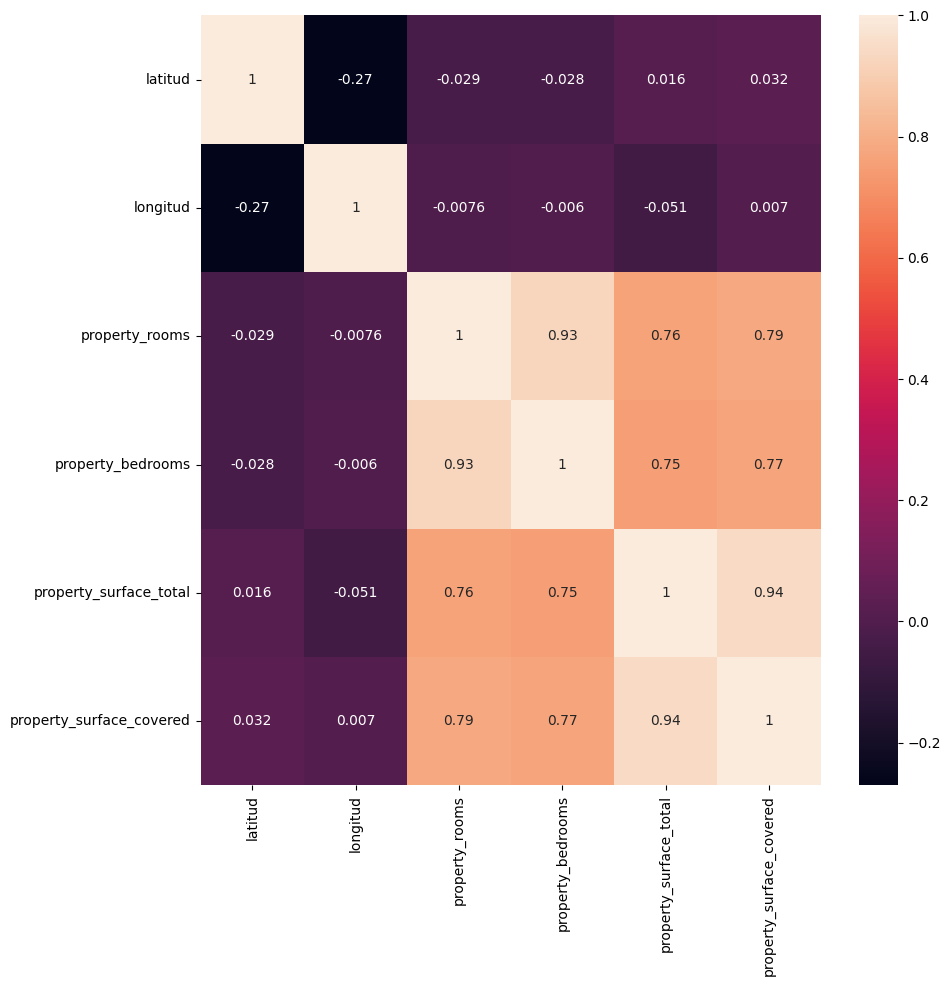

In [234]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

Como era de esperarse, podemos ver que existe una correlación muy fuerte entre property_surface_total y property_surface_covered y entre property_rooms y property_bedrooms

Ahora si comenzamos con PCA y calculamos las componentes principales, elegimos el mismo número de variables que en el dataframe anterior

In [235]:
ds_reducido_normalizado.shape

(67906, 6)

In [236]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.872944 -1.484465  0.133753  0.311775 -0.362255  0.022942
1     -1.497725  0.098307 -0.478710 -0.048267  0.223296  0.012493
2     -0.511264 -0.320374 -0.457980  0.928442  0.182285 -0.314177
3      2.944811 -0.455694 -0.807148 -0.242835  0.426456  0.265062
4      3.977143  0.816741 -0.882000 -0.710871  1.584164  0.040048
...         ...       ...       ...       ...       ...       ...
67901  1.241526 -1.709915 -0.684773 -1.209191 -0.109389 -0.003898
67902 -1.462729  1.038054  0.210976  0.092642  0.219057  0.043306
67903 -1.986666  1.648823  0.113987  0.396949 -0.362585 -0.016412
67904 -1.337409 -2.162950 -0.391750 -0.025774  0.220154  0.026234
67905 -2.084136 -0.129018 -0.554482  0.139477 -0.354277  0.005353

[67906 rows x 6 columns]

In [237]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.21
0.12
0.07
0.01
0.01


In [238]:
varianza_explicada.cumsum()

array([0.5781376 , 0.79036287, 0.91259133, 0.97887129, 0.99107582,
       1.        ])

Podemos ver que con 3 componentes llegamos a un 91% de la varianza, trataremos de ver esto en un gráfico

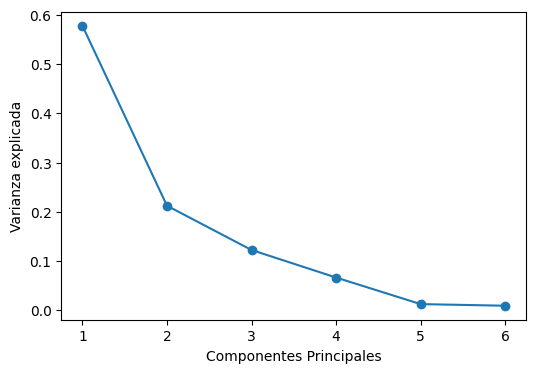

In [239]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

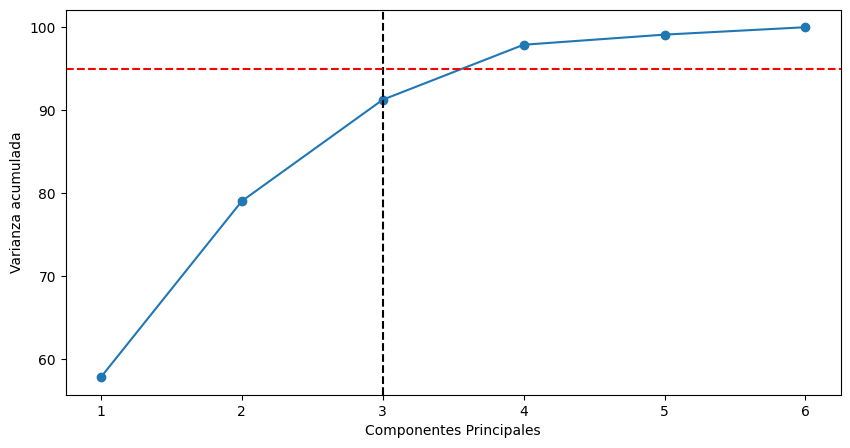

In [240]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

Con 3 componentes logramos explicar más del 90% de la varianza, por lo que nos quedaremos con esta reducción.

In [241]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.872944 -1.484465  0.133753
1 -1.497725  0.098307 -0.478710
2 -0.511264 -0.320374 -0.457980
3  2.944811 -0.455694 -0.807148
4  3.977143  0.816741 -0.882000

## Agrupamiento

Importamos librerías de agrupamiento.

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pyclustertend import hopkins

ModuleNotFoundError: No module named 'yellowbrick'

Para el analisis de agrupamiento incorporaremos el precio

In [243]:
ds_agrupamiento = ds_reducido.copy()
ds_agrupamiento['property_price'] = ds_train.property_price
ds_agrupamiento

latitud   longitud  property_rooms  property_bedrooms  \
460026 -34.571806 -58.479139             1.0                1.0   
265093 -34.587972 -58.422916             2.0                1.0   
446086 -34.583041 -58.434446             2.0                1.0   
326718 -34.572406 -58.430855             5.0                3.0   
228085 -34.592019 -58.396169             7.0                3.0   
...           ...        ...             ...                ...   
329539 -34.550262 -58.464381             4.0                3.0   
266128 -34.616623 -58.416743             2.0                1.0   
233765 -34.626286 -58.398488             1.0                1.0   
217398 -34.550093 -58.483034             2.0                1.0   
39413  -34.583152 -58.426634             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  
460026                    38.0                      32.0         85000.0  
265093                    34.0                      34.0        122000.0  
446086                   110.0                      70.0        295000.0  
326718                   153.0                     153.0        540000.0  
228085                   174.0                     159.0        555000.0  
...                        ...                       ...             ...  
329539                    85.0                      78.0        240000.0  
266128                    36.0                      36.0         67500.0  
233765                    32.0                      28.0         74500.0  
217398                    44.0                      40.0        114000.0  
39413                     24.0                      24.0         65000.0  

[67906 rows x 7 columns]

In [ ]:
sns.pairplot(ds_agrupamiento, diag_kind='kde');

In [ ]:
hopkins(ds_agrupamiento, ds_agrupamiento.shape[0])

Para la estadística de Hopkins, un valor cercano a cero indica que la distribución es bastante uniforme y que hay poca tendencia al clustering.

Si bien es dificil identificar agrupamientos en estos gráficos, probaremos buscarlos mediante el uso de KMeans

#### Método de Elbow

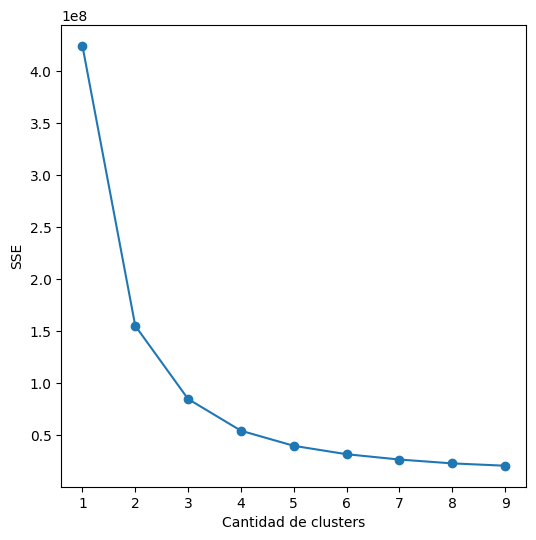

In [244]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_reducido)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos ver que para 2 o 3 clusters la pendiente cambia de forma bastante significativa. Probaremos predicciones con KMeans para esas cantidades.

#### KMeans

In [245]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(ds_reducido)

y_2_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [246]:
y_2_clusters.value_counts()

0    58844
1     9062
Name: clusters, dtype: int64

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_2_clusters], axis=1), hue='clusters');

In [247]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(ds_reducido)

y_3_clusters = pd.Series(kmeans.predict(ds_reducido), name='clusters', index=ds_reducido.index)

In [ ]:
sns.pairplot(pd.concat([ds_agrupamiento, y_3_clusters], axis=1), hue='clusters');

Podemos ver como en varios de los graficos los datos se agrupan de la misma manera convirtiéndose en más caros a medida que crecen principialmente los ambientes y los metros cuadrados (superficie total y cubierta).

### Analisis de Silhouette

Realizaremos un analisis de Silhouette para evaluar la calidad de los clusters.

In [248]:
list_k = list(range(2, 5))
sse = []

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_agrupamiento)
    score = silhouette_score(ds_agrupamiento, preds)
    print(f"Para {n_clusters} el puntaje de Silhouette es " + str(score))

Para 2 el puntaje de Silhouette es 0.7434651810593113
Para 3 el puntaje de Silhouette es 0.6570675565752805
Para 4 el puntaje de Silhouette es 0.6024214135122494


El mejor puntaje es el de 2 clusters. Cuanto más cerca de 1 mayor tendencia a agruparse. Evaluaremos la calidad de los clusters mediante el gráfico de silueta

#### Para 2 clusters

In [ ]:
model = KMeans(2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_2_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

#### Para 3 clusters

In [ ]:
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')  # Instancio el visualizador
visualizer.fit(ds_agrupamiento)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=y_3_clusters)

ax.set(title='Avisos en CABA segun tipo de propiedad')
plt.show()

Luego de analizar los datos, vemos que en este dominio de problema se forman tres clusters a partir de la relacion de los ambientes y las habitaciones y la superifice total y cubierta. Es decir, vemos que se forman grupos con un precio acorde a a la cantidad de metros cuadrados que tenga la vivienda y a su vez, los metros cuadrados van a tener una estrecha correlacion con los metros cuadrados. Por ejemplo, dentro de un cluster podriamos encontrar un 2 ambientes con una habitacion de 70 metros cuadrados vendiendose a 70 usd.

## Clasificación

In [249]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train)
pxm2.describe()

count    67906.000000
mean      2292.222879
std        686.682252
min        365.853659
25%       1813.953488
50%       2243.589744
75%       2722.222222
max       4285.714286
dtype: float64

Definiremos la variable tipo_precio con 3 valores posibles, alto, medio y bajo.

#### Primera variable (33% bajo, 33% medio, 33% alto)

La primera clasificación tiene que tener la misma cantidad de registros en las 3 diferentes categorias

In [250]:
def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = pxm2
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def imprimir_limites(dataset, categoria):
    valores_bajos = dataset[dataset[categoria]== 'Bajo']
    valores_medios = dataset[dataset[categoria] == 'Medio']
    valores_altos = dataset[dataset[categoria] == 'Alto']
    print(f'Minimo bajo: {valores_bajos.pxm2.min()}, Maximo bajo: {valores_bajos.pxm2.max()}')
    print(f'Minimo medio: {valores_medios.pxm2.min()}, Maximo medio: {valores_medios.pxm2.max()}')
    print(f'Minimo alto: {valores_altos.pxm2.min()}, Maximo alto: {valores_altos.pxm2.max()}')

In [251]:
ds_train['pxm2'] = pxm2
categoria = []
for i in range(0, len(sorted_pxm2) // 3):
    categoria.append('Bajo')
for i in range(len(sorted_pxm2) // 3, 2 * len(sorted_pxm2) // 3):
    categoria.append('Medio')
for i in range(2 * len(sorted_pxm2) // 3, len(sorted_pxm2)):
    categoria.append('Alto')

ds_train = agregar_variable(ds_train, categoria, 'clasificacion_1', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de la categoria 1'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

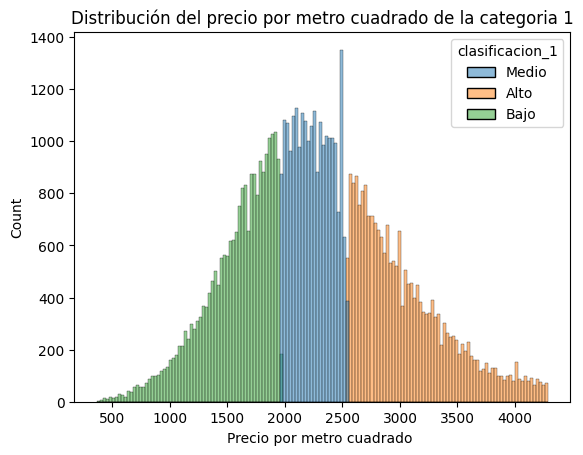

In [252]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_1, bins=150).set(title='Distribución del precio por metro cuadrado de la categoria 1', xlabel='Precio por metro cuadrado ')

In [253]:
ds_train.clasificacion_1.value_counts()

Alto     22636
Medio    22635
Bajo     22635
Name: clasificacion_1, dtype: int64

In [254]:
imprimir_limites(ds_train,'clasificacion_1')

Minimo bajo: 365.8536585365854, Maximo bajo: 1964.909090909091
Minimo medio: 1964.909090909091, Maximo medio: 2545.4545454545455
Minimo alto: 2545.4545454545455, Maximo alto: 4285.714285714285


#### Segunda variable (25% bajo, 50% medio, 25% alto)

In [255]:
def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

In [256]:
categoria = separar_25_50_25(ds_train)
ds_train = agregar_variable(ds_train, categoria, 'clasificacion_2', pxm2, sorted_pxm2)

[Text(0.5, 1.0, 'Distribución de las categorías en relación al precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado'),
 Text(0, 0.5, 'Cantidad')]

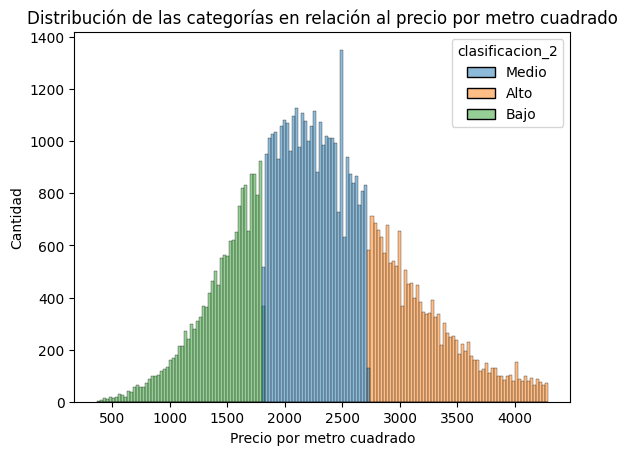

In [257]:
sns.histplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_2, bins=150).set(title='Distribución de las categorías en relación al precio por metro cuadrado', xlabel='Precio por metro cuadrado', ylabel='Cantidad')

In [258]:
ds_train.clasificacion_2.value_counts()

Medio    33953
Alto     16977
Bajo     16976
Name: clasificacion_2, dtype: int64

In [259]:
imprimir_limites(ds_train, 'clasificacion_2')

Minimo bajo: 365.8536585365854, Maximo bajo: 1813.8909090909092
Minimo medio: 1813.953488372093, Maximo medio: 2722.222222222222
Minimo alto: 2722.222222222222, Maximo alto: 4285.714285714285


#### Tercera variable (25-50-25 por tipo de propiedad)

##### Casas

In [260]:
casas = ds_train[ds_train.property_type == 'Casa'].copy()
dptos = ds_train[ds_train.property_type == 'Departamento'].copy()
phs = ds_train[ds_train.property_type == 'PH'].copy()

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

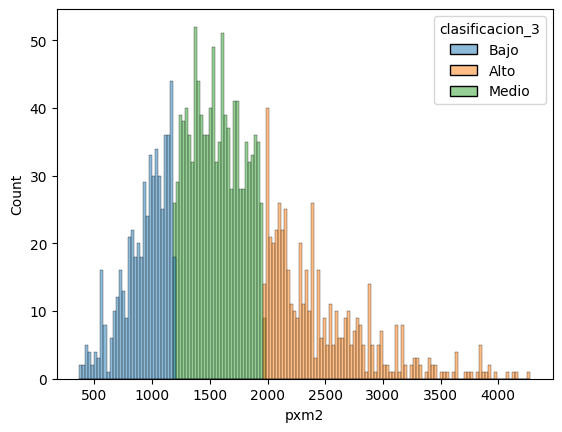

In [261]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=casas, x=casas.pxm2, hue=casas.clasificacion_3, bins=150)

##### Departamentos

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

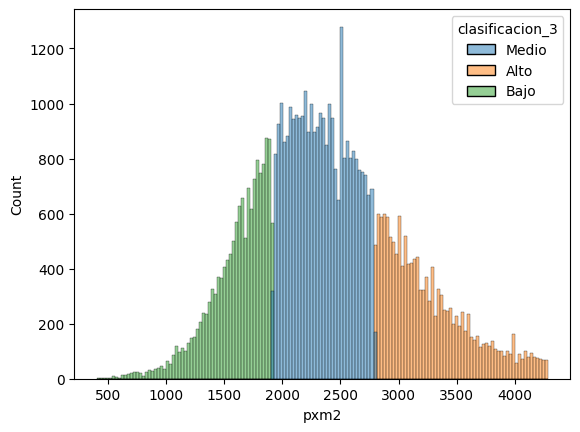

In [262]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de departamentos'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

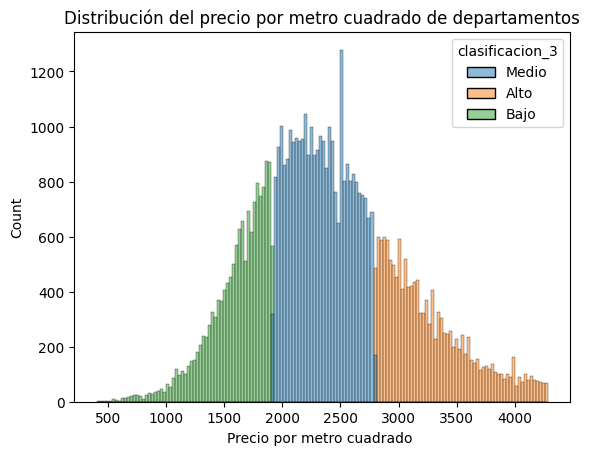

In [263]:
sns.histplot(data=dptos, x=dptos.pxm2, hue=dptos.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de departamentos', xlabel='Precio por metro cuadrado ')

##### PH

<AxesSubplot: xlabel='pxm2', ylabel='Count'>

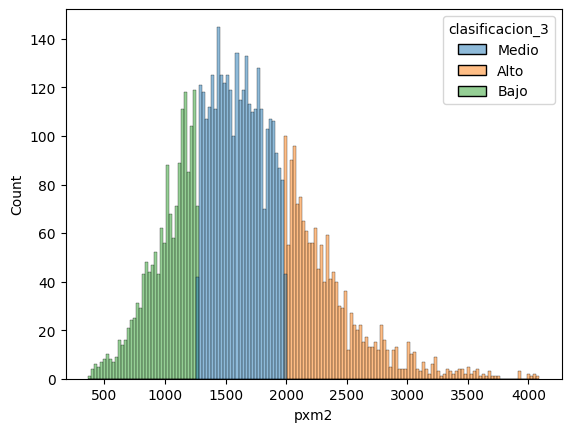

In [264]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'clasificacion_3', pxm2, sorted_pxm2)
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de Phs'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

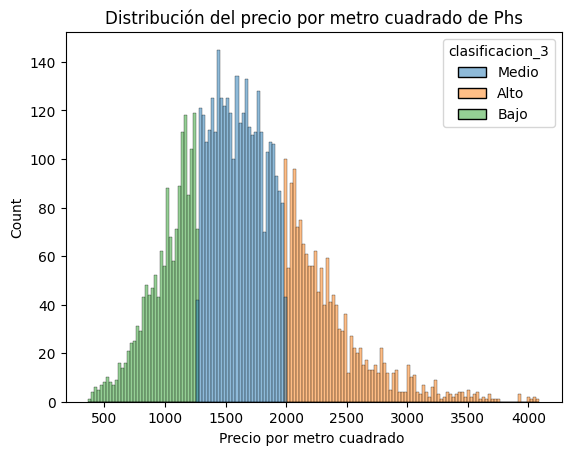

In [265]:
sns.histplot(data=phs, x=phs.pxm2, hue=phs.clasificacion_3, bins=150).set(title='Distribución del precio por metro cuadrado de Phs', xlabel='Precio por metro cuadrado ')

##### Union de las 3 al dataset

In [266]:
nueva_categoria = pd.concat([casas,dptos, phs])
ds_train['clasificacion_3'] = nueva_categoria['clasificacion_3']

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de toda propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado ')]

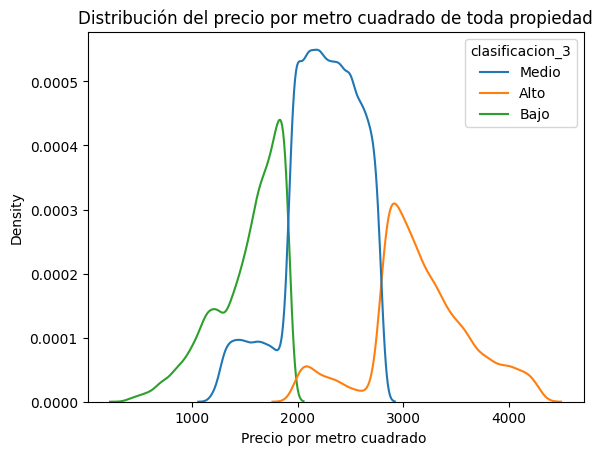

In [267]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.clasificacion_3).set(title='Distribución del precio por metro cuadrado de toda propiedad', xlabel='Precio por metro cuadrado ')

In [268]:
ds_train.clasificacion_3.value_counts()

Medio    33953
Alto     16977
Bajo     16976
Name: clasificacion_3, dtype: int64

##### Distribución del precio por metro cuadrado

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado'),
 Text(0.5, 0, 'Precio por metro cuadrado de departamentos')]

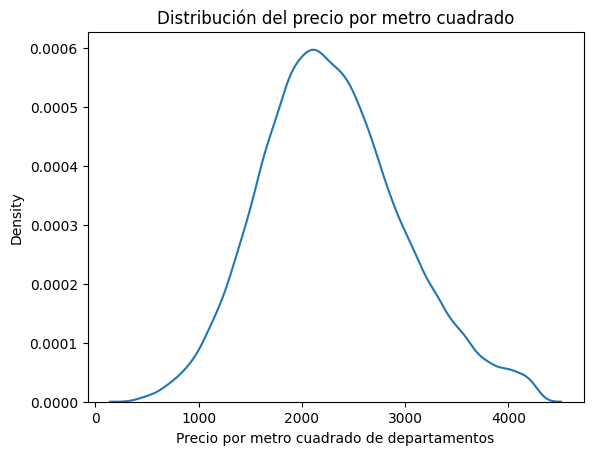

In [269]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2).set(title='Distribución del precio por metro cuadrado', xlabel='Precio por metro cuadrado de departamentos')

##### Distribución del precio por metro cuadrado por tipo de propiedad

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado de cada tipo de propiedad'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

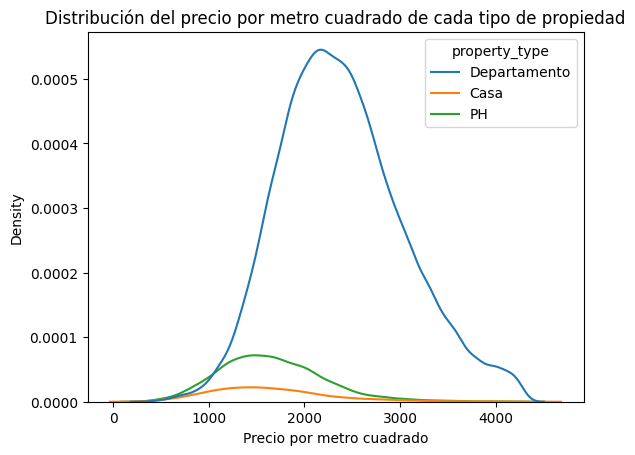

In [270]:
sns.kdeplot(data=ds_train, x=ds_train.pxm2, hue=ds_train.property_type).set(title='Distribución del precio por metro cuadrado de cada tipo de propiedad', xlabel='Precio por metro cuadrado')

#### Conclusión

Viendo como el precio por metro cuadrado de departamentos es mayor al de casas y phs tiene sentido el tomar la tercera variable por sobre las otras 2. Ya que caso contrario la categorización de las casas y phs se vería contaminada por el de los departamentos, ya que algunos casos de casas que serían caras por si mismas terminan siendo de precio medio ya que el mismo número para los
departamentos no es caro.

In [271]:
ds_train.drop(axis=1, columns=['clasificacion_1', 'clasificacion_2'], inplace=True)
ds_train.rename(columns= {'clasificacion_3':'tipo_precio'}, inplace=True)

#### Construccion de la variable en Test

In [272]:
ds_test['pxm2'] = ds_test['property_price'] / ds_test['property_surface_total']

In [273]:
lista_tipo_precio_test = []
for registro in ds_test.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['clasificacion_3'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['clasificacion_3'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [274]:
len(lista_tipo_precio_test)

14282

In [275]:
len(ds_test)

14282

In [276]:
ds_test['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test.index)

[Text(0.5, 1.0, 'Distribución del precio por metro cuadrado en el dataset de testeo'),
 Text(0.5, 0, 'Precio por metro cuadrado')]

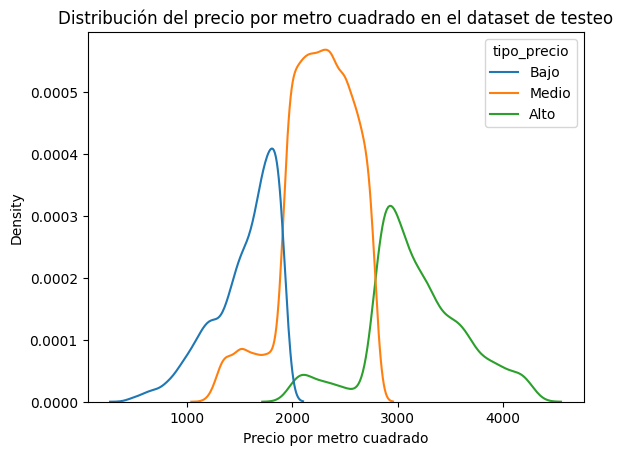

In [277]:
sns.kdeplot(data=ds_test, x=ds_test.pxm2, hue=ds_test.tipo_precio).set(title='Distribución del precio por metro cuadrado en el dataset de testeo', xlabel='Precio por metro cuadrado')

#### Comparación con los resultados de Kmeans

In [278]:
copia_3_clusters = y_3_clusters.copy()
copia_3_clusters.replace(to_replace=0, value='Medio', inplace= True)
copia_3_clusters.replace(to_replace=1, value='Bajo', inplace= True)
copia_3_clusters.replace(to_replace=2, value='Alto', inplace= True)
ds_comparacion = pd.concat([ds_train, copia_3_clusters], axis=1)
print(f"Porcentaje de semejanza de clusters: {round(len(np.where(ds_comparacion.tipo_precio == ds_comparacion.clusters)[0]) / len(ds_comparacion) * 100, 2)} %")

Porcentaje de semejanza de clusters: 45.61 %


In [279]:
y_3_clusters.value_counts()

0    49592
1    14875
2     3439
Name: clusters, dtype: int64

Vemos que el porcentaje no parece ser lo suficientemente alto (Tomando el cluster más chico como el 'Alto', el más grande como el 'Medio' y como bajo el tercero, siendo esta la combinación que mejor porcentaje de semejanza da con 45,9 %) como para intuir que están relacionados los clusters.
Vamos a recrear uno de los gráficos hechos arriba de precio total contra superficie esta vez coloreando la clasificación de precio en vez a ver si los graficos se parecen.

[Text(0.5, 1.0, 'Analisis del tipo de precio en relacion al precio total y la superficie'),
 Text(0.5, 0, 'Superficie total'),
 Text(0, 0.5, 'Precio de la propiedad')]

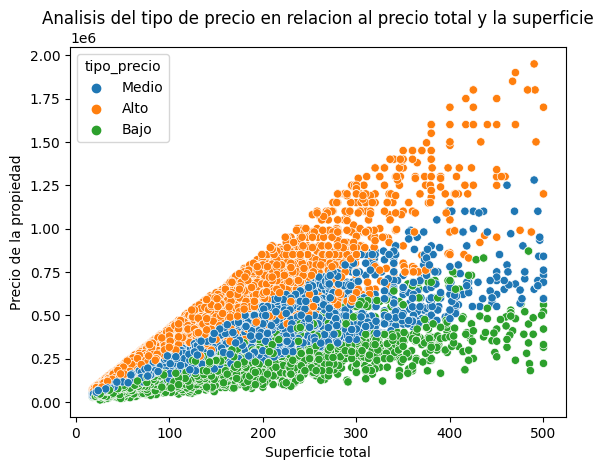

In [280]:
sns.scatterplot(data=ds_train, x=ds_train.property_surface_total, y=ds_train.property_price, hue=ds_train.tipo_precio).set(title='Analisis del tipo de precio en relacion al precio total y la superficie', xlabel='Superficie total', ylabel= 'Precio de la propiedad')

En efecto comparando el gráfico de tipo_precio con el de clusters de superficie total contra precio vemos que se tratan de 2 clasificaciones diferentes

NameError: name 'barrios' is not defined

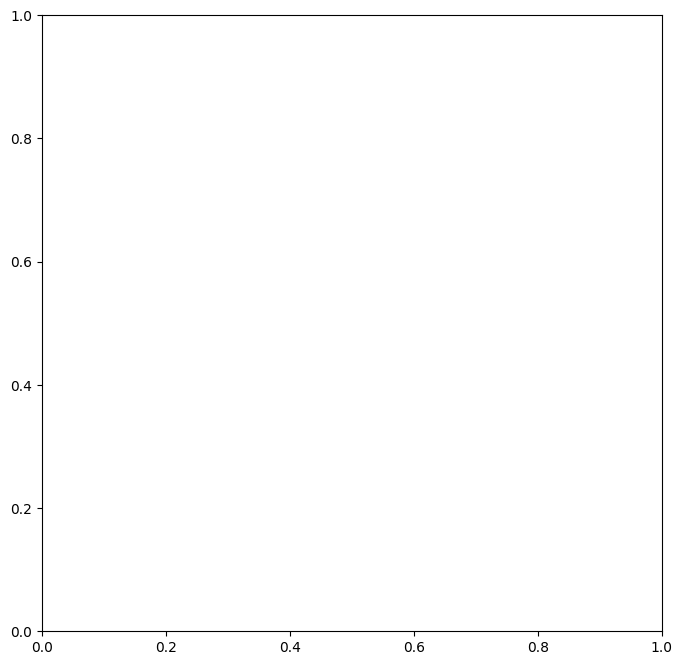

In [281]:
fig, ax = plt.subplots(figsize=(8, 8))
barrios.plot(ax=ax, color='Grey')
sns.scatterplot(ax=ax, data=ds_train, x='longitud', y='latitud', hue=ds_train['tipo_precio'])

ax.set(title='Avisos en CABA segun tipo_precio')
plt.show()

## Arbol de Decision - Clasificacion

En esta etapa, a la hora de crear el dataset con el cual vamos a predecir, tenemos que asegurarnos de borrar todas las variables que tengan una implicancia con el precio.

Factorizamos el tipo de precio para que pueda ser una variable numerica y podamos entrenar el modelo. 
No optamos por usar one hot encoding ya que sino tendriamos 3 variables de target y es muy dificil predecir y mantener todos esos valores.

In [282]:
#Creo un dataset con los features que voy a usar para clasificar
ds_train_x = ds_train.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'pxm2', 'tipo_precio'], axis=1)

#Creo un dataset con la variable target
ds_train_y = pd.Series(pd.factorize(ds_train.tipo_precio)[0], index=ds_train.index)

#Genero los conjuntos de train y de test (proporcion 80/20)
x_train, x_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=2) #semilla


In [283]:
#Creamos un clasificador
tree_model = tree.DecisionTreeClassifier()

#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [284]:
#Obtenemos la maxima profundidad del arbol para luego evaluar hiperparametros
tree_model.get_depth()

46

In [285]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)

In [286]:
#Valores Predichos
y_pred

array([0, 0, 2, ..., 1, 2, 1])

In [287]:
#Valores Reales
y_test.values

array([0, 0, 2, ..., 1, 2, 1])

In [288]:
#Probamos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test, y_pred),columns=['test','pred'])
ds_resultados.head()

test  pred
0     0     0
1     0     0
2     2     2
3     0     0
4     0     0

Text(50.722222222222214, 0.5, 'True')

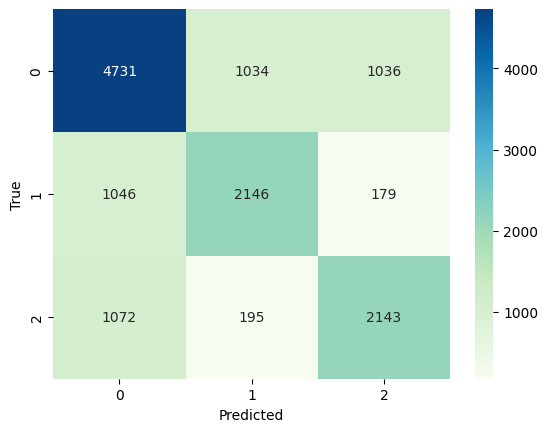

In [289]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [290]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      6801
           1       0.64      0.64      0.64      3371
           2       0.64      0.63      0.63      3410

    accuracy                           0.66     13582
   macro avg       0.65      0.65      0.65     13582
weighted avg       0.66      0.66      0.66     13582



In [291]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)

In [292]:
#Calculo las métricas en el conjunto de train
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27152
           1       0.99      0.96      0.97     13606
           2       0.99      0.96      0.97     13566

    accuracy                           0.97     54324
   macro avg       0.98      0.97      0.97     54324
weighted avg       0.98      0.97      0.97     54324



Como podemos observar, el conjunto de datos esta overfitteando. Mas adelante buscaremos mejores hiper parametros y podaremos el arbol para obtener mejores resultados y para poder cortar este overfitting.

In [293]:
model.classes_

array([0, 1, 2])

#### Grafico del arbol de decision

Realizamos un grafico del arbol entero, es decir, el arbol que venimos previamente analizado no sufrio ninguna modificacion ni ningun recorte. A partir de este arbol base vamos a tratar de buscar mejores resultados. Primero vemos un grafico para ver como luce el arbol. Elegimos un max_depth = 2 para mostrar una porcion representativa ya que el arbol es muy grande.

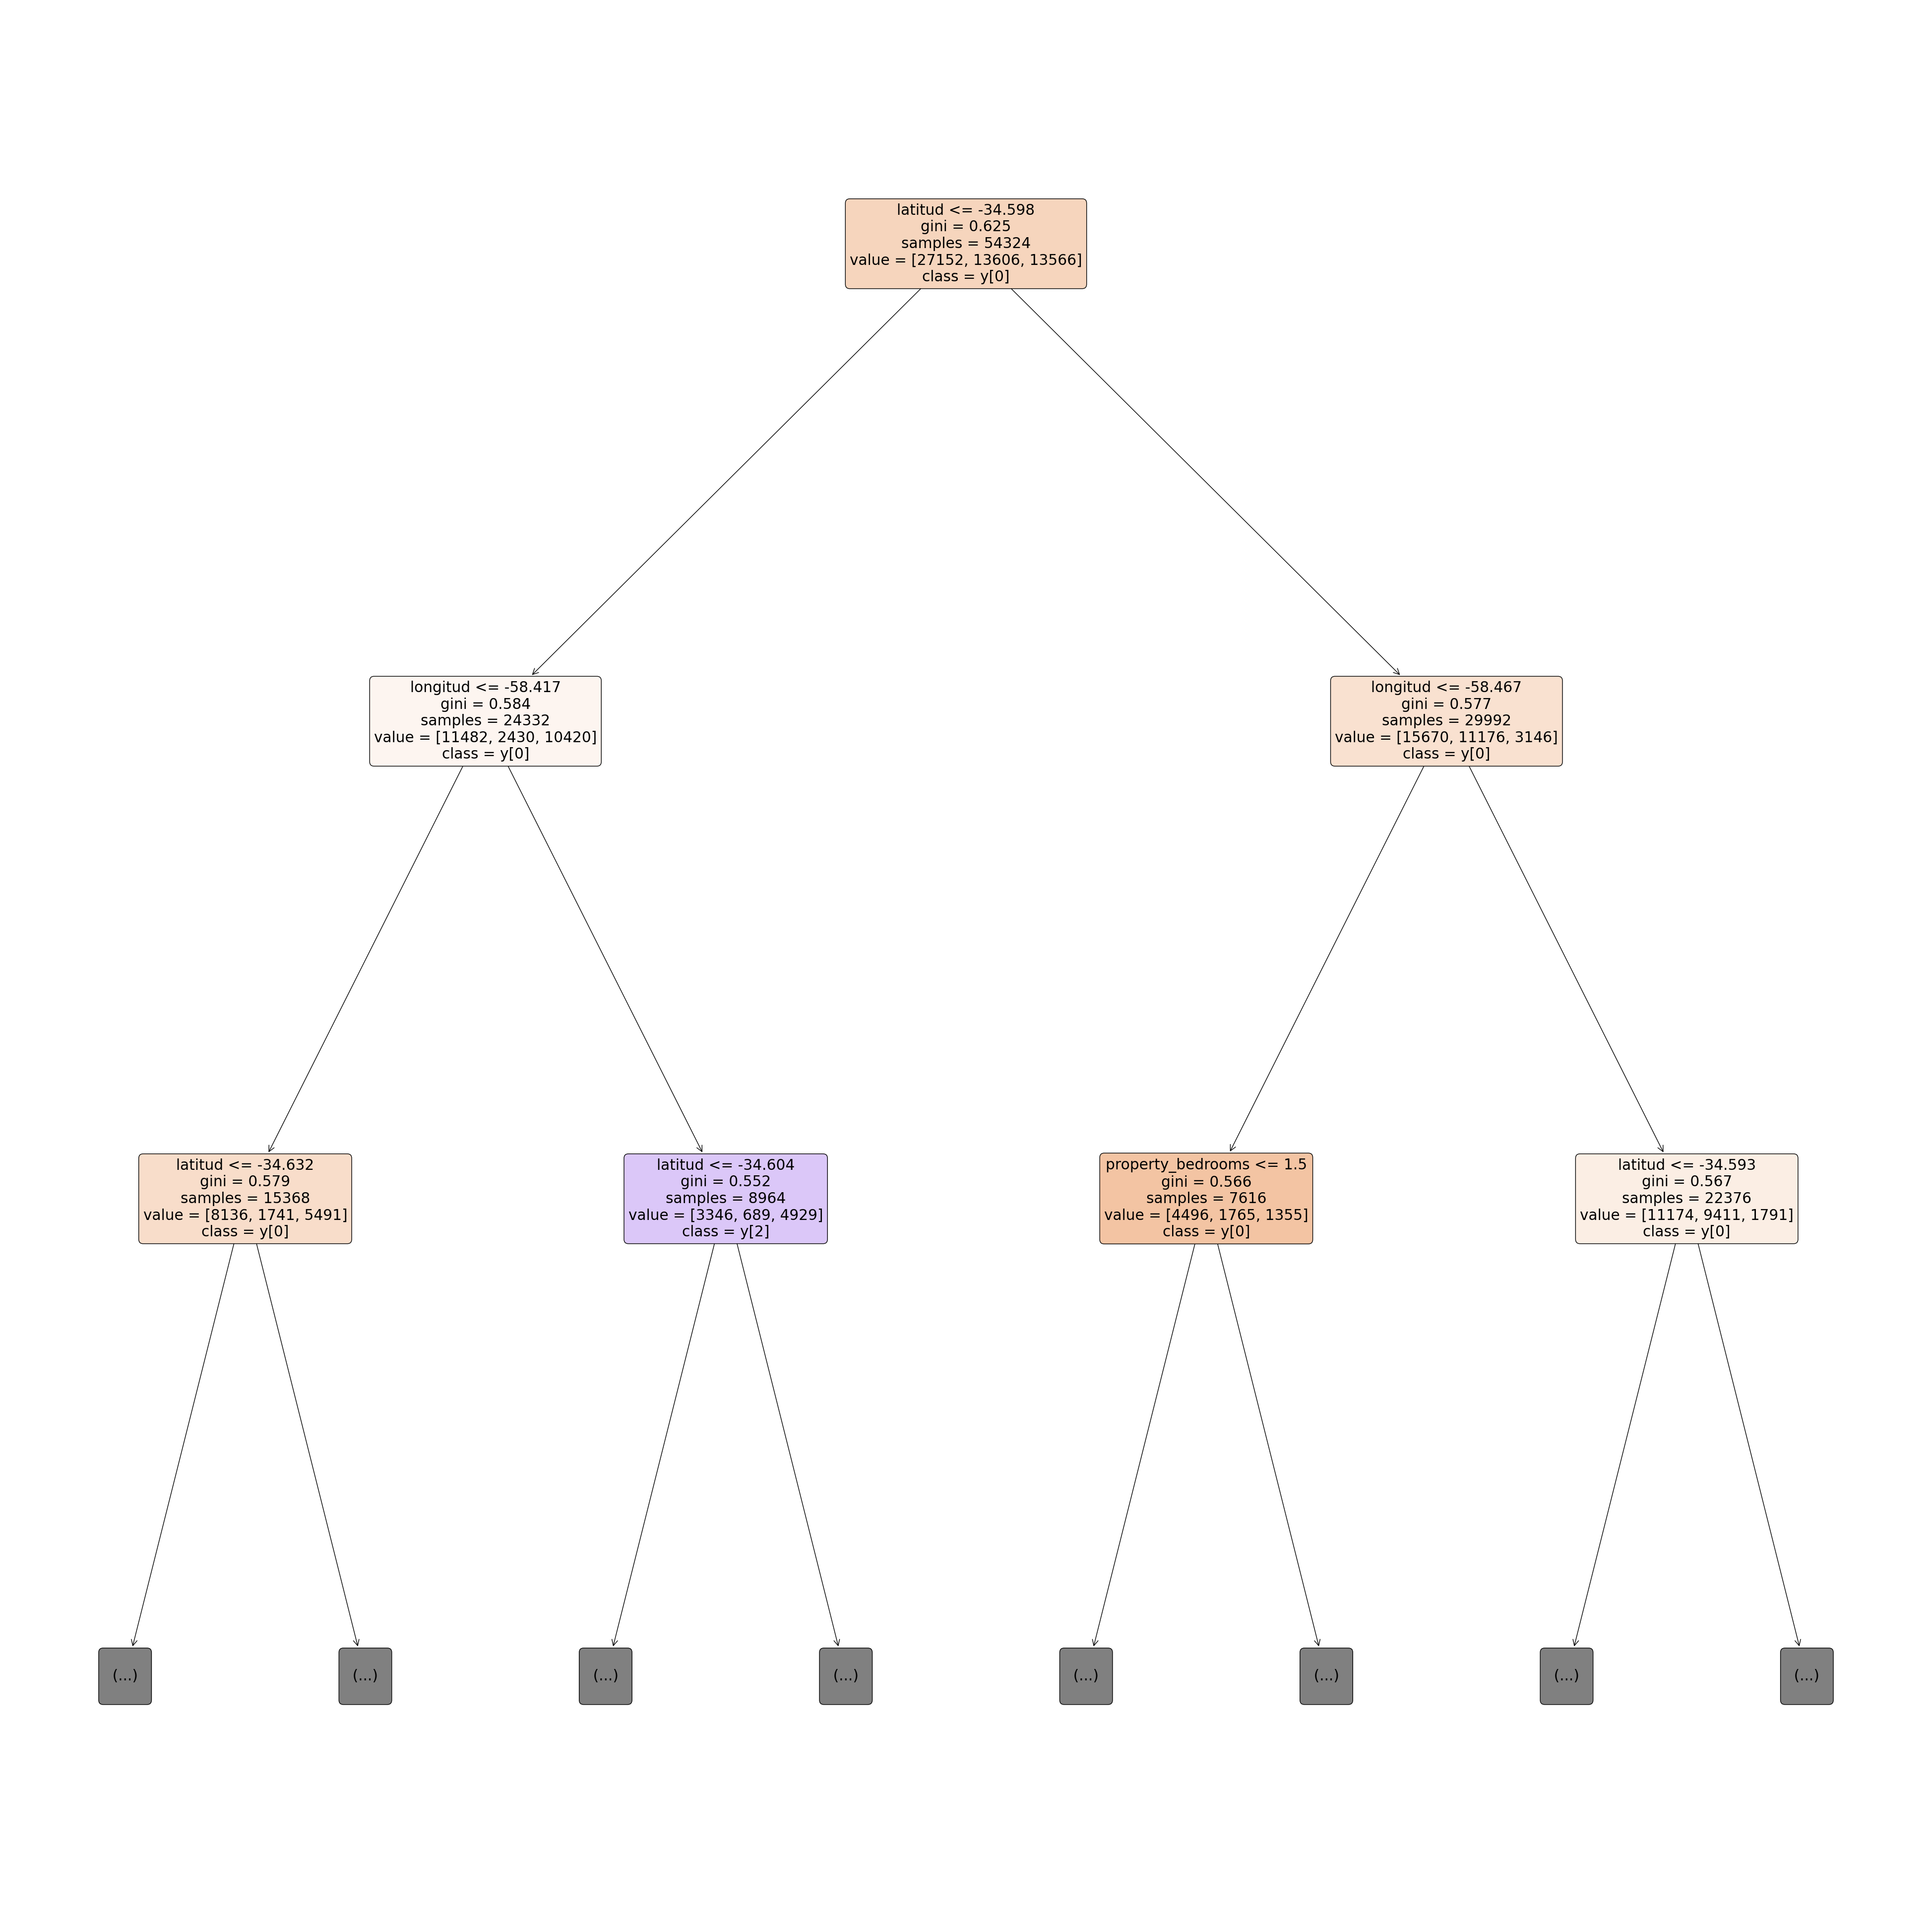

In [294]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

#### Importancia de atributos

Mientras mas alto, mayor es la importancia. Dicho esto notamos que la ayor relevancia pareceria tenerla la latitud. Tendremos que entender despues por que ese atributo predice mejor el tipo de precio.

In [295]:
sorted(list(zip(ds_train_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.33462755849709924),
 ('longitud', 0.27175969738933087),
 ('property_surface_total', 0.180882729483261),
 ('property_surface_covered', 0.1616534162584723),
 ('property_rooms', 0.029832886869032123),
 ('property_bedrooms', 0.02124371150280456)]

Notamos que el atributo con mayor importancia pareceria ser a priori la latitud.

#### Poda

A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que aumenta la impureza total de sus hojas.

El arbol tenia un maximo de profundidad de 41, recortamos este valor a la mitad para proseguir con la poda.

In [296]:
#Creo un clasificador 
arbol_poda = tree.DecisionTreeClassifier(max_depth = 20, random_state=2)

#Entreno un modelo
model_poda = arbol_poda.fit(X = x_train, y = y_train)

#Hago una predicción
y_pred_poda = model_poda.predict(x_test)

#Visualizo los resultados en un dataframe
ds_resultados_poda=pd.DataFrame(zip(y_test,y_pred_poda),columns=['test','pred'])
ds_resultados_poda.head()

test  pred
0     0     0
1     0     0
2     2     2
3     0     0
4     0     0

Text(50.722222222222214, 0.5, 'True')

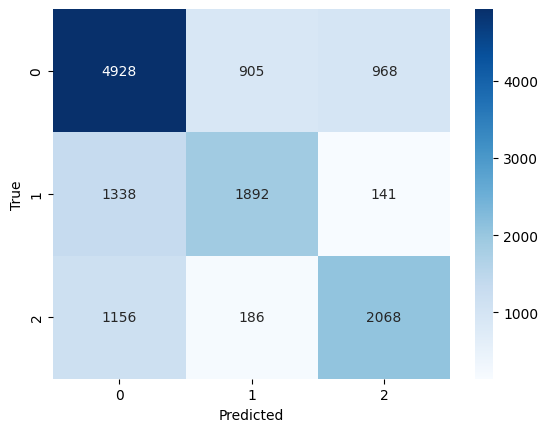

In [297]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_poda)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

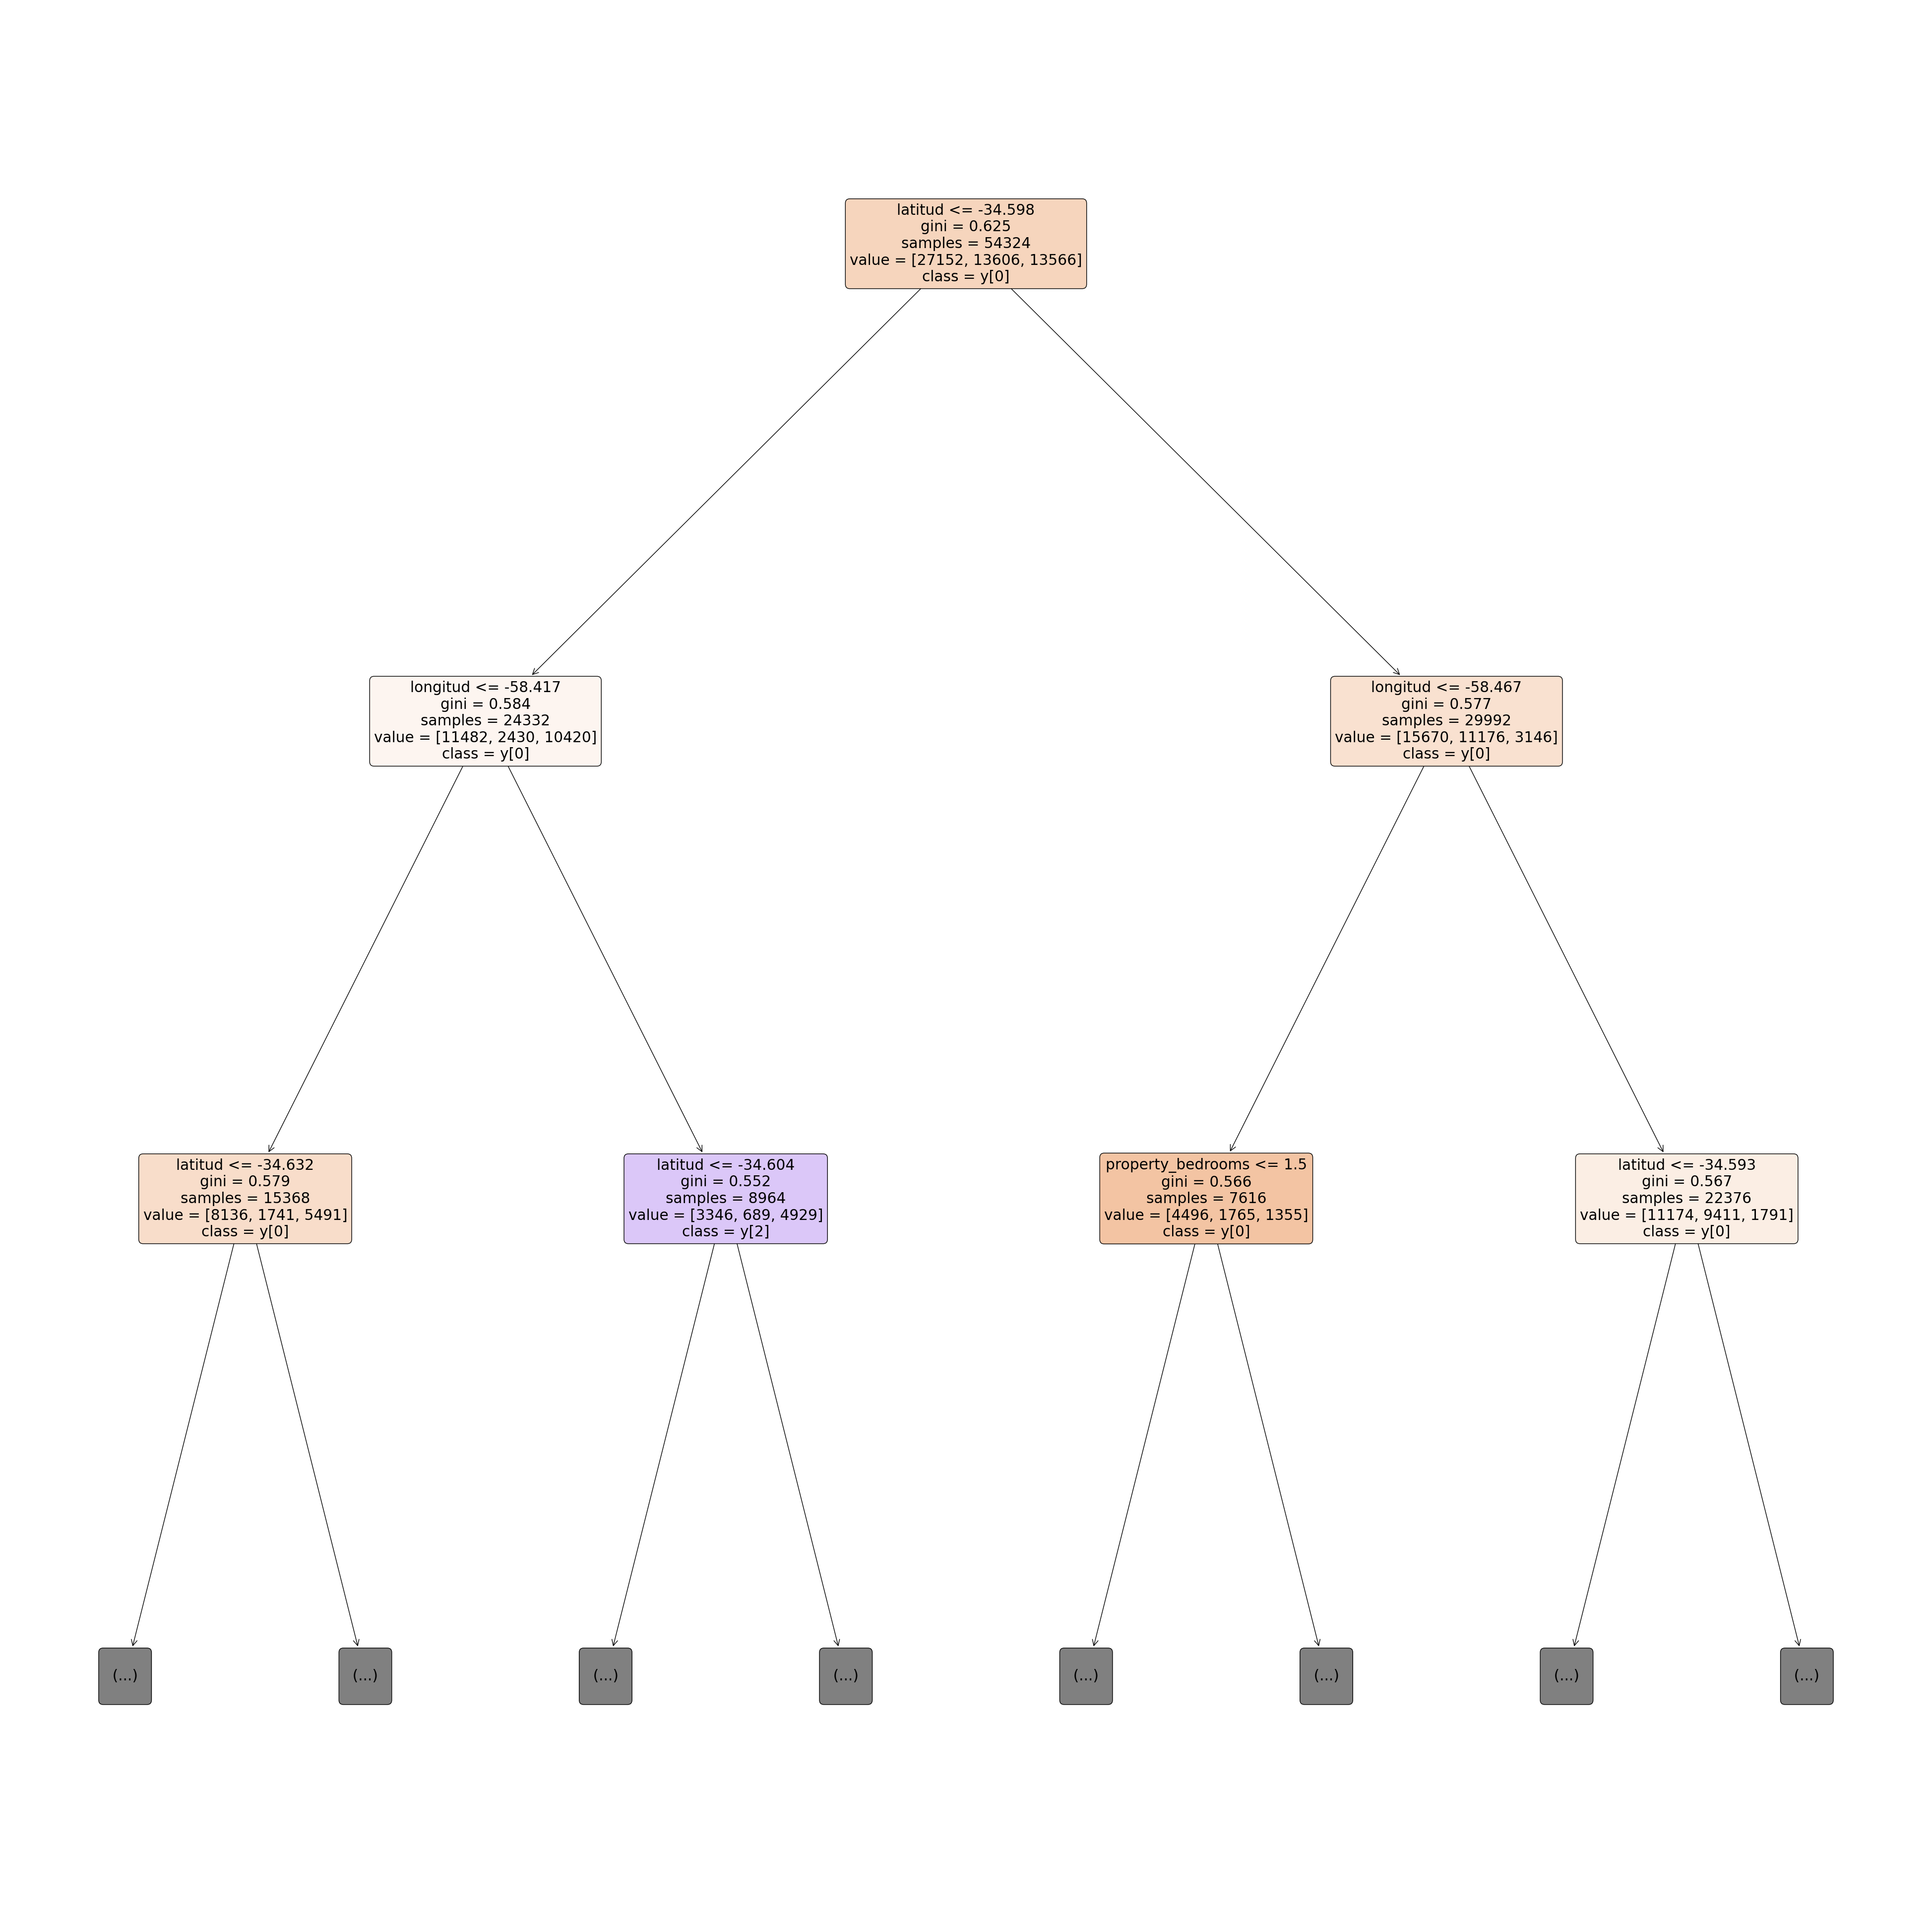

In [298]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(model_poda,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

In [299]:
#Calculo las métricas en el conjunto de evaluación
print(classification_report(y_test, y_pred_poda))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      6801
           1       0.63      0.56      0.60      3371
           2       0.65      0.61      0.63      3410

    accuracy                           0.65     13582
   macro avg       0.65      0.63      0.64     13582
weighted avg       0.65      0.65      0.65     13582



In [300]:
#Realizamos una predicción sobre el set de train
x_pred = model.predict(x_train)
print(classification_report(y_train, x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27152
           1       0.99      0.96      0.97     13606
           2       0.99      0.96      0.97     13566

    accuracy                           0.97     54324
   macro avg       0.98      0.97      0.97     54324
weighted avg       0.98      0.97      0.97     54324



Luego de realizada la poda, notamos que se nos redujeron los datos de test un 0,1 (de 0,66 a 0,65) pero, los valores de train se mantuvieron igual (0,97).

El arbol todavia esta overfitteando aunque este podado.

La idea es tratar de mejorar el valor de train, probaremos con Random Search para que nos encuentre los mejores hiper parametros dentro de lo que le mandemos al arbol.

In [301]:
features = ['latitud', 'longitud', 'property_rooms', 'property_bedrooms','property_surface_total', 'property_surface_covered']
target = 'tipo_precio'

In [302]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_train[features].values, 
                                                    ds_train[target].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 54324
# Datos Prueba: 13582
% Positivos Entrenamiento: 25.000
% Positivos Prueba: 25.004


¿Cómo buscar la mejor combinación de hiperparámetros?

Exploramos un espacio de búsqueda, usando k-fold CV para medir el desempeño de cada combinación.
Al terminar, nos quedamos con la combinación con
mejor desempeño y entrenamos un único modelo usando todos los datos de train.

#### KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos e hiperparametros)

In [303]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {
    'criterion':['gini','entropy'],
    'max_depth':list(range(11,31)), 
    'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf':list(range(1,9)),
    'ccp_alpha':np.linspace(0,0.05,n)
}

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier(random_state=4) #semilla

#Metrica que quiero optimizar Accuracy Score (porque no tenemos datos binarios)
scorer_fn = make_scorer(sk.metrics.accuracy_score)


#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n,
                              random_state=2) #semilla

#Busco los hiperparamtros que optimizan Accuracy Score
randomcv.fit(x_train,y_train);

In [304]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 29, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [305]:
#Mejor métrica
print(randomcv.best_score_)

0.606840510495999


In [306]:
randomcv.cv_results_['mean_test_score']

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.60684051, 0.5       , 0.5       , 0.5       ])

In [307]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps, features)):
  if feat_imp > 0:
    print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.020171110464108494
property_rooms: 0.031057237689555553
property_surface_covered: 0.1572379085581938
property_surface_total: 0.16730939544667733
longitud: 0.2758641402866259
latitud: 0.34836020755483893


Notamos que la latitud sigue siendo el atributo mas importante

#### Predicción y Evaluación del Modelo con mejores hiperparámetros

In [308]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol = DecisionTreeClassifier(random_state=3).set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
mejores_hiper_arbol = arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
#print(reglas)

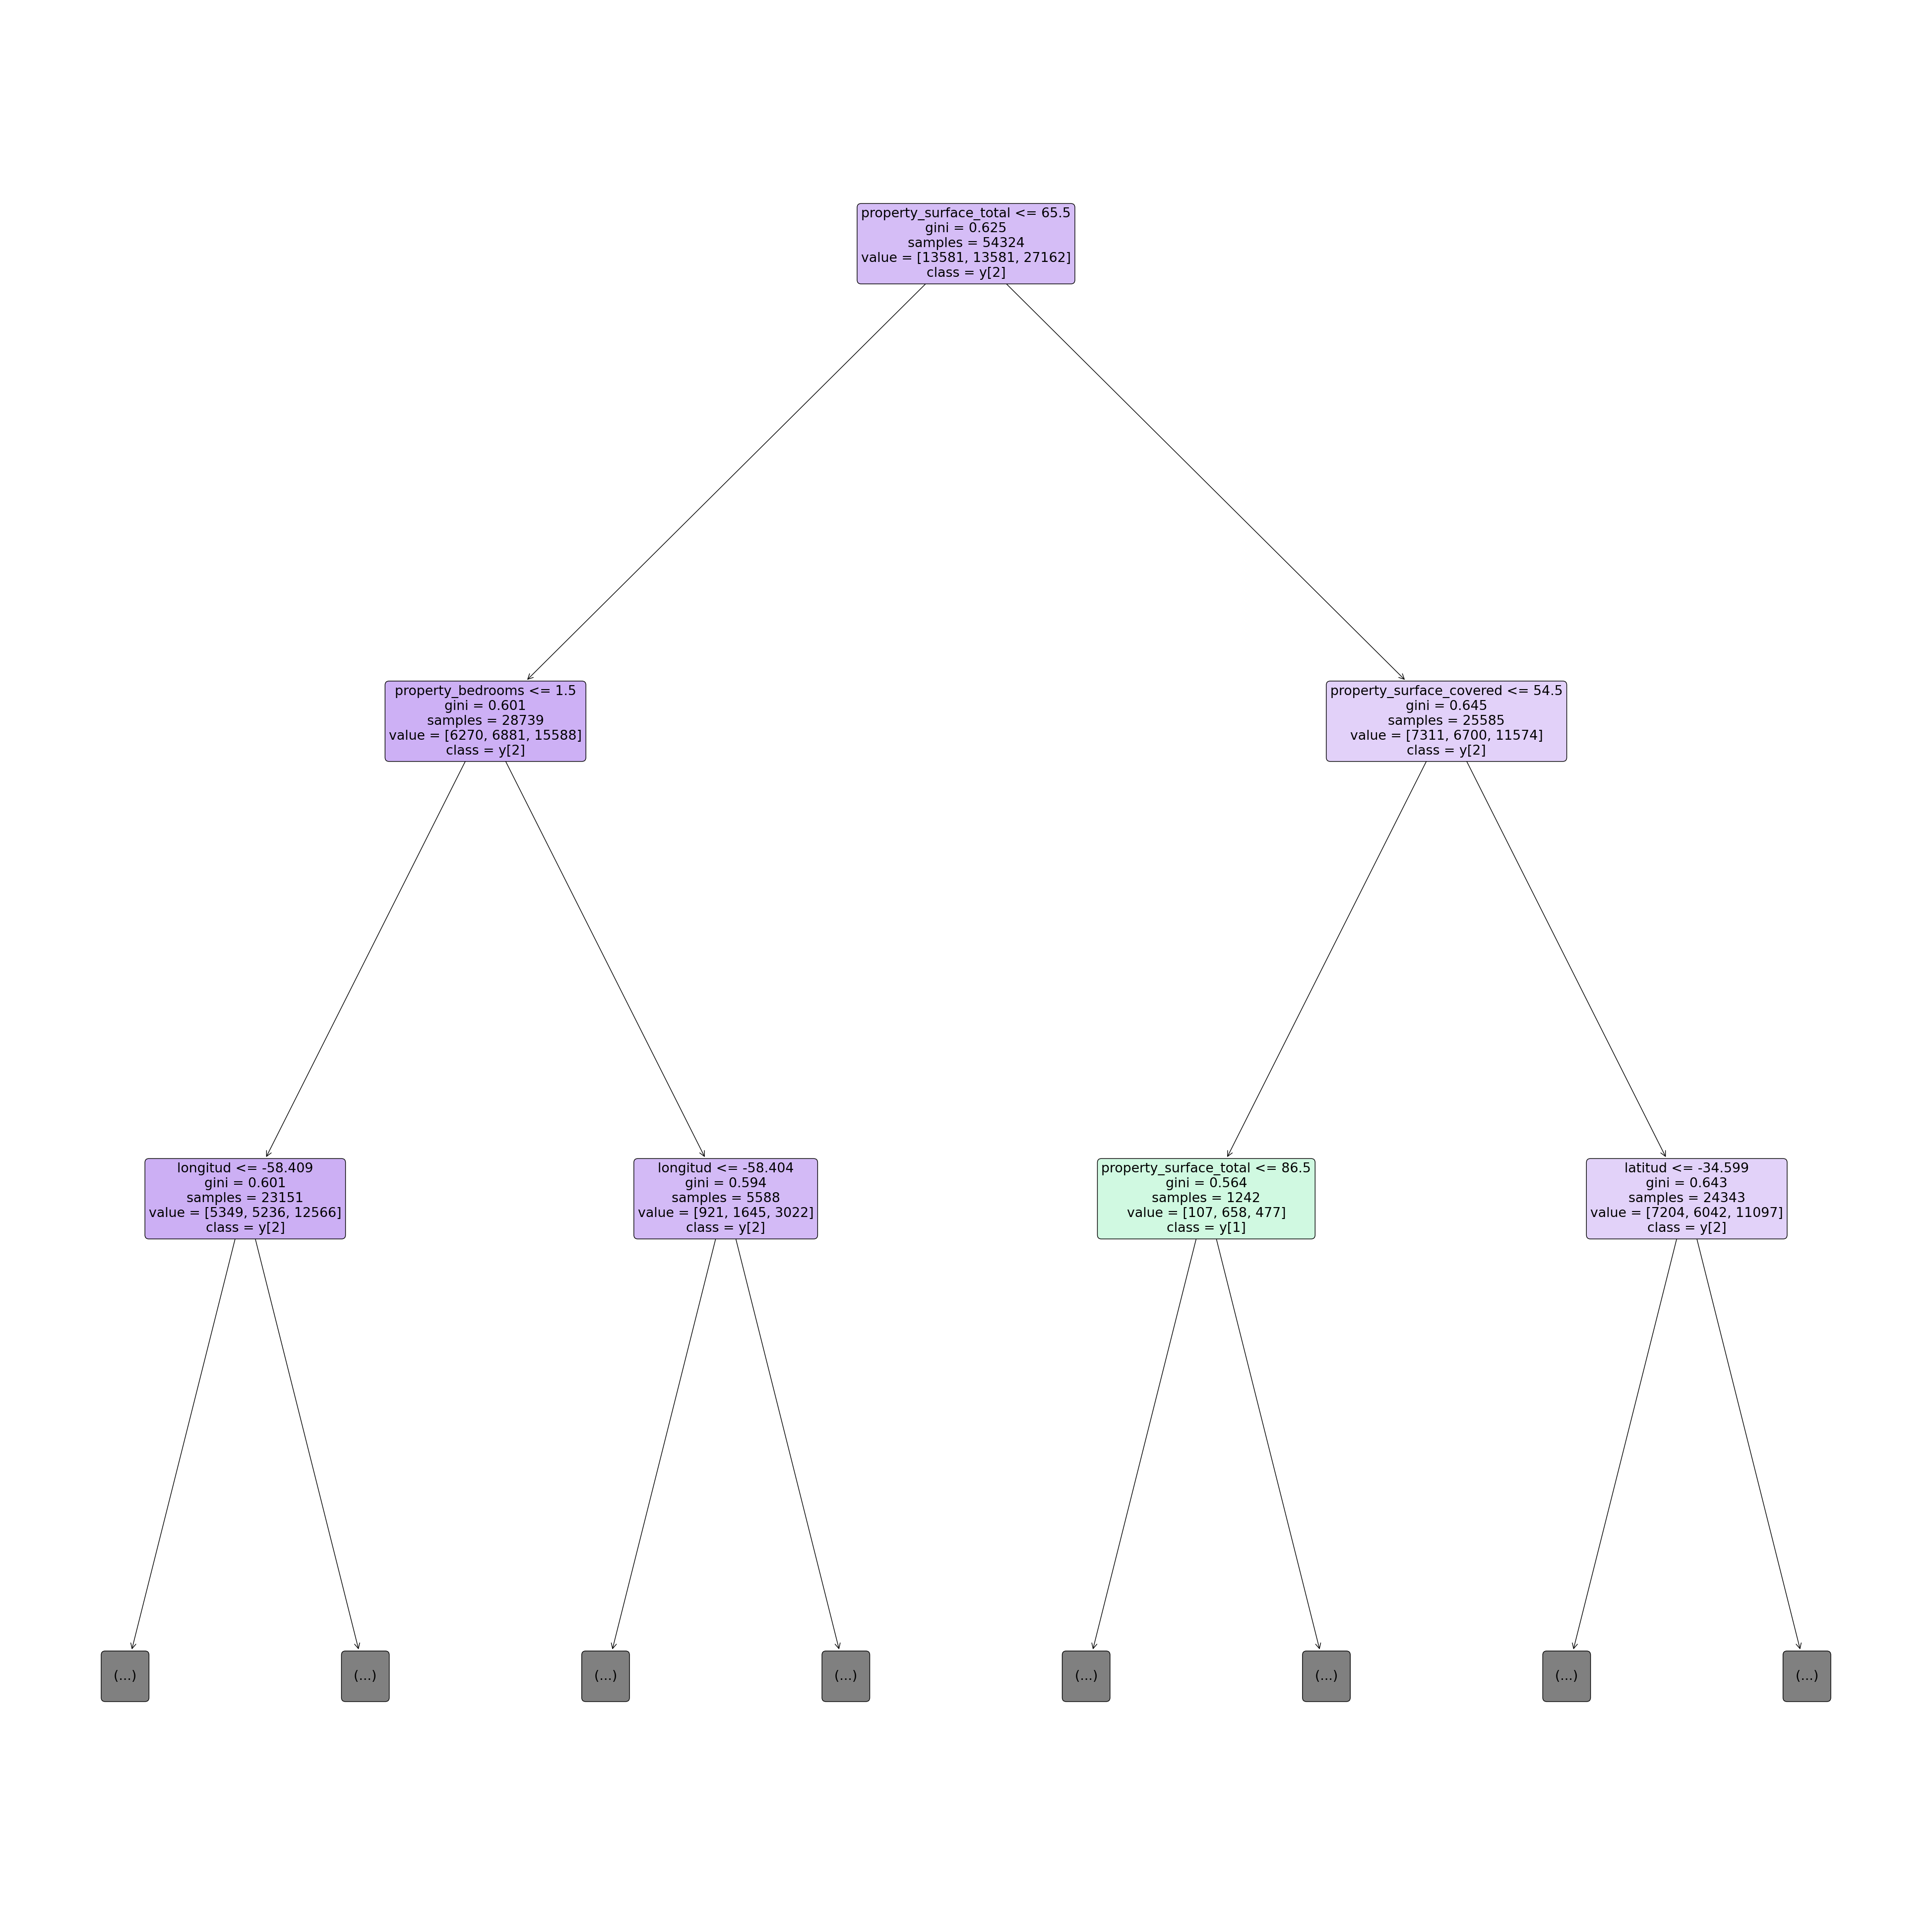

In [309]:
plt.figure(figsize=(50,50))

tree_plot=tree.plot_tree(mejores_hiper_arbol,
                         max_depth=2,
                         feature_names=ds_train_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Notemos como ahora, luego de mejorados los hiper parametros, el arbol que obtenemos obtiene como valor mas importante la superifice total cubierta y a partir de eso se toman decisiones.

Accuracy-Score: 0.620968929465469


Text(50.722222222222214, 0.5, 'True')

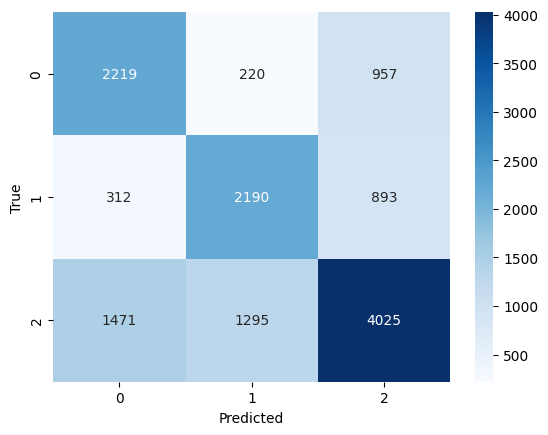

In [310]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score

#Hago predicción sobre el set de evaluacion
y_pred = mejores_hiper_arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print('Accuracy-Score: {}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

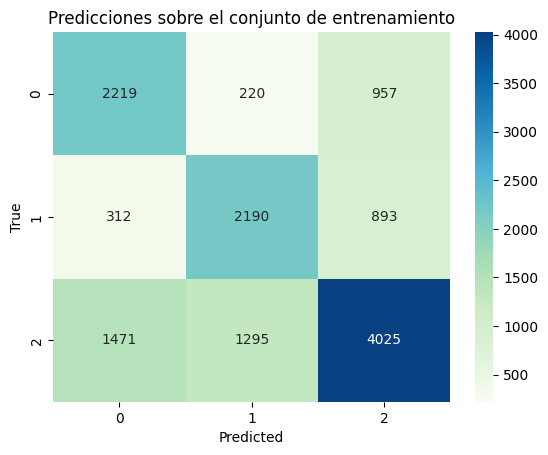

In [311]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [312]:
y_pred_new = best_tree.predict(x_train)

metrics = classification_report(y_train, y_pred_new)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.80      0.91      0.85     13581
        Bajo       0.84      0.88      0.86     13581
       Medio       0.92      0.83      0.87     27162

    accuracy                           0.86     54324
   macro avg       0.85      0.87      0.86     54324
weighted avg       0.87      0.86      0.86     54324



In [313]:
y_pred_new2 = best_tree.predict(x_test)

metrics = classification_report(y_test, y_pred_new2)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.56      0.63      0.60      3396
        Bajo       0.60      0.64      0.62      3395
       Medio       0.68      0.62      0.65      6791

    accuracy                           0.63     13582
   macro avg       0.62      0.63      0.62     13582
weighted avg       0.63      0.63      0.63     13582



In [314]:
mejores_hiper_arbol.predict_proba(x_test)[0:10]

array([[0.5, 0.5, 0. ],
       [0.5, 0. , 0.5],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.5]])

#### Entrenamiento Cross Validation

Veamos qué pasa con las métricas si entrenamos el mismo árbol con diferentes conjuntos de datos (en este caso con cada split de un CV)

In [315]:
#Entrenamiento con 10 Fold Cross Validation 
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo árbol con los mejores hiperparámetros 
arbolcv=DecisionTreeClassifier(random_state=5).set_params(**randomcv.best_params_)

#Selecciono métrica Accuracy Score
scorer_fn = make_scorer(sk.metrics.accuracy_score)

#Hago CV
resultados = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

#Selecciono el arbol con mejor performance
metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==np.max(metricsCV))[0][0]]

In [316]:
#Métricas de cada split
metricsCV

array([0.62304436, 0.61457758, 0.62967053, 0.61531382, 0.60438144,
       0.61284978, 0.60327688, 0.61064065, 0.60474963, 0.61708395])

<AxesSubplot: >

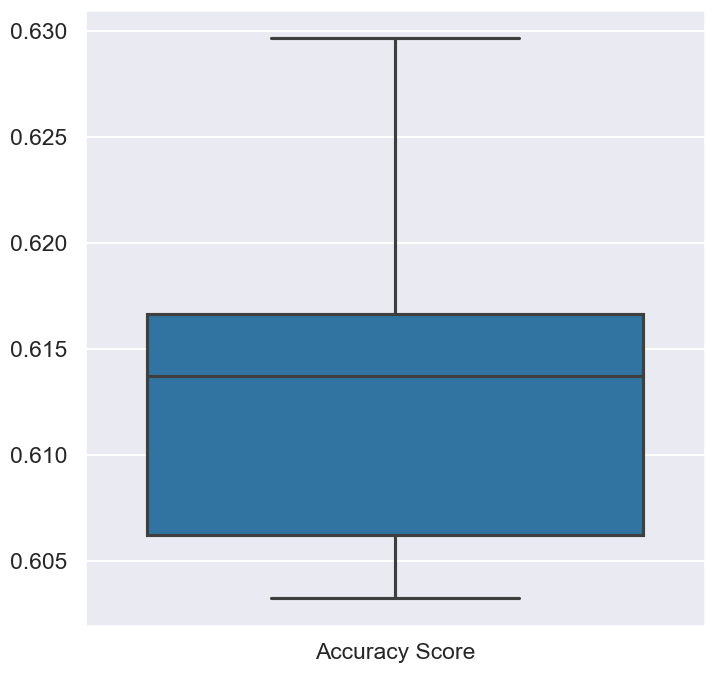

In [317]:
#Grafico Boxplot - Entrenado con 10 Fold Cross Validation

metric_labelsCV = ['Accuracy Score']*len(metricsCV) 
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.boxplot(metric_labelsCV,metricsCV)

Notamos como el valor de accuracy parece estar rondando 0,61 para cada K-Fold. Cuando nosotros mejoramos los hiper parametros, logramos obtene run valor un poco por arriba de esta media para test.

In [318]:
#Importancia y reglas del Árbol con mejor Performance
from sklearn.tree import export_text

feat_imps = mejor_performance.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))
print()

reglas = export_text(mejor_performance, feature_names=list(features))
#print(reglas) es muy verboso

property_bedrooms: 0.013270039747337911
property_rooms: 0.015995969609047433
property_surface_covered: 0.14446539496336241
property_surface_total: 0.17572552074114184
longitud: 0.28730374060697395
latitud: 0.36323933433213645



              precision    recall  f1-score   support

        Alto       0.56      0.63      0.60      3396
        Bajo       0.58      0.63      0.60      3395
       Medio       0.68      0.61      0.64      6791

    accuracy                           0.62     13582
   macro avg       0.61      0.62      0.61     13582
weighted avg       0.63      0.62      0.62     13582

              precision    recall  f1-score   support

        Alto       0.77      0.87      0.81     13581
        Bajo       0.79      0.84      0.81     13581
       Medio       0.88      0.80      0.84     27162

    accuracy                           0.83     54324
   macro avg       0.81      0.83      0.82     54324
weighted avg       0.83      0.83      0.83     54324



Text(37.08333333333333, 0.5, 'True')

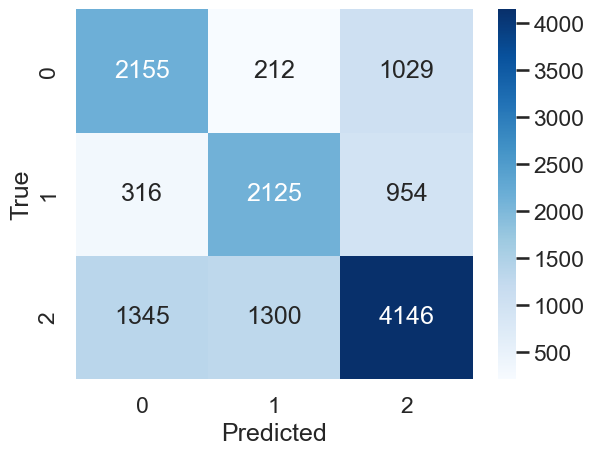

In [319]:
## Prediccion y evaluacion del modelo

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#Predicción sobre el set de evaluacion
y_pred = mejor_performance.predict(x_test)

#Arbol Reporte y Matriz de Confusion para set de test
print(classification_report(y_test,y_pred))

#Realizamos una predicción sobre el set de train
x_pred = mejor_performance.predict(x_train)

#Arbol Reporte y Matriz de Confusion para set de train
print(classification_report(y_train, x_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Exportamos el modelo

In [320]:
from joblib import dump
dump(model, 'modelos/arbol-decision.joblib')

['modelos/arbol-decision.joblib']

## Random Forest - Clasificacion


In [321]:
def indice_mayor(array):
    max = 0
    for i in range(len(array)):
        if array[max] < array[i]:
            max = i

    return max


param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 8, 16],
               "n_estimators": [20, 50, 100]}

kfold = KFold(n_splits=5)
base_tree = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
gs = RandomizedSearchCV(estimator=base_tree, param_distributions = param_grid, scoring='accuracy', cv=kfold, n_iter=10)

gs.fit(X=ds_reducido, y=ds_train.tipo_precio);
mejores_parametros = gs.best_params_
print(mejores_parametros)
print(gs.best_score_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
0.7087738874323446


In [322]:
arbol = RandomForestClassifier().set_params(**mejores_parametros)
results = cross_validate(estimator=arbol, X=ds_reducido, y=ds_train.tipo_precio, cv=5, n_jobs=-1, return_estimator=True)
mejor_arbol = results['estimator'][indice_mayor(results['test_score'])]

##### Importancia de atributos

Esta lista ya nos da información interesante. Termina siendo bastante más importante la localización de la vivienda para el modelo que su superficie. Y concretamente la latitud parece ser más relevante que la lognitud. Mientras que la cantidad de habitaciones y baños no terminan siendo muy relevantes.

In [323]:
sorted(list(zip(ds_reducido.columns.to_list(), mejor_arbol.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.33758425969079525),
 ('longitud', 0.2787814931069181),
 ('property_surface_total', 0.17624121990020356),
 ('property_surface_covered', 0.16163263176873635),
 ('property_rooms', 0.02722217970451284),
 ('property_bedrooms', 0.018538215828834137)]

##### Gráfico de un arbol

Vemos como para el arbol 17 su criterio principal es la longitud. De ser menor a 58.409 se fija si la superficie cubierta aes menor a 99.5 metros cuadrados, caso contrario en la primera condición se fija si la superficie total es menor a 108.5 metros cuadrados. Así hasta llegar a una hoja que indique si se trata de una propiedad de precio bajo, medio o alto.

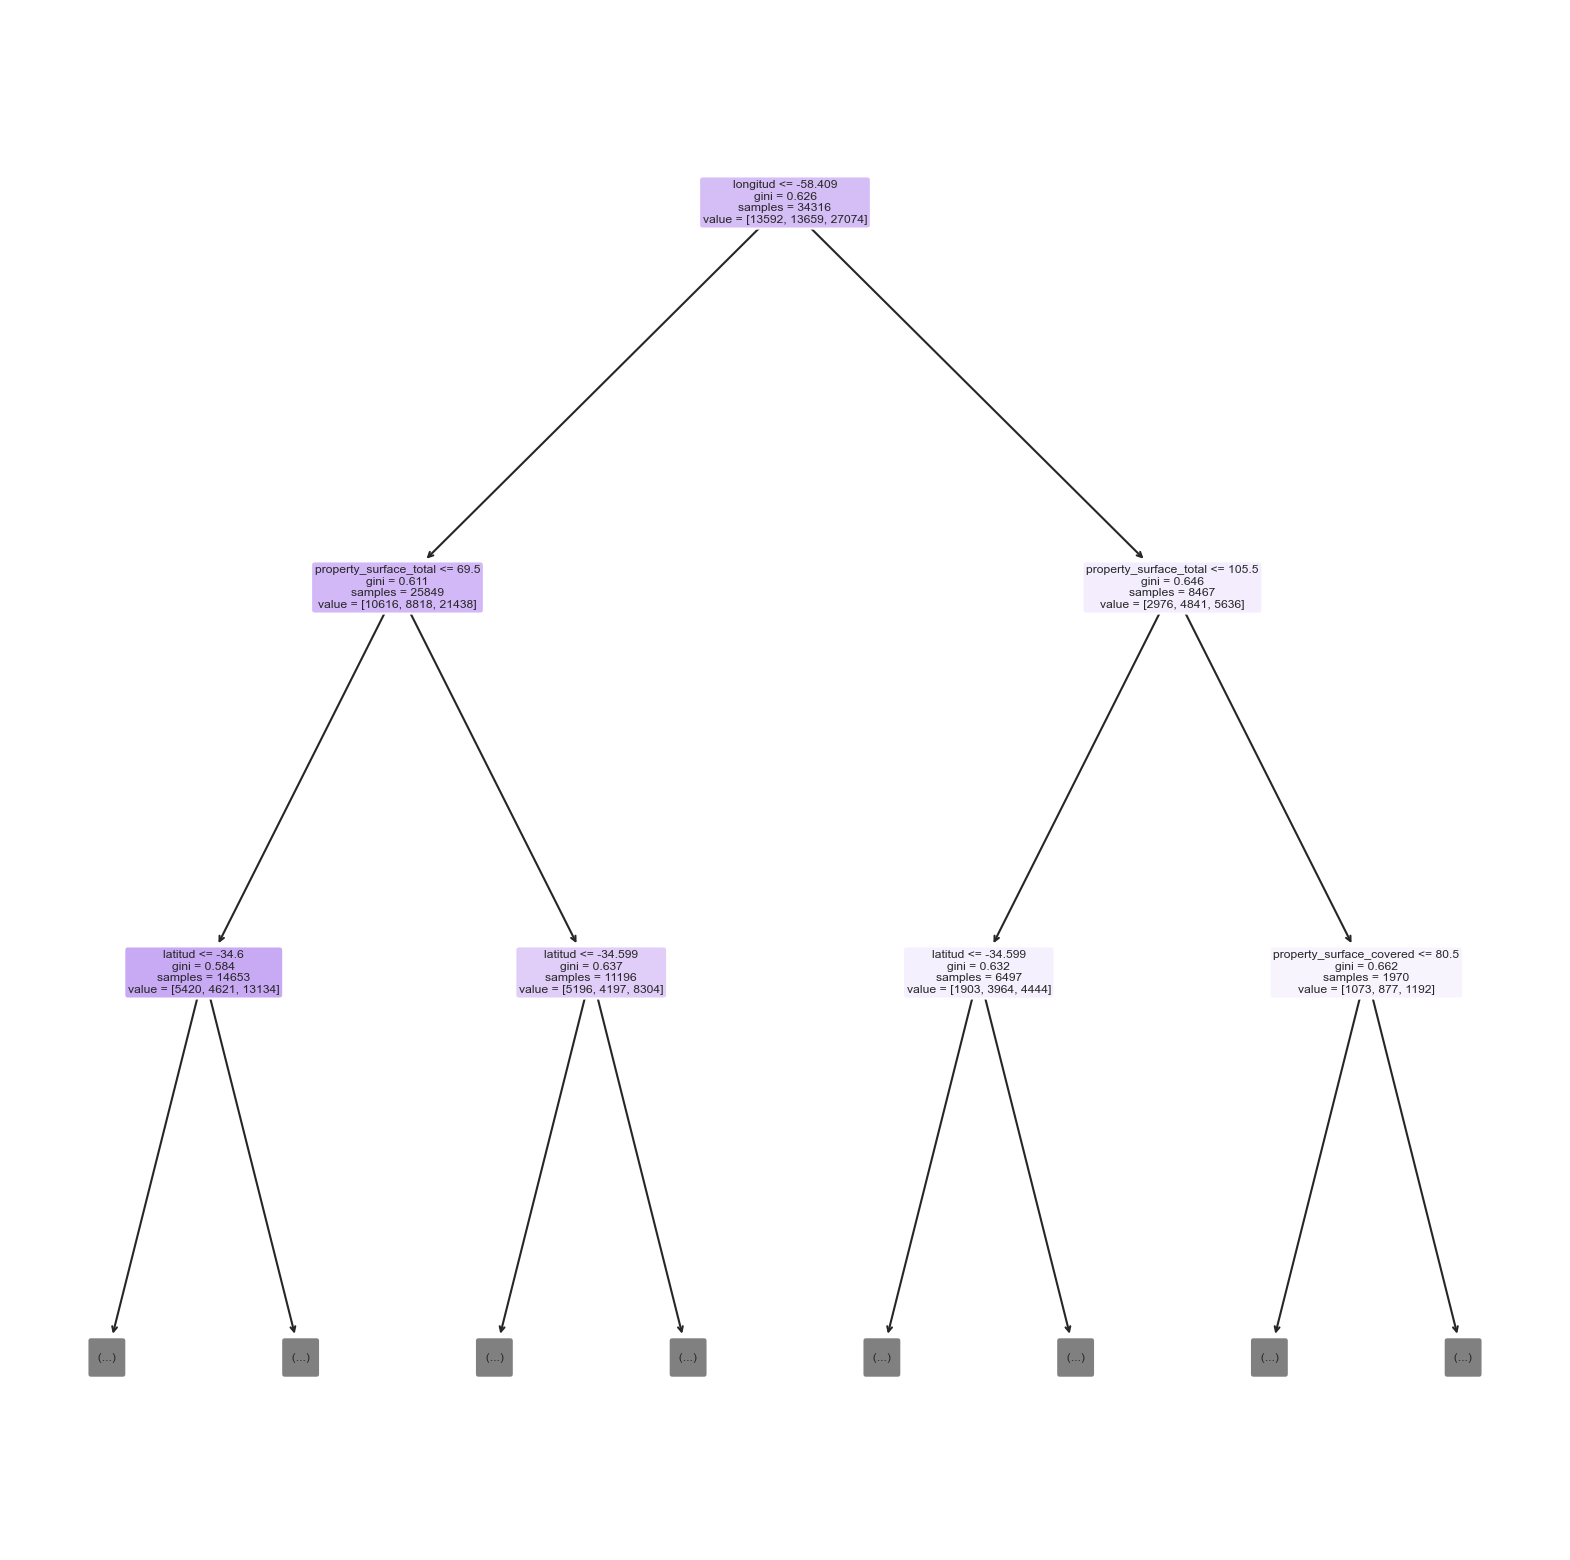

In [324]:
from sklearn import tree
plt.figure(figsize=(20, 20))
tree_plot_=tree.plot_tree(mejor_arbol.estimators_[17], feature_names=ds_reducido.columns.to_list(), filled=True, rounded=True, max_depth= 2)
plt.show(tree_plot_)

##### Evaluación de performance con test

In [325]:
target = ds_test.tipo_precio
ds_test_reducido = ds_test.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

In [326]:
predicted = mejor_arbol.predict(ds_test_reducido)

Text(37.08333333333333, 0.5, 'True')

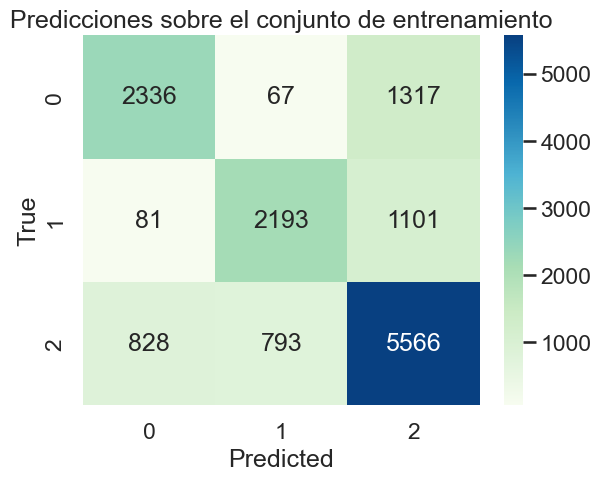

In [327]:
from sklearn.metrics import confusion_matrix


ds_resultados = pd.DataFrame(zip(target, predicted), columns=['test', 'pred'])
tabla = confusion_matrix(target, predicted)
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g', ).set(title='Predicciones sobre el conjunto de entrenamiento')
plt.xlabel('Predicted')
plt.ylabel('True')

In [328]:
from sklearn.metrics import classification_report

metrics = classification_report(target, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.72      0.63      0.67      3720
        Bajo       0.72      0.65      0.68      3375
       Medio       0.70      0.77      0.73      7187

    accuracy                           0.71     14282
   macro avg       0.71      0.68      0.70     14282
weighted avg       0.71      0.71      0.71     14282



###### Métricas con el dataset de train

In [329]:
predicted = mejor_arbol.predict(ds_reducido)
metrics = classification_report(ds_train.tipo_precio, predicted)
print(metrics)

              precision    recall  f1-score   support

        Alto       0.93      0.90      0.92     16977
        Bajo       0.93      0.91      0.92     16976
       Medio       0.91      0.94      0.92     33953

    accuracy                           0.92     67906
   macro avg       0.93      0.92      0.92     67906
weighted avg       0.92      0.92      0.92     67906



Notamos como el modelo está overfitteando

In [330]:
dump(mejor_arbol, 'modelos/random-forest.joblib')

['modelos/random-forest.joblib']

## Regresion Logistica - Clasificacion

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score, accuracy_score


from yellowbrick.classifier import ROCAUC

ModuleNotFoundError: No module named 'yellowbrick'

Entrenamos un regresor con nuestro dataset reducido y cross validation en 5 folds.

In [ ]:
ds_test.tipo_precio

In [ ]:
estimator = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_reducido_normalizado, ds_train_y)
preds = estimator.predict(ds_reducido_normalizado)


accuracy_score(ds_train_y, preds)

In [ ]:
estimator_pca = LogisticRegression(random_state=0, multi_class='multinomial').fit(ds_pca, ds_train_y)
preds_pca = estimator_pca.predict(ds_pca)

accuracy_score(ds_train_y, preds_pca)

Evaluaremos los parámetros que podemos mejorar

In [ ]:
print(classification_report(pred, ds_train_y))

Buscaremos hiperparámetros mediante random search

Como usamos el dataset de PCA, debemos aplicar el mismo PCA al ds de test.

Podemos ver que el score de test es similar al de train. Sin embargo, ninguno de los dos es un buen puntaje

In [ ]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS normalizado',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

In [ ]:
print("Test score: {:.2f}".format(accuracy_score(ds_train_y, preds_pca)))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(ds_train_y, preds_pca)))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(ds_train_y, preds_pca),annot=True, fmt='g')
ax = ax.set(xlabel='Predicted',ylabel='True',title='Matriz de confusión DS PCA',
            xticklabels=(['Bajo', 'Medio', 'Alto']),
            yticklabels=(['Bajo', 'Medio', 'Alto']))

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades? - Responder Despues

In [ ]:
dump(estimator, 'modelos/regresion-logistica.joblib')

## KNN - Regresión

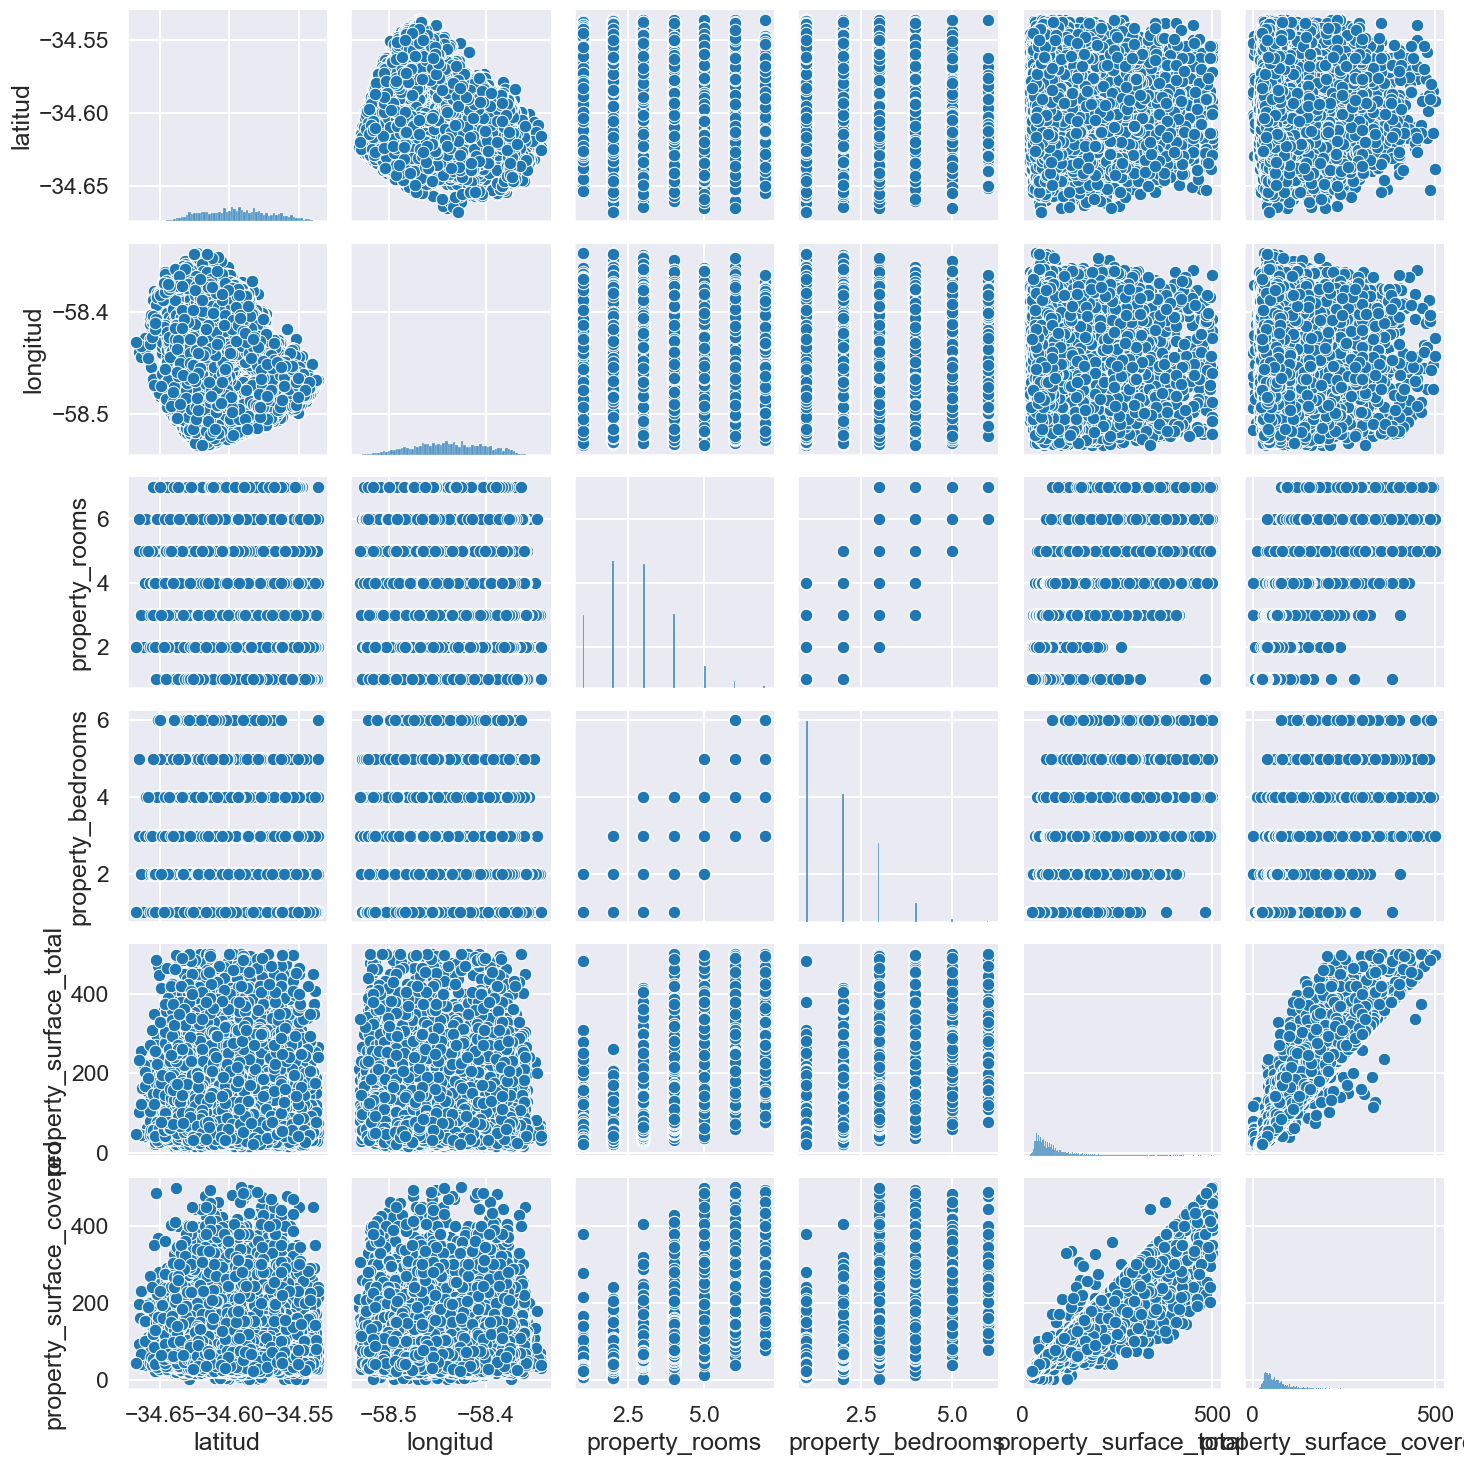

In [352]:
#Gráfico de a pares

ds_train_knn = ds_train.drop(['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price', 'tipo_precio', 'pxm2'], axis=1)

sns.pairplot(ds_train_knn)

Correlación

A partir de este diagrama, podemos ver que property_surface_total, property_surface_covere y property_price podrían ser buenos features ya que sus diagramas de dispersión muestran una posible relación lineal. Analicemos la correlación.

In [353]:
# Heatmap de correlacion
ds_train_knn.corr().style.background_gradient(cmap='coolwarm')

In [355]:
#selecciono variables regresoras
X = ds_train_knn[['property_surface_total', 'property_surface_covered']]
#selecciono variable a predecir
y = ds_train.property_price

#Separacion Train/test  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

La regresión se ve muy afectada por los valores atípicos, ya que pueden interferir en el cálculo de la pendiente de la curva. Analizaremos un poco esta situacion.

[Text(0.5, 0, 'Variable')]

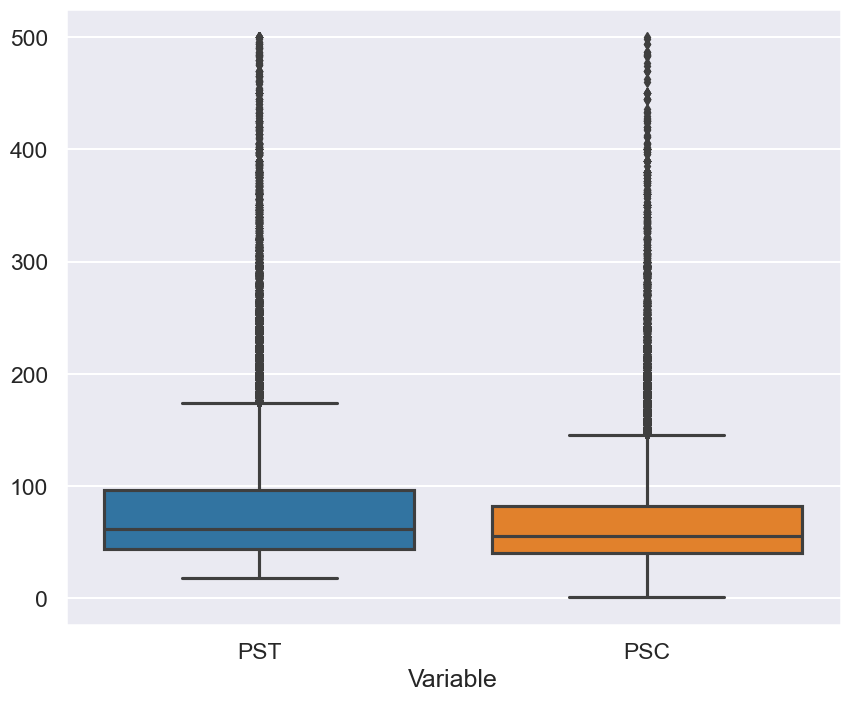

In [356]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['PST']*len(list(X_train.property_surface_total)) + ['PSC']*len(list(X_train.property_surface_covered))

valores=list(X_train.property_surface_total) + list(X_train.property_surface_covered) 

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

Usaremos la regla 1.5 x IQR: se eliminará todo lo que esté por encima o por debajo de 1.5 veces el rango entre cuantiles.

In [357]:
#Medidas train
X_train.describe().T

count       mean        std   min   25%   50%  \
property_surface_total    54324.0  81.831640  60.795619  18.0  44.0  62.0   
property_surface_covered  54324.0  70.888392  50.332123   1.0  40.0  55.0   

                           75%    max  
property_surface_total    96.0  500.0  
property_surface_covered  82.0  500.0

In [337]:
#Calculo los cuantiles de las variables x,y
x_q3, x_q1 = np.percentile(X_train.property_surface_total, [75 ,25])
y_q3, y_q1 = np.percentile(X_train.property_surface_covered, [75 ,25])

#Calculo e rango intercuartil de las variables x,y
iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1

In [358]:
# Elimino outliers de la variable 'x'
X_train = X_train.query(' property_surface_total >= (@x_q1 - @iqr_x*1.5) & property_surface_total <= (@x_q3 + @iqr_x*1.5) ')
y_train = y_train[X_train.index]

# Elimino outliers de la variable 'y'
X_train = X_train.query(' property_surface_covered >= (@y_q1 - @iqr_y*1.5) & property_surface_covered <= (@y_q3 + @iqr_y*1.5) ')
y_train = y_train[X_train.index]

[Text(0.5, 0, 'Variable')]

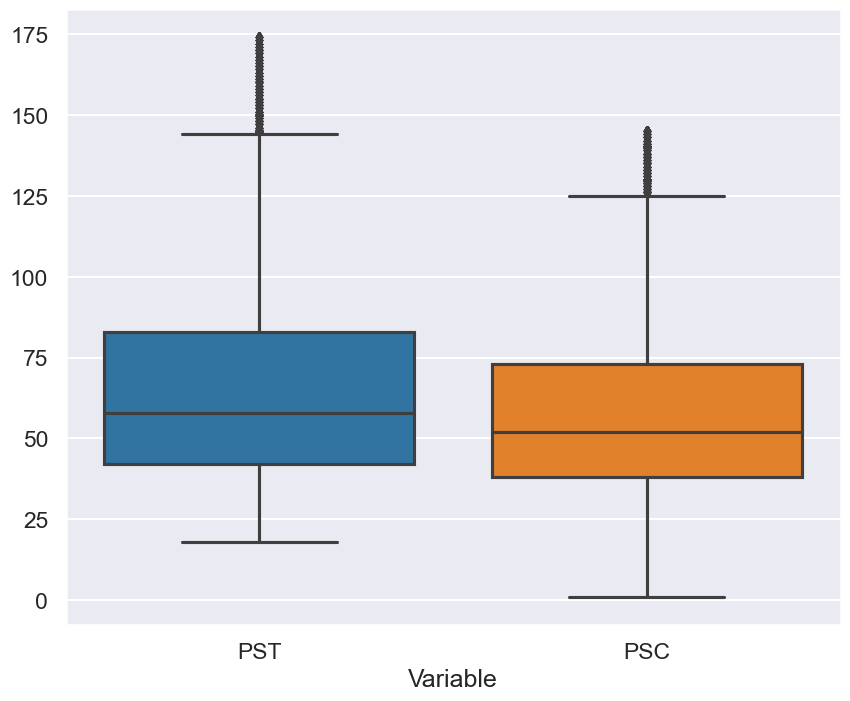

In [359]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['PST']*len(list(X_train.property_surface_total)) + ['PSC']*len(list(X_train.property_surface_covered))

valores=list(X_train.property_surface_total) + list(X_train.property_surface_covered)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

Ahora observamos que la media de PST se encuentra cerca de 60 y PSC cerca de 50. Estos valores tienen mucho sentido ya que La superficie cubierta siempre suele ser unos 10 metros menor con respecto a la superficie total de la vivienda.

In [373]:
#Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

<AxesSubplot: xlabel='property_surface_total', ylabel='property_price'>

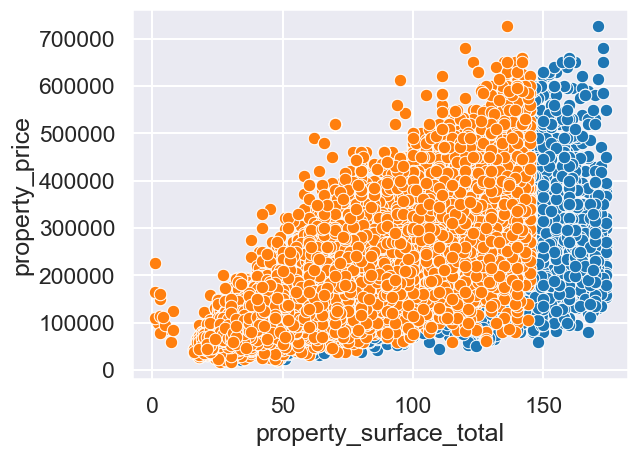

In [374]:
sns.scatterplot(x=X_train.property_surface_total, y=y_train)
sns.scatterplot(x=X_train.property_surface_covered, y=y_train)

Este grafico muestra claramente como siempre la superifcie total esta unos metros por encima de la superficie cubierta de la vivienda, tal y como veiamos en el analsis por boxplot una vez removidos los outliers mas groseros.

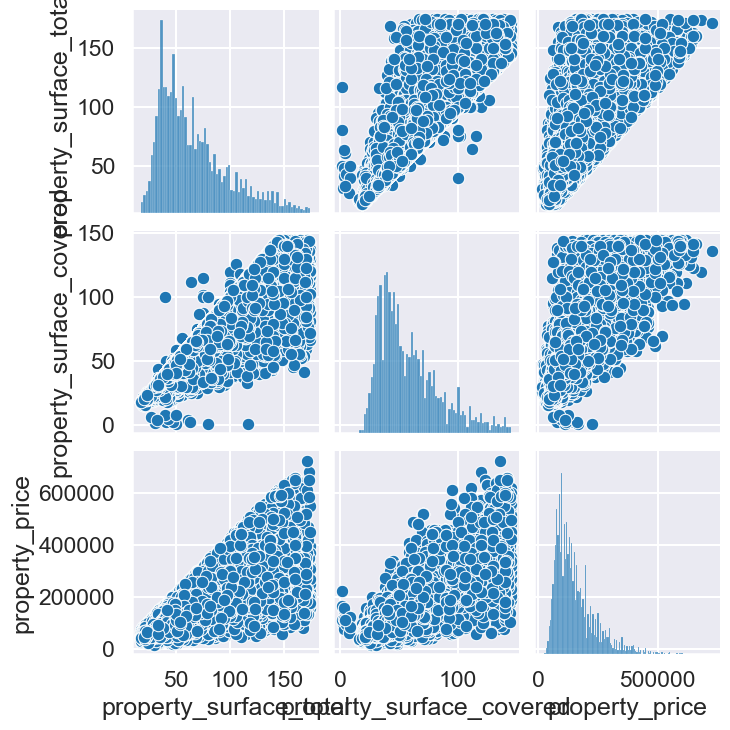

In [375]:
#Grafico de a pares incluyendo variable a predecir
xy_train_sin_outliers = pd.concat([X_train, y_train], axis=1)
sns.pairplot(xy_train_sin_outliers)

En este pairplot notamos la estrecha relacion guarda el precio con la superficie total y la superficie cubierta de una vivienda. Podemos notar esto a traves de las rectas lineales que se forman en los graficos.

In [378]:
from sklearn.neighbors import KNeighborsRegressor

# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

#Hago una predicción
y_pred=knn_regressor.predict(X_test)

In [379]:
y_pred

array([345780. , 120180. ,  87843.8, ..., 111795.6,  80620. ,  80760. ])

In [380]:
# Performance
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
# View
performance.head()

Valor Real  Prediccion     Error
385585    315000.0    345780.0  -30780.0
38667      95000.0    120180.0  -25180.0
436204     75000.0     87843.8  -12843.8
180002    290000.0    246000.0   44000.0
224126    450000.0    219580.0  230420.0

In [381]:
#Metricas para evaluar modelos
from sklearn import metrics

#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 10904434900.877989
El error (rmse) de test es: 104424.30225229177


In [382]:
#Coef. de Determinación R2
score_knn = knn_regressor.score(X_test, y_test)
score_knn

0.5210124916373833

Comparemos la performance con una regresión lineal múltiple

- Elemento de la lista
- Elemento de la lista

In [384]:
from sklearn.linear_model import LinearRegression

# Creo un modelo de regresion lineal y lo ajusto
lr_model = LinearRegression().fit(X_train, y_train)

#Hago una predicción
y_pred=lr_model.predict(X_test)

In [385]:
#Mean Square Error
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")

#Root Mean Square Error
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

El error (mse) de test es: 6392497037.165871
El error (rmse) de test es: 79953.0927304621


In [386]:
#Coef. de Determinación R2
score_lr = lr_model.score(X_test, y_test)
score_lr

0.7192035849743159

Se comprende luegod e este analisis la estrecha correlacion que hay entre las variables de superficie. Una (sup.total) incluye a la otra (sup.cubierta) por un X delta de metros y a su vez vimos como el precio de la vivienda tiene una fuerte dependencia con los metros de superifice que tenga la propiedad en cuestion.

In [388]:
dump(knn_regressor, 'modelos/knn.joblib')

['modelos/knn.joblib']

## XGBoost - Regresión

## a elección - Regresión

¿Qué modelo elegirían para predecir el precio de venta de las propiedades? - Responder Despues

## Conclusiones

En primera instancia, queremos mencionar que una de las cosas que nos resultó mas interesante es poder entender mas el dominio de problema de la venta de propiedades.
Nosotros teníamos un conocimiento previo y mas intuitivo de este dominio pero hacer este trabajo nos sirvió para reafirmar conceptos sobre los cuales no teniamos datos veridicos como para realmente justificar.

Por ejemplo, suponiamos que habia algunos barrios de la capital que tenian precios mas caros que otros pero no sabiamos exactamente cuales eran esos barrios. 
Despues de terminado este analisis, notamos que Palermo (tal y como pensabamos) era uno de los barrios de CABA que tenia mas anuncios y varias publicaciones en venta.
Dicho sea de paso, este barrio tenia gran parte de sus propiedades mas caras que otros barrios en relacion a los mismos metros cuadrados.
Es decir, si tenemos dos departamentos de 70 m2 en Villa Santa Rita vs Palermo, notaremos que efectivamente el departamento de Palermo se impone en precio por sobre el departamento de Villa Santa Rita.
Tambien pudimos identificar como varian los precios dependiendo del tipo de vivienda que estemos analizando.
Serian mas caras las casas y los PHs que los departamentos a similar rango de m2 para un mismo barrio. Luego vemos como estas variables se alteran dependiendo de la zona, los m2 y otras variables.

Por otro lado, tambien pudimos desmitificar pensamientos que teniamos con lo que respecta a cantidad de anuncios de propiedades.
Barrios que pensabamos que quizas no era tan "populares" resultaban tener varias publicaciones con varios tipos de viviendas.

Algo que quisimos agregar mediante una imputacion es la distancia de las propiedades a la estacion de subte mas cercana para utilizarla como feature en base a uno de los datasets del gobierno de la ciudad. No tuvimos tiempo para hacerlo pero creemos que podria tener un valor agreagado.

Finalmente, no terminamos con todos los incisos requeridos para esta entrega, pero en los siguientes dias antes de llegar a la fecha de reentrega vamos a estar trabajando en ellos.